2017 Edition

In this notebook, we will learn how to solve the regression problem of predicting flight delays, using decision trees and random forests.

# Goals
The main goals of this project are the following:
1. Revisit the concepts behind Decision Trees and Random Forests
2. Build a simple methodology to address Data Science projects
3. Use the existing implementation of Random Forests in MLLib in a specific use case, that is to predict the delay of flights

# Steps

- First, in section 1, we will go through a short introduction about the fundamentals of Decision Trees and Random Forests, such as feature definition, the form of a decision tree, how does it work and the idea of a forest of decision trees. If the student is familiar with these topics, skip to section 2.
- In section 2, we delve into the details of the use case of this notebook including: providing the context, introducing the data and the basic methodology to address the project in this notebook
- In section 3, we perform data exploration
- In section 4, we build the statistical model and validate it

# 1. Decision trees and Random Forests: Simple but Powerful Algorithms
> Prediction is very difficult, especially if it’s about the future. (Niels Bohr)

Decision trees are a very popular approach to prediction problems. Decision trees can be trained from both categorical and numerical features, to perform classification and regression. They are the oldest and most well-studied types of predictive analytics. In many analytics packages and libraries, most algorithms are devoted either to address classification or regression problems, and they include for example support vector machines (SVM), neural networks, naïve Bayes, logistic regression, and deep learning...

In general, classification refers to the problem of predicting a label, or category, like *spam/not spam*, *rainy/sunny/mild*, for some given data. Regression refers to predicting a numeric quantity like salary, temperature, delay time, product's price. Both classification and regression involve predicting one (or more) values given one (or more) other input values. They require labelled data to perform a training phase, which builds the statistical model: they belong to *supervised learning* techniques.

## 1.1 Feature definition
To understand how regression and classification operate, it is necessary to briefly define the terms that describe their input and output. 

Assume that we want to predict the temperature of tomorrow given today's weather information.
The weather information is a loose concept. For example, we can use many variables to express today's weather such as:
* the average humidity today
* today’s high temperature
* today’s low temperature 
* wind speed
* outlook: e.g. cloudy, rainy, or clear
* ....

These variables are called *features* or *dimensions*. 

Each variable can be quantified. For example, high and low temperatures are measured in degrees Celsius, humidity can be measured as a fraction between 0 and 1, and weather type can be labeled `cloudy`, `rainy` or `clear`...
So, the weather today can be expressed by a list of values: `11.4, 18.0, 0.64, 20, cloudy`. 
Each feature is also called a `predictor`. Together, they constitute a `feature vector`.

A feature whose domain is a set of categories is called **categorical feature**. In our example, `outlook` is a  categorical feature. A feature whose values are numerical is called **numerical feature**. In our example, `temperature` is a numerical feature.

Finally, tomorrow's temperature, that is what we want to predict, is called *target feature*.

## 1.2 Decision Trees & Random Forests
The first question that you might ask is: "Why Decision trees and not another approach?"

Well, the literature shows that the family of algorithms known as decision trees can naturally handle both categorical and numeric features. The training process is easy to understand. The model is easy to interpret. They are robust to outliers in the data, meaning that a few extreme and possibly erroneous data points should not affect the tree at all. The model can be trained in parallel easily. The accuracy is comparable to other methods... In short, there are lots of advantages when using decision trees with respect to other methods! 

The way we use a tree model is very simple to understand. We can say that this process "mimics" the way humans take decisions. For example, to decide whether to play football or not, a natural question would be "does it rain now?". If yes, the decision is `no`. If it's sunny, the condition is favorable to play football. A second natural question could be: "is it windy?". If no, then you may want to stay at home because otherwise it is going to be too hot. Otherwise, a third plausible question could be: "do we have enough people?". If no, then there's no point playing. Otherwise, time to play!

Using a decision tree allows to follow a similar process to that described above (see the image below). Given a new input, the algorithm traverses the tree in a such a way that the input satisfies the condition of each node until reaching a leaf one. The value of the leaf node is the decision.

![A decision tree](https://farm2.staticflickr.com/1690/24308350756_8533286fb5_z.jpg)

The tree model in the figure is built from historical information concerning many past days. The `feature predictor` contains three features: Rain, Is_Windy, Enough_People.
An example of the training data is as follows:

Rain | Is_Windy | Enough_People | Play
-----|----------|---------------|------
Yes | Yes | No | No
No  | No | No | No
No | Yes | Yes | Yes
No | No | Yes | No

As you can see, in the training data, we know the values of predictors and we also know the corresponding answer: we have the ground truth.

One limitation of decision trees is that it's easy to incur in overfitting problems. In other words, the model is too fit to the training data, it is too precise and not general enough. So, when testing the quality of predictions with different testing sets, accuracy could fluctuate. To overcome this limitation, the tree can be pruned after it is built, or even be pruned during the training process. Another approach is building a `Random Decision Forest`.

A `Random Decision Forest`, as its name implies, is a forest of random Decision trees. Each tree element is built randomly from the training data. Randomization generally applies to:
* Building new training data: Random selection of samples from the training data (with replacement) from the original training data
* When building a node: Random selection of a subset of features

To take a decision, the forest "asks" all trees about their prediction, and then chooses the outcome which is the most voted.

# 2. Use case: Flights delay prediction
## 2.1 Context
Every day, in US, there are thousands of flights departures and arrivals: unfortunately, as you may have noticed yourself, flight delays are not a rare event!! Now, given historical data about flights in the country, including the delay information that was computed *a-posteriori* (so the ground truth is available), we want to build a model that can be used to predict how many minutes of delay a flight might experience in the future. This model should provide useful information for the airport to manage better its resources, to minimize the delays and their impact on the journey of its passengers. Alternatively, astute passengers could even use the model to choose the best time for flying, such as to avoid delays.

## 2.2 Data
The data we will use in this notebook has been collected by the RITA (Research and Innovative Technology Administration), and it contains details facets about each air flight that happened in the US between 1987 and 2008. It includes 29 variables such as the origin airport, the destination airport, the scheduled departure time, day, month, the arrival delay... For more information, please visit the following [link](http://stat-computing.org/dataexpo/2009/the-data.html), that provides a lot of detail on the data. Our goal is to build a model to predict `the arrival delay`.

## 2.3 Methodology
For our project, we can follow a simple methodology:

- Understand clearly the context, the data and the goal of the project
- Pre-process the data (data cleaning): the data can contain invalid values or missing values. We have to process our data to deal with them
- Retrieve descriptive information about data: the idea is to discover if whether the data has patterns, whether features have patterns, the skew of values...
- Select appropriate features: Only work with significant features will save us memory, communication cost, and ultimately, training time. Feature selection is also important as it can reduce the impact of noise that characterize the unimportant features.
- Divide the data into training and testing set
- Build a model from the feature in the training set
- Test the model

# 3. Let's play: Data Exploration
Now it's time to apply the simple methodology outlined in section 2.3 on the use case of this notebook.
<div class="alert alert-danger">
**Note:** The source code in this lecture should be executed sequentially in the order.
</div>

## 3.1 Understanding the data schema

The data has 29 features, that can be either categorical or numerical. For example, the `src_airport` (source airport) is categorical: there exist no comparison operator between airport names. We can not say "SGN is bigger than NCE". The departure is numerical, for which a comparison operator exists. For instance, "flight departing before 6PM" can be express by "departure_time < 1800".

In this use case, most features are numerical, except `carier`, `flight_number`, `cancelled`, `cancelation_code` and `diverted`. 

The data contains a header, that is useless in building the statistical model. In addition, we already know the data schema, so we can safely neglect it. Note that there are some features with missing values in some lines of the dataset. The missing values are marked by "NA". These values can cause problems when processing and can lead to unexpected results. Therefore, we need to remove the header and replace all "NA" values by empty values, such as they can be interpreted as null values.

As we have seen already, there are multiple ways to manipulate data:

- Using the RDD abstraction
- Using the DataFrame abstraction. DataFrames can be thought of as distributed tables: each item is a list of values  (the columns). Also, the value in each row of each column can be accessed by the column's name.

Next, we will focus on using DataFrames. However, to use DataFrames, the data must be clean (no invalid values). That means we cannot create DataFrame directly from the "RAW" data. Instead, we will first create an RDD from RAW data, produce a new, clean RDD, then transform it to a DataFrame and work on it. The RDD `cleaned_data` is an RDD[String]. We need to transform it to RDD[(TypeOfColumn1, TypeOfColumn2,.., TypeOfColumn29)] then call a function to create a DataFrame from the new RDD.


## 3.2 Data cleaning
Let's prepare for the cleaning step: Loading the data into an RDD.

First, we need to import some useful python modules for this notebook.

In [1]:
import os
import sys
import re
from pyspark import SparkContext
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql import Row
from pyspark.sql.functions import *
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyspark.sql.functions as func
import matplotlib.patches as mpatches
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.tree import RandomForest, RandomForestModel
import seaborn as sns 
# to start testing, we can focus on a single year
input_path = "/datasets/airline/1994.csv"
raw_data = sc.textFile(input_path)

In [2]:
!hdfs dfs -ls /datasets/airline/

Found 21 items
-rw-r--r--   3 group39 supergroup  127162942 2016-03-24 16:09 /datasets/airline/1987.csv
-rw-r--r--   3 group39 supergroup  501039472 2016-03-24 16:15 /datasets/airline/1988.csv
-rw-r--r--   3 group39 supergroup  486518821 2016-03-24 16:15 /datasets/airline/1989.csv
-rw-r--r--   3 group39 supergroup  509194687 2016-03-24 16:16 /datasets/airline/1990.csv
-rw-r--r--   3 group39 supergroup  491210093 2016-03-24 16:18 /datasets/airline/1991.csv
-rw-r--r--   3 group39 supergroup  492313731 2016-03-24 16:18 /datasets/airline/1992.csv
-rw-r--r--   3 group39 supergroup  490753652 2016-03-24 16:18 /datasets/airline/1993.csv
-rwxrwxr-x   3 root    supergroup  501558665 2016-02-11 16:32 /datasets/airline/1994.csv
-rw-r--r--   3 group39 supergroup  530751568 2016-03-24 16:18 /datasets/airline/1995.csv
-rw-r--r--   3 group39 supergroup  533922363 2016-03-24 16:18 /datasets/airline/1996.csv
-rw-r--r--   3 group39 supergroup  540347861 2016-03-24 16:18 /datasets/airline/1997.csv
-rw-r-

### Question 1 
Remove the header and replace the invalid values in our input dataset.

#### Question 1.1

<div class="alert alert-info">

How many records (rows) in the RAW data?

</div>

In [2]:
print("number of rows before cleaning:", raw_data.count())

number of rows before cleaning: 5180049


#### Question 1.2


<div class="alert alert-info">
Except for the first column, the others might contain missing values, which are denoted by `NA`.  

Remove the header and replace NA by an empty character. How many records are left after cleaning the RAW dataset?  

<div class="label label-danger">**NOTE**:</div> be careful with the valid values that can contain string `NA` inside.
</div>

In [2]:
# extract the header
header = raw_data.first()
def replace(s):

    s=s.split(",")
    for i in range(len(s)):
        if s[i] == 'NA':
            s[i] = ''
    s = ','.join(s)
    
    return s


#replace invalid data with NULL and remove header
cleaned_data = (raw_data\
       
        .filter(lambda x:x != header)      
        
        .map(lambda x: replace(x))
    )

print("BEFORE CLEANING: \n", raw_data.take(2)[1])
print("AFTER CLEANING: \n", cleaned_data.take(1)[0])
print("number of rows after cleaning:", cleaned_data.count())

BEFORE CLEANING: 
 1994,1,7,5,858,900,954,1003,US,227,NA,56,63,NA,-9,-2,CLT,ORF,290,NA,NA,0,NA,0,NA,NA,NA,NA,NA
AFTER CLEANING: 
 1994,1,7,5,858,900,954,1003,US,227,,56,63,,-9,-2,CLT,ORF,290,,,0,,0,,,,,
number of rows after cleaning: 5180048


## 3.3 Transforming our data to a DataFrame

Now the data is clean, valid and can be used to create DataFrame. First, we will declare the data schema for the DataFrame. By doing that, we can specify the name and data type of each column.

In [3]:
sqlContext = SQLContext(sc)


# Declare the data schema
# see http://stat-computing.org/dataexpo/2009/the-data.html
# for more information
airline_data_schema = StructType([ \
    #StructField( name, dataType, nullable)
    StructField("year",                     IntegerType(), True), \
    StructField("month",                    IntegerType(), True), \
    StructField("day_of_month",             IntegerType(), True), \
    StructField("day_of_week",              IntegerType(), True), \
    StructField("departure_time",           IntegerType(), True), \
    StructField("scheduled_departure_time", IntegerType(), True), \
    StructField("arrival_time",             IntegerType(), True), \
    StructField("scheduled_arrival_time",   IntegerType(), True), \
    StructField("carrier",                  StringType(),  True), \
    StructField("flight_number",            StringType(),  True), \
    StructField("tail_number",              StringType(), True), \
    StructField("actual_elapsed_time",      IntegerType(), True), \
    StructField("scheduled_elapsed_time",   IntegerType(), True), \
    StructField("air_time",                 IntegerType(), True), \
    StructField("arrival_delay",            IntegerType(), True), \
    StructField("departure_delay",          IntegerType(), True), \
    StructField("src_airport",              StringType(),  True), \
    StructField("dest_airport",             StringType(),  True), \
    StructField("distance",                 IntegerType(), True), \
    StructField("taxi_in_time",             IntegerType(), True), \
    StructField("taxi_out_time",            IntegerType(), True), \
    StructField("cancelled",                StringType(),  True), \
    StructField("cancellation_code",        StringType(),  True), \
    StructField("diverted",                 StringType(),  True), \
    StructField("carrier_delay",            IntegerType(), True), \
    StructField("weather_delay",            IntegerType(), True), \
    StructField("nas_delay",                IntegerType(), True), \
    StructField("security_delay",           IntegerType(), True), \
    StructField("late_aircraft_delay",      IntegerType(), True)\
])

To "convert" an RDD to DataFrame, each element in the RDD must be a list of column values that match the data schema.

In [4]:
# convert each line into a tuple of features (columns)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
    .map(lambda cols: 
         (
            int(cols[0])  if cols[0] else None,
            int(cols[1])  if cols[1] else None,
            int(cols[2])  if cols[2] else None,
            int(cols[3])  if cols[3] else None,
            int(cols[4])  if cols[4] else None,
            int(cols[5])  if cols[5] else None,
            int(cols[6])  if cols[6] else None,
            int(cols[7])  if cols[7] else None,
            cols[8]       if cols[8] else None,
            cols[9]       if cols[9] else None,
            cols[10]      if cols[10] else None,
            int(cols[11]) if cols[11] else None,
            int(cols[12]) if cols[12] else None,
            int(cols[13]) if cols[13] else None,
            int(cols[14]) if cols[14] else None,
            int(cols[15]) if cols[15] else None,
            cols[16]      if cols[16] else None,
            cols[17]      if cols[17] else None,
            int(cols[18]) if cols[18] else None,
            int(cols[19]) if cols[19] else None,
            int(cols[20]) if cols[20] else None,
            cols[21]      if cols[21] else None,
            cols[22]      if cols[22] else None,
            cols[23]      if cols[23] else None,
            int(cols[24]) if cols[24] else None,
            int(cols[25]) if cols[25] else None,
            int(cols[26]) if cols[26] else None,
            int(cols[27]) if cols[27] else None,
            int(cols[28]) if cols[28] else None
         ))

To train our model, we use the following features: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`.

### Question 2

<div class="alert alert-info">
From RDD `cleaned_data_to_columns` and the schema `airline_data_schema` which are declared before, create a new DataFrame **`df`**.  

Note that, we should only select the necessary features defined above:  

[ `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `arrival_delay`, `distance`, `src_airport`, `dest_airport`].  

Finally, the data should be cached.
</div>

In [5]:
# create dataframe df
df = (sqlContext.createDataFrame(cleaned_data_to_columns,schema = airline_data_schema)
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport')
        .cache()
    )

In [9]:
# create dataframe df
df = (sqlContext.createDataFrame(cleaned_data_to_columns,schema = airline_data_schema)
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 
                'scheduled_arrival_time','arrival_time', 'departure_time', 'carrier', 'arrival_delay', 'departure_delay',
                'actual_elapsed_time', 'scheduled_elapsed_time',
                'distance', 'src_airport', 'dest_airport')
        .cache()
    )
df.take(1)


[Row(year=1994, month=1, day_of_month=7, day_of_week=5, scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_time=954, departure_time=858, carrier='US', arrival_delay=-9, departure_delay=-2, actual_elapsed_time=56, scheduled_elapsed_time=63, distance=290, src_airport='CLT', dest_airport='ORF')]

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>UNNESSCESSARY COLUMN</font></h2>
</div>

<div class="alert alert-warning">

** Diverted ** when a flight that is required to land at a destination other than the original scheduled destination for reasons. Those flight only have departure delay, not arrival delay. <br><br>

** Canceled ** don't have either departure delay or arrival delay. So we also remove **cancellation_code** too <br><br>

** taxi_in_time, taxi_out_time, tail_number, air_time, carrier_delay, waether_delay, nas_delay, security_delay,  late_aircraft_delay** have only one kind of value. We can drop this column <br><br>

In addition, there are some attribute we cannot take to predict our model because we don't have it in practice **actual elapsed time** **actual departure** **actual arrival** <br><br>

With simple check, we can remove 15/29 useless features.<br><br>

</div>


In [10]:
df1 = sqlContext.createDataFrame(cleaned_data_to_columns,schema = airline_data_schema).cache()

In [11]:
print('number of distinct value on "taxi_in_time"',df1.select('taxi_in_time').distinct().count())

number of distinct value on "taxi_in_time" 1


In [12]:
print(df1.groupBy('late_aircraft_delay').count().take(10),df1.groupBy('security_delay').count().take(10), \
      df1.groupBy('nas_delay').count().take(10),df1.groupBy('weather_delay').count().take(10))

[Row(late_aircraft_delay=None, count=5180048)] [Row(security_delay=None, count=5180048)] [Row(nas_delay=None, count=5180048)] [Row(weather_delay=None, count=5180048)]


In [13]:
df1[df1['diverted']==1].select('scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay','departure_delay').take(5)

[Row(scheduled_departure_time=650, scheduled_arrival_time=924, arrival_delay=None, departure_delay=2),
 Row(scheduled_departure_time=650, scheduled_arrival_time=924, arrival_delay=None, departure_delay=57),
 Row(scheduled_departure_time=1220, scheduled_arrival_time=1330, arrival_delay=None, departure_delay=72),
 Row(scheduled_departure_time=630, scheduled_arrival_time=758, arrival_delay=None, departure_delay=1),
 Row(scheduled_departure_time=830, scheduled_arrival_time=1001, arrival_delay=None, departure_delay=30)]

In [14]:
df1[df1['cancelled']==1].select('scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay','departure_delay').take(5)

[Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=None, departure_delay=None),
 Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=None, departure_delay=None),
 Row(scheduled_departure_time=1645, scheduled_arrival_time=1725, arrival_delay=None, departure_delay=None),
 Row(scheduled_departure_time=1315, scheduled_arrival_time=1559, arrival_delay=None, departure_delay=None),
 Row(scheduled_departure_time=1310, scheduled_arrival_time=1555, arrival_delay=None, departure_delay=None)]

In [15]:
df1.where(col('carrier_delay').isNull()).select('scheduled_departure_time', 'scheduled_arrival_time', 'arrival_delay','departure_delay').take(5)

[Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=-9, departure_delay=-2),
 Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=-11, departure_delay=-1),
 Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=20, departure_delay=35),
 Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=88, departure_delay=3),
 Row(scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_delay=21, departure_delay=33)]

In [16]:
df1.groupBy('tail_number').count().take(1)

[Row(tail_number=None, count=5180048)]

In [17]:
df.describe('scheduled_departure_time', 'scheduled_arrival_time','arrival_delay', 'distance').show()

+-------+------------------------+----------------------+------------------+-----------------+
|summary|scheduled_departure_time|scheduled_arrival_time|     arrival_delay|         distance|
+-------+------------------------+----------------------+------------------+-----------------+
|  count|                 5180048|               5180048|           5101202|          5157099|
|   mean|      1338.6794068317513|     1495.874874904634| 5.662489742613603|670.7402911985982|
| stddev|       463.6175011477233|    472.67014948621835|23.618156040817194| 522.269668889085|
|    min|                       1|                     1|              -115|               11|
|    max|                    2400|                  2400|              1313|             4502|
+-------+------------------------+----------------------+------------------+-----------------+



## 3.4 Descriptive statistics
Next, we will go over a series of simple queries on our data, to explore it and compute statistics. These queries directly map to the questions you need to answer. 

**NOTE:** finding the right question to ask is difficult! Don't be afraid to complement the questions below, with your own questions that, in your opinion, are valuable ways to inspect data. This can give you extra points!

- Basic queries:
  - How many unique origin airports?
  - How many unique destination airports?
  - How many carriers?
  - How many flights that have a scheduled departure time later than 18h00?
  
- Statistic on flight volume: this kind of statistics are helpful to reason about delays. Indeed, it is plausible to assume that "*the more flights in an airport, the higher the probability of delay*".
  - How many flights in each month of the year?
  - Is there any relationship between the number of flights and the days of week?
  - How many flights in different days of months and in different hours of days?
  - Which are the top 20 busiest airports (this depends on inbound and outbound traffic)?
  - Which are the top 20 busiest carriers?
  
- Statistic on the fraction of delayed flights
  - What is the percentage of delayed flights (over total flights) for different hours of the day?
  - Which hours of the day are characterized by the longest flight delay?
  - What are the fluctuation of the percentage of delayed flights over different time granularities?
  - What is the percentage of delayed flights which depart from one of the top 20 busiest airports?
  - What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Question +1: Flight Time Queries</font></h2>
</div>

#### Question +1.1
overview real flight time data 

In [33]:
a = df.filter(df.actual_elapsed_time<10).select('scheduled_departure_time','scheduled_arrival_time',
                                           'departure_time','arrival_time',
                                           'scheduled_elapsed_time','actual_elapsed_time','src_airport', 'dest_airport').take(5)

In [19]:
p = pd.DataFrame(a,columns=['schedule_de','schedule_ar','de','ar','schedule_es_time','es_time','ori_air','dest_air'])
p

,schedule_de,schedule_ar,de,ar,schedule_es_time,es_time,ori_air,dest_air
0,2315,2358,140,100,43,-40,PDX,SEA
1,2315,2358,156,156,43,0,PDX,SEA
2,2245,2314,144,212,29,-32,BHM,MGM
3,2245,28,136,318,43,-18,BNA,LEX
4,25,106,128,207,41,-21,SDF,DAY


In [20]:
a = df.filter(df.actual_elapsed_time>10) \
        .filter(df.actual_elapsed_time/df.scheduled_elapsed_time < 0.75) \
        .select('scheduled_departure_time','scheduled_arrival_time',
                                           'departure_time','arrival_time',
                                           'scheduled_elapsed_time','actual_elapsed_time','src_airport', 'dest_airport').count()
print("number of flights flow less than 75% of scheduled elapsed time: ", a)

number of flights flow less than 75% of scheduled elapsed time:  16778


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
There are some flight whose elapsed time is less or equal 0. It is impossible in practice. The problem is come from 2 ways<br>
<ul>
  <li>1. Wrong input: departime time < arrival time</li>
  <li>2. Wrong calculation: elapsed time != arrival time - depart time</li>
</ul><br>
With the second case, we can fix wrong data by calculating elapsed time again. <br><br>

Besides, lots of flight arrive much earlier than scheduled. 16778 flighs have flight time which is less than 70% of scheduled flight time. 

</div>

#### Question +1.2
Distribution of real flight time

In [21]:
plotdata = df.select('actual_elapsed_time').dropna().collect()

In [22]:
actual_flight_data = [x[0] for x in plotdata]

In [23]:
print("MAX:",np.max(actual_flight_data),"MIN: ", np.min(actual_flight_data))

MAX: 740 MIN:  -40


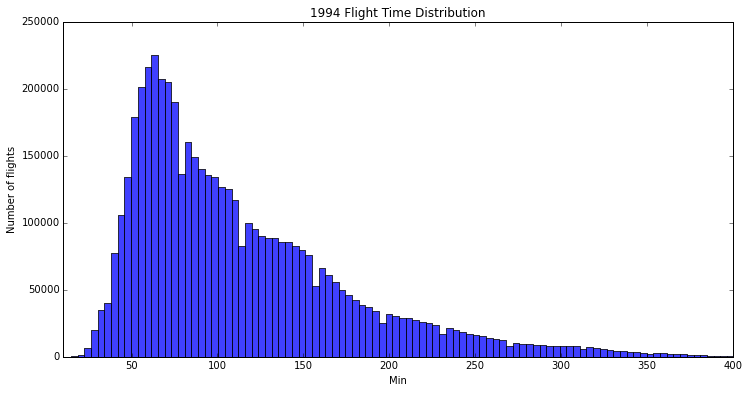

In [24]:
plt.figure(figsize=(12, 6))
plt.hist(actual_flight_data,bins = 200, alpha=0.75)
plt.xlim(10,400)
plt.xlabel('Min')
plt.ylabel('Number of flights')
plt.title('1994 Flight Time Distribution')

In [25]:
print("Min of data: ", np.mean(actual_flight_data))
print("Min of data without outliner: ",np.mean(list(filter(lambda x: x>0 & x<400,actual_flight_data))))

Min of data:  114.002588606
Min of data without outliner:  114.003052037


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> The average flight time is around nearly 2 hour. If you look on the distribution graph, it is intuitive to recognize that flight time is usually around 60~70 minutes </div>



#### Question +1.3
Relation between real flight time and scheduled flight time

In [26]:
df = df.filter(df.actual_elapsed_time>0)
plotdata = df.select('actual_elapsed_time','scheduled_elapsed_time').dropna().collect()
pdf = pd.DataFrame(data=plotdata,columns=['actual','schedule'])
pdf = pdf.sort(['actual'], ascending=[1])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


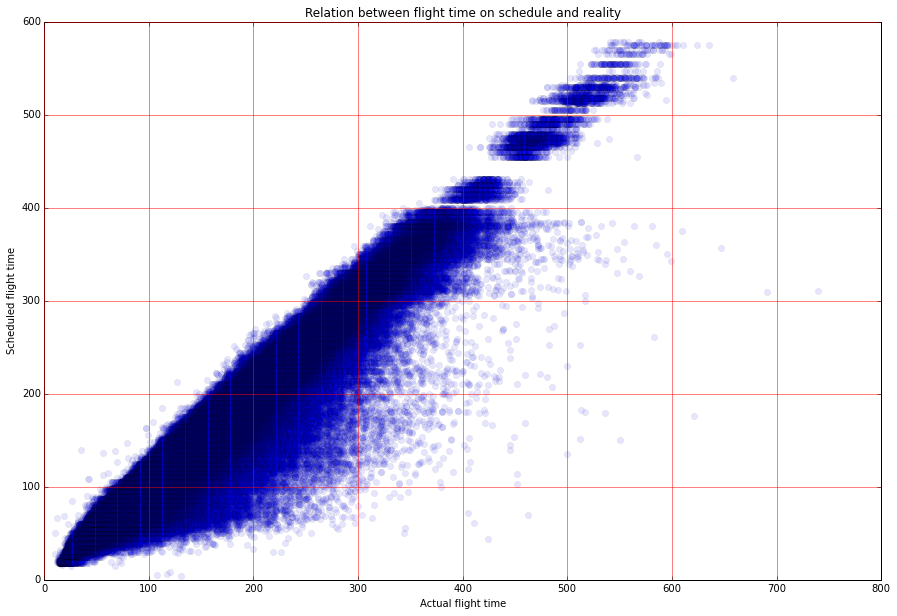

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


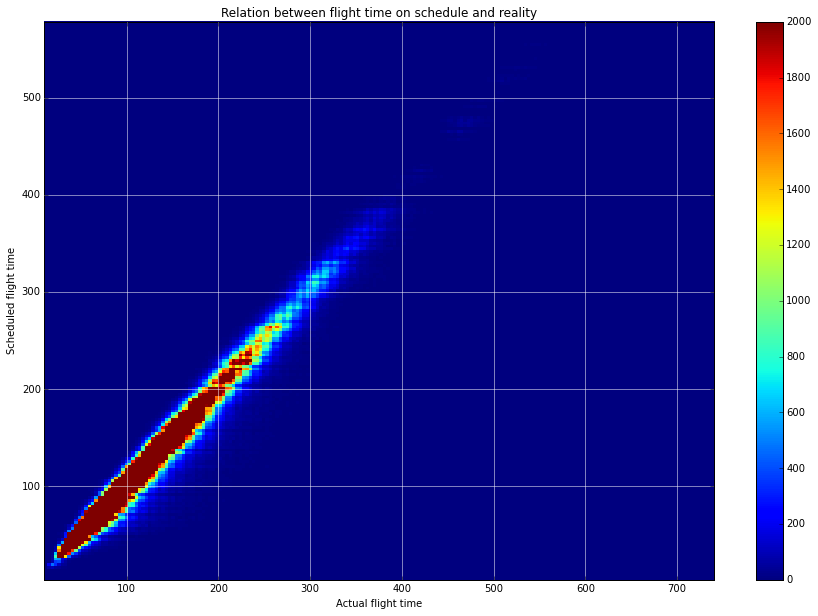

In [27]:
plt.figure(1,figsize=(15,10))
plt.xlabel("Actual flight time")
plt.ylabel("Scheduled flight time")
plt.title('Relation between flight time on schedule and reality')
plt.grid(True,which="both",ls="-",c='r') 
plt.plot(pdf['actual'],pdf['schedule'],'o',alpha=0.1)
plt.show()

plt.figure(1,figsize=(15,10))
plt.hist2d(pdf['actual'],pdf['schedule'], (200, 200), cmap=plt.cm.jet,vmin=1, vmax=2000)
plt.colorbar()
plt.xlabel("Actual flight time")
plt.ylabel("Scheduled flight time")
plt.title('Relation between flight time on schedule and reality')
plt.grid(True,which="both",ls="-",c="w")
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> It is easy to understand why relation between them is linear. In addition, it is interesting that the density of flight is tend to be on the right of the line y = x. That means the increase of flight time is quickly than increase of scheduled flight time. That leads to the conclusion "delay of long-elapsed time flight is bigger than delay off short-elapsed time flight" </div>

In [28]:
a = df.filter(df.actual_elapsed_time>10) \
        .filter(df.actual_elapsed_time/df.scheduled_elapsed_time > 0.9) \
        .select('scheduled_departure_time','scheduled_arrival_time',
                                           'departure_time','arrival_time',
                                           'scheduled_elapsed_time','actual_elapsed_time','src_airport', 'dest_airport').count()
print("number of flights flow less than 75% of scheduled elapsed time: ", a, " over ",
                          df.filter(df.actual_elapsed_time>10).count()," flights") 

number of flights flow less than 75% of scheduled elapsed time:  4305935  over  5101181  flights


#### Question +1.4

We notice that mostly elapsed time of flight (over 80%) is approximate with scheduled elapsed time. That also means flight will arrive late if they departed late and vice versa. We think about using difference between "scheduled and real flight time" as new kind of delay. 

Can we use it for creating new model?


In [29]:
df_edelay = df.withColumn("elapsed_delay",df.actual_elapsed_time-df.scheduled_elapsed_time)

In [30]:
plotdata = df_edelay.select('elapsed_delay').dropna().collect()
actual_flight_data = [x[0] for x in plotdata]

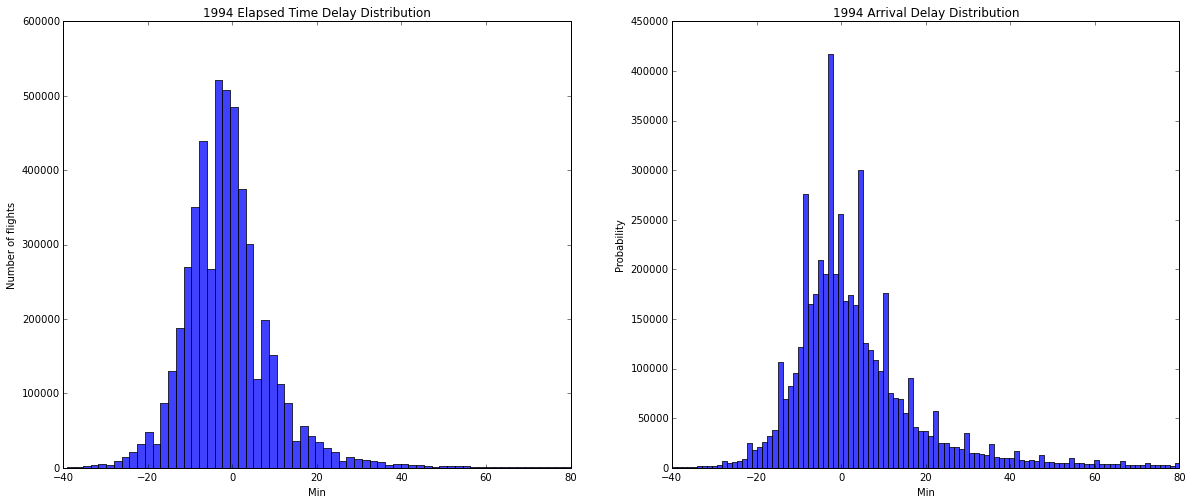

In [31]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
plt.hist(actual_flight_data,bins = 300, alpha=0.75)
plt.xlim(-40,80)
plt.xlabel('Min')
plt.ylabel('Number of flights')
plt.title('1994 Elapsed Time Delay Distribution')


plt.subplot(1,2,2)
arrival_delay_data = df.select('arrival_delay').dropna().collect()
a = [x[0] for x in arrival_delay_data]
plt.hist(a,bins = 1200, alpha=0.75)
plt.xlim(-40,80)
plt.xlabel('Min')
plt.ylabel('Probability')
plt.title('1994 Arrival Delay Distribution')

plt.show()

In [32]:
pd.DataFrame([stats.describe(actual_flight_data),stats.describe(a)],index=['elapsed deylay','arrival delay'])

NameError: name 'stats' is not defined

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">From the distribution and statistic, we can see elapsed time have much lower variance and skewness than arrival delay. So we can **create model to predict elapsed delay** and calculate the arrival delay from other information. <br> <br>

predict of **Arrival delay** = **Real Departure Time** + predict of **Elapsed delay** + **scheduled flight time** - **Schedule Arrival Time** <br><br>

One of the problem of using this feature, we have to know **Real Departure Time**. That means we only update arrival information after the plane depart. In practice, it is useless for short-flight but may be useful for long-flight.
</div>

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Question +2: Flight delays</font></h2>
</div>

#### Question +2.1
Distribution of arrival and departure delay

In [34]:
arrival_delay_data = df.select('arrival_delay','departure_delay').dropna().collect()

In [42]:
from scipy import stats

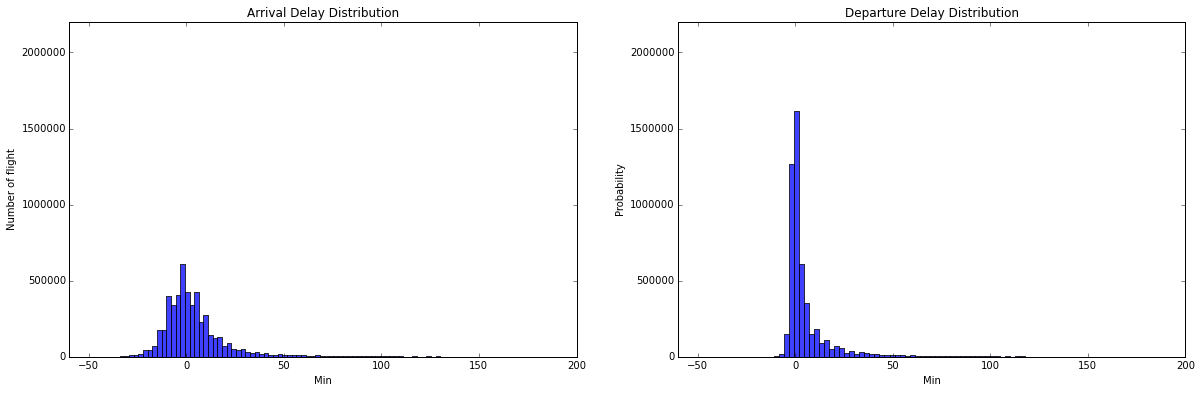

,nobs,minmax,mean,variance,skewness,kurtosis
departure delay,5101183,"(-109, 1439)",6.591570,480.878963,16.934028,833.724716
arrival delay,5101183,"(-115, 1313)",5.662149,557.777822,4.998062,54.068511


In [43]:

dataplot = pd.DataFrame(arrival_delay_data)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.hist(dataplot[0],bins = 600, alpha=0.75)
plt.xlim(-60,200)
plt.ylim(0,2200000)
plt.xlabel('Min')
plt.ylabel('Number of flight')
plt.title('Arrival Delay Distribution')

plt.subplot(1,2,2)
plt.hist(dataplot[1],bins = 600, alpha=0.75)
plt.xlim(-60,200)
plt.xlabel('Min')
plt.ylim(0,2200000)
plt.ylabel('Probability')
plt.title('Departure Delay Distribution')
plt.show() 

pd.DataFrame([stats.describe(dataplot[1]),stats.describe(dataplot[0])],index=['departure delay','arrival delay'])

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">From the distribution of departure delay and arrival delay, the departure delay has a much larger part of zero value and smaller part of negative  value  than arrival  delay. That means large amount of flight depart on time and a small amount of aircrafts departure before time. </div>

#### Question +2.2
Arrival Delay by season. As we notice, wether information is strong and have more influence to flight delay. We can extract weather information from our data by group month information into 4 season 

In [44]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
df_with_delay_season = df_with_delay.withColumn('season', (when(df['month'].isin([1,2]),df['month']+12).otherwise(df['month'])/3).cast('int')).cache()

In [45]:
plotdata = df_with_delay_season.groupBy('season','is_delay').count().alias('count')
temp = plotdata.groupBy('season').agg(sum('count').alias('total'))
plotdata = plotdata.join(temp,'season')
plotdata = plotdata.withColumn('ratio',plotdata['count']/plotdata['total']).drop('count').collect()
plotdata = pd.DataFrame(plotdata)
plotdata = plotdata.sort([0,1],ascending = [1,1])

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


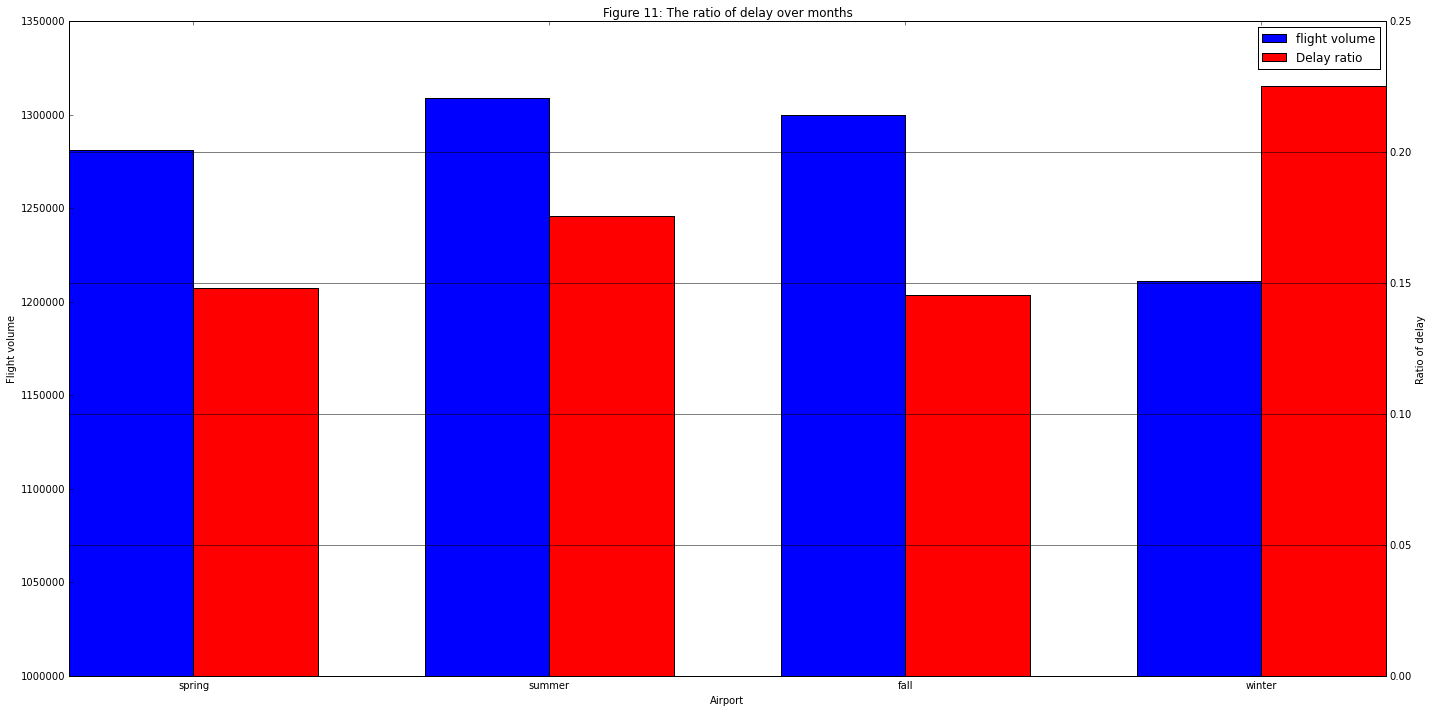

In [46]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

index = np.arange(0,4)
bar_width = 0.35
opacity = 0.4

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax.set_ylim(1000000,1350000)
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, ['spring','summer','fall','winter'])
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, plotdata[2][0::2], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, plotdata[3][1::2], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> Observe the graph in winter, even it has lower number of flights but it has the highest arrival delay ratio. The air traffic has no big difference in the four seasons(summer and fall traffic  volume),  while in winter more flights are positively delayed and d in fall and spring, the delayed flight is lower compared to other three seasons. In another word, delay time has seasonal pattern. </div>

### Question 3: Basic queries

#### Question 3.1 
<div class="alert alert-info">
How many origin airports? How many destination airports?
</div>

In [47]:
num_src_airport = df.select('src_airport').distinct().count()
num_dest_airport = df.select('dest_airport').distinct().count()
print("number of origin airports ", num_src_airport)
print("number of destination airports ", num_dest_airport)

number of origin airports  224
number of destination airports  224


#### Question 3.2
<div class="alert alert-info">
How many carriers?
</div>

In [48]:
num_carrier = df.select('carrier').distinct().count()
print("the number distinct carriers:", num_carrier)

the number distinct carriers: 10


#### Question 3.3

<div class="alert alert-info">
How many night flights (that is, flights departing later than 6pm)?
</div>

In [49]:

night_flights = df.select('scheduled_departure_time').where('scheduled_departure_time > 1800').count()
print("the number of night flights:", night_flights)

the number of night flights: 1061653


### Question 4: Flight volume statistics

#### Question 4.1: 

<div class="alert alert-info">
How many flights in each month of the year? Plot the changes over months by a line chart and comment the figure.
From the result, we can learn the dynamics of flight volume over months. For example, if we only consider flights in 1994 (to start, it's always better to focus on smaller amount of data), we can discuss about which months are most likely to have flights experiencing delays.
</div>


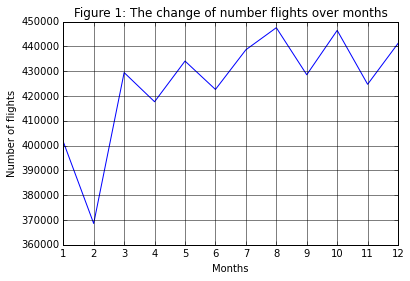

In [50]:
statistic_month = df.groupBy('month').count().orderBy('month').take(12)

#statistic_day_of_week.show()
pdf = pd.DataFrame(data=statistic_month)

y_val = range(1,13)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1: The change of number flights over months')
plt.grid(True,which="both",ls="-") 
dim=np.arange(1,13,1) #how to divided x axi
plt.xticks(dim)
plt.plot(y_val,pdf[1] )
plt.show()

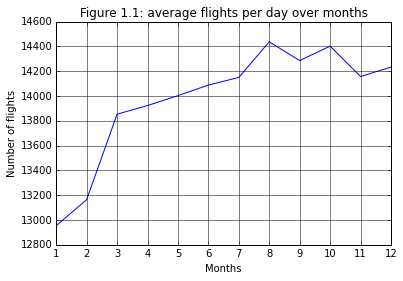

In [51]:
daysEachMonth = [31,28,31,30,31,30,31,31,30,31,30,31]
pdfn = [float(pdf[1][i-1])/daysEachMonth[i-1] for i in pdf[0]]
y_val = range(1,13)
plt.xlabel("Months")
plt.ylabel("Number of flights")
plt.title('Figure 1.1: average flights per day over months')
plt.grid(True,which="both",ls="-") 
dim=np.arange(1,13,1) #how to divided x axi
plt.xticks(dim)
plt.plot(y_val,pdfn )
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning">We can see that in first 6 months of the year, the number flights is less than last half part of the year. And August, October and December have the most total number flights. And in figure 1, we can see that February have much lower total number flights than other months because it has 28 days. After normalized, it is clear that number of flights increase gradually from Jan to Jul. From Jul, it fluctuates grealy until the end of the year.</div>

#### Question 4.2: 
<div class="alert alert-info">
Is there any relationship between the number of flights and the days of the week?  

Plot a bar chart and interpret the figure.  

By answering this question, we could learn about the importance of the weekend/weekday feature for our predictive task.
</div>

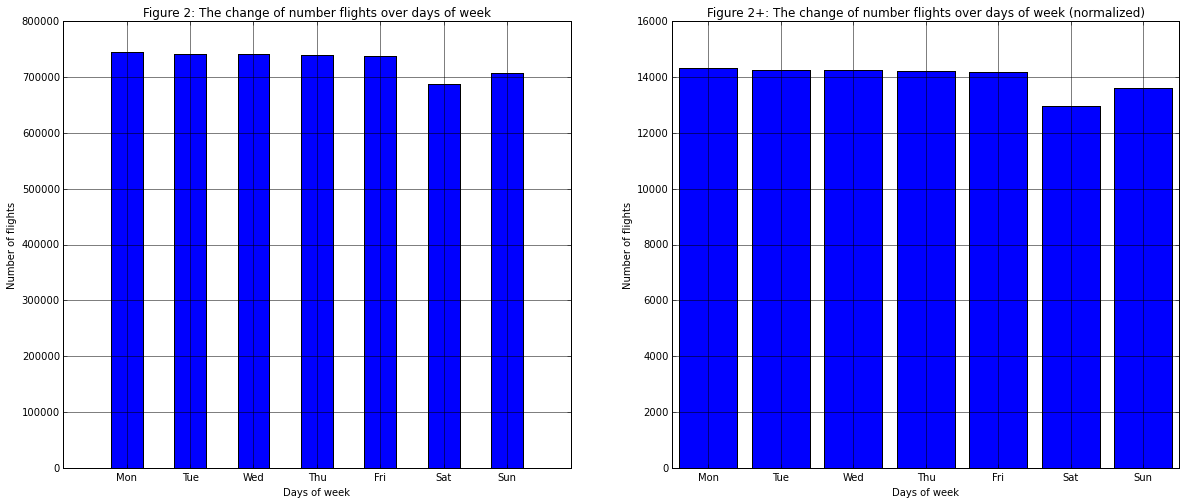

In [52]:
statistic_day_of_week = df.groupBy('day_of_week').count().orderBy('day_of_week').take(7)

plt.figure(figsize=(20, 8))
#statistic_day_of_week.show()
plt.subplot(1,2,1)
pdf = pd.DataFrame(data = statistic_day_of_week)
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2: The change of number flights over days of week')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])
y_val=range(1,8)
# plot bar chart
plt.bar(y_val,pdf[1],align='center',width=0.5)
plt.xticks(pdf[0], day_of_week_label)

plt.subplot(1,2,2)
day_in_year = [52, 52, 52, 52, 52, 53, 52]
pdf21 = list(map(lambda i: pdf[1][i-1]/day_in_year[i-1] ,pdf[0]))
plt.xlabel("Days of week")
plt.ylabel("Number of flights")
plt.title('Figure 2+: The change of number flights over days of week (normalized)')
plt.grid(True,which="both",ls="-")
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf[0].map(lambda i: map_int_into_day[i])

# plot bar chart
plt.bar(pdf[0], pdf21, align='center')
plt.xticks(pdf[0], day_of_week_label)
plt.xlim(0.5,7.5)
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
In figure 2, the working days (Monday to Friday) have more number flights than weekend days (Saturday and Sunday).
And more, after we normalize with number of days in year 1994. number of flights in Saturday is clearly less than in Sunday in average.</div>

#### Question 4.3
<div class="alert alert-info">
How many flights in different days of months and in different hours of days?  

Plot  bar charts, and interpret your figures.
</div>

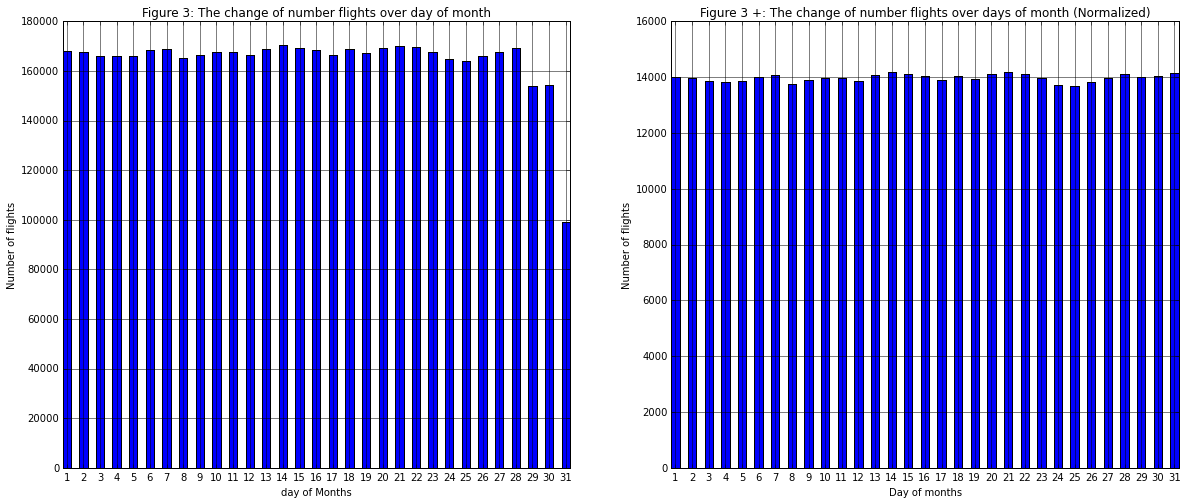

In [53]:
statistic_day_of_month = df.groupBy('day_of_month').count().orderBy('day_of_month').take(31)

pdf = pd.DataFrame(data=statistic_day_of_month)

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
y_val = range(1,32)
plt.xlabel("day of Months")
plt.ylabel("Number of flights")
plt.title('Figure 3: The change of number flights over day of month')
plt.grid(True,which="both",ls="-") 

dim=np.arange(1,32,1) #how to divided x axi
plt.xticks(dim)
plt.bar(y_val,pdf[1],align ='center',width =0.5 )

plt.subplot(1,2,2)
days_in_year = np.ones(31)*12
days_in_year[28] = days_in_year[28] - 1
days_in_year[29] = days_in_year[29] - 1
days_in_year[30] = days_in_year[30] - 5
pdf31 = list(map(lambda i: pdf[1][i]/days_in_year[i] ,range(0,31)))
# plot bar chart
plt.xlabel("Day of months")
plt.ylabel("Number of flights")
plt.title('Figure 3 +: The change of number flights over days of month (Normalized)')
plt.grid(True,which="both",ls="-")
plt.xticks(dim)
plt.bar(pdf[0], pdf31, align='center',width =0.5)

plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">In left figure, distribution of number flights from day 1 to 28 is quite uniform and higher than day 29, 30 and 31. And day 31 has much lower the number flights than others. Because day 29 and 30 only have 11 times in a year, 31 only have 7 times in a year.
<br><br>
After normalized (right figure), we can see that in average, every day in month have similar number of flights. </div>



In [36]:
statistic_hour_of_day = df.rdd.map(lambda line: Row(hour=int(line['scheduled_arrival_time']/100)%24,count=1))
statistic_hour_of_day = sqlContext.createDataFrame(statistic_hour_of_day)
pdf = statistic_hour_of_day.groupBy("hour").count().orderBy('hour').collect()

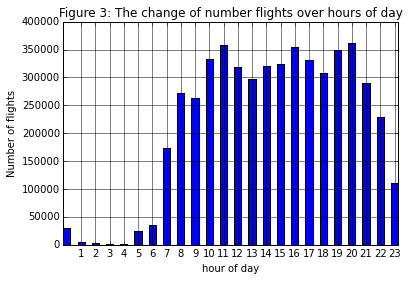

In [37]:
pdF = pd.DataFrame(data=pdf)
#statistic_hour_of_day.show()

#plot char chart
x_val = range(0,24)
plt.xlabel("hour of day")
plt.ylabel("Number of flights")
plt.title('Figure 3: The change of number flights over hours of day')
plt.grid(True,which="both",ls="-") 

dim=np.arange(1,24,1) #how to divided x axi
plt.xticks(dim)
plt.bar(x_val,pdF[1],align ='center',width =0.5 )
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> We can see that the time from 6 a.m to 9 p.m have more number flights than from 10 p.m to 5 a.m. Specially, number of flight is much low from 1 a.m to 4.am. There 3 peak point during a day: time between morning and noon (10a.m - 11a.m), mid of afternoon (4 p.m- 5 p.m) and night (7 p.m - 8 p.m) </div>

#### Question 4.4
<div class="alert alert-info">
Which are the **top 20** busiest airports: compute this in terms of aggregate inbound and outbound number of flights?
</div>

In [38]:
# consider outbound flights
stat_src = (df
            .groupBy(df.src_airport)
            .agg(func.count('*').alias('count1'))
            )
    
# consider inbound flights
stat_dest = (df
             .groupBy(df.dest_airport)
             .agg(func.count('*').alias('count2'))
            )
# full join the statistic of inbound flights and outbound flights
stat_airports = stat_src.join(stat_dest, col('src_airport') == col('dest_airport'), how='left')
# TOP 20 BUSIEST AIRPORTS
stat_airport_traffic = (stat_airports
                            # define the new column `total` 
                            # which has values are equal to the sum of `count1` and `count2`
                            .withColumn('total', stat_airports['count1'] + stat_airports['count2'])
                            # select top airpoint in termns of number of flights
                            .select('src_airport','total').orderBy(desc('total'))
                        )
stat_airport_traffic.show(20)

+-----------+------+
|src_airport| total|
+-----------+------+
|        ORD|549594|
|        DFW|510112|
|        ATL|438567|
|        LAX|303265|
|        STL|300195|
|        DEN|282905|
|        PHX|278810|
|        DTW|272154|
|        PIT|256344|
|        CLT|255745|
|        MSP|244506|
|        SFO|233075|
|        EWR|224655|
|        IAH|206531|
|        LGA|196052|
|        BOS|192244|
|        LAS|188653|
|        PHL|181886|
|        DCA|170687|
|        MCO|152291|
+-----------+------+
only showing top 20 rows



<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> With the opinion that if the airport have high traffic, it trends to have high flight delay. We will prove later in question 5. </div>

#### Question 4.5
<div class="alert alert-info">
Which are the **top 20** busiest carriers: compute this in terms of number of flights? 
</div>

In [39]:
stat_carrier = (df
                .groupBy('carrier')
                .agg(func.count('*').alias('count'))
                .orderBy(desc('count'))
                )

stat_carrier.show(20)

+-------+------+
|carrier| count|
+-------+------+
|     DL|863423|
|     US|836234|
|     AA|712238|
|     UA|629348|
|     WN|562166|
|     NW|476247|
|     CO|475654|
|     TW|253644|
|     HP|176123|
|     AS|116106|
+-------+------+



### Question +3: geomatics information about all the airports 
Carriers and airports are category information. It is not that easy to visualize the category information as numerical features such as months, hours etc. Weather information (which is not included) and location information(which can be got from the airports' names) is also category information.
#### Question +3.1
calculate the delay ratio by airports

In [ ]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
# group by airports
statistic_delay_des_airport= df_with_delay.groupBy('dest_airport')
# calculate the delay ratio and create a new column
delay_ratio_per_des_airport = statistic_delay_des_airport.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)
# order the result by delay ratio
delay_ratio_per_des_airport = (
            delay_ratio_per_des_airport
                .orderBy(desc('delay_ratio'))
                .select(['dest_airport', 'delay_ratio'])
    )
pdf_delay_ratio_per_des_airport = pd.DataFrame(delay_ratio_per_des_airport.collect())

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
Some airports have very high delay ratio: like MTJ,SPI(50%),ACK(35%). Some airports hardly have delays:like TWK,BFI(0%), DRO(5%). 

#### Question +3.2
Now we only choose the top5 hightest delay ratio airports and top5 lowest delay ratio airports to plot the histogram.

In [8]:
show_ratio = pd.concat([pdf_delay_ratio_per_des_airport.head(5), pdf_delay_ratio_per_des_airport.tail(5)])
y_pos = np.arange(len(show_ratio))
delay_r = [show_ratio[1][x] for x in range(5)] + [show_ratio[1][x] for x in range(220,225)]
airports = [show_ratio[0][x] for x in range(5)] + [show_ratio[0][x] for x in range(220,225)]
plt.bar(y_pos, delay_r, align = 'center', alpha =0.5)
plt.xticks(y_pos, airports)
plt.ylabel('Delay Ratio')
plt.title('the top5 hightest delay ratio airports and top5 lowest delay ratio airports')
plt.show()

NameError: name 'pd' is not defined

#### Question +3.3
calculate average delay by airports

In [ ]:
mean_delay_per_des_airport = statistic_delay_des_airport.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_des_airport = (
    mean_delay_per_des_airport
        .orderBy(desc('mean_delay'))
        .select(['dest_airport','mean_delay'])
    )
    
pdf_mean_delay_per_des_airport = pd.DataFrame(mean_delay_per_des_airport.collect())


we found that for one airport(BFI), the average is empty.

In [ ]:
show_avg = pd.concat([pdf_mean_delay_per_des_airport.head(5), pdf_mean_delay_per_des_airport.tail(6)])[:-1]
y_pos = np.arange(len(show_avg))
delay_a = [show_avg[1][x] for x in range(5)] + [show_avg[1][x] for x in range(219,224)]
airports = [show_avg[0][x] for x in range(5)] + [show_avg[0][x] for x in range(219,224)]
plt.bar(y_pos, delay_a, align = 'center', alpha =0.5)
plt.xticks(y_pos, airports)
plt.ylabel('Average delay by minutes')
plt.title('the top5 hightest average delay  airports and top5 lowest average delay airports')
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
longer average delay airports: SPI with 28.5 mins,ACk with 20 mins,MTJ with 17.35 mins. 
shorter average delay airports: GUM with -11.85mins, TWF with -5 mins, SUX with -2.8 mins.

### Question 5 
Statistics on the percentage of delayed flights

#### Question 5.1
<div class="alert alert-info">
What is the percentage of delayed flights for different hours of the day?  

Plot a bar chart and interpret the figure.  


<div class="label label-success">Remember</div> a flight is considered as delayed if it's actual arrival time is more than 15 minutes late than the scheduled arrival time.
</div>

In [54]:
# create new column that marks whether the flights are delay
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

# create a new column that indicates the scheduled departure time in hour 
# (ignore the part of minute)
delay_per_hour = df_with_delay.withColumn('hour', round(df.scheduled_departure_time/100, 0)%24)

# group by year and hour
statistic_delay_hour = delay_per_hour.groupBy('hour','year')

# calculate the delay ratio and create a new column
delay_ratio_per_hour = statistic_delay_hour.agg(
    (func.sum('is_delay')/func.count('*')).alias('delay_ratio')
)

    
# order the result by hour
delay_ratio_per_hour = (
            delay_ratio_per_hour
                .orderBy('hour')
                .select(['hour', 'delay_ratio'])
    )

pdf_delay_ratio_per_hour = pd.DataFrame(delay_ratio_per_hour.collect())

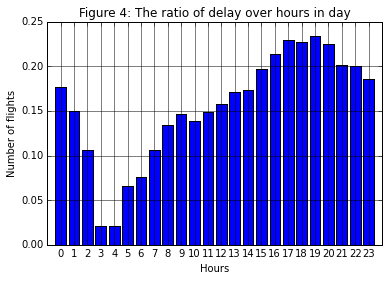

In [55]:
# plot a bar chart
plt.xlabel("Hours")
plt.ylabel("Number of flights")
plt.grid(True,which="both",ls="-")
plt.bar(pdf_delay_ratio_per_hour[0],pdf_delay_ratio_per_hour[1],align="center")
plt.xlim(-1,24)
plt.xticks(np.arange(0,24))
plt.title('Figure 4: The ratio of delay over hours in day')
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> It shows how traffic volume has great variance during a day. although in the peak time (10 a.m - 12 p.m), when the volume is higher, the percentage of delayed flights is quite lower than other times from 4p.m to 20 p.m. This trend changed  in the evening. It is funny that 5 p.m - 8 p-m is an rush-hour time and does it affect to delayed flight? We don't have reasonable explaination for this.</div>

#### Question 5.2
<div class="alert alert-info">
You will realize that saying *"at 4 A.M. there is a very low chance of a flight being delayed"* is not giving you a full picture of the situation. Indeed, it might be true that there is very little probability for an early flight to be delayed, but if it does, the delay might be huge, like 6 hours!  

<ul></ul>

Then, the question is: **which hours of the day are characterized by the largest delay?**  

Plot a Bar chart and explain it.  

</div>

In [57]:
mean_delay_per_hour = statistic_delay_hour.agg(
    (func.mean('arrival_delay')).alias('mean_delay')
)
    
mean_delay_per_hour = (
    mean_delay_per_hour
        .orderBy('hour')
        .select(['hour','mean_delay'])
    )
    
pdf_mean_delay_per_hour = pd.DataFrame(mean_delay_per_hour.collect())


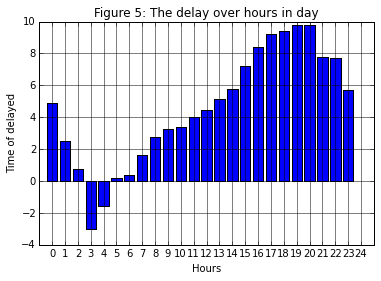

In [58]:
plt.xlabel("Hours")
plt.ylabel("Time of delayed")
plt.grid(True,which="both",ls="-")
plt.bar(pdf_mean_delay_per_hour[0],pdf_mean_delay_per_hour[1],align="center", width=0.8)
plt.xlim(-1,25)
plt.xticks(np.arange(0,25))
plt.title('Figure 5: The delay over hours in day')
plt.show()

With data of year 1994, the flight from 3AM to 4AM often depart earlier than in their schedule. The flights in the morning have less delay then in the afternoon and evening.

So, an attentive student should notice here that we have somehow a problem with the definition of delay! Next, we will improve how to represent and visualize data to overcome this problem.

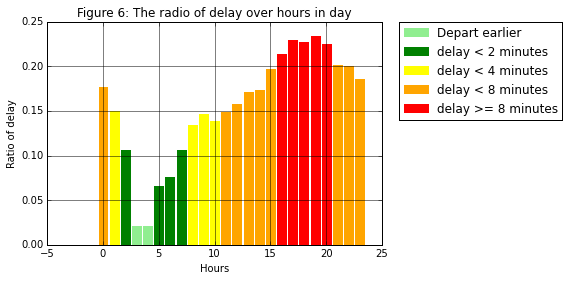

In [59]:
#pdf2 = pd.DataFrame(data=mean_delay_per_hour.collect())
plt.xlabel("Hours")
plt.ylabel("Ratio of delay")
plt.title('Figure 6: The radio of delay over hours in day')
plt.grid(True,which="both",ls="-")
bars = plt.bar(pdf_delay_ratio_per_hour[0], pdf_delay_ratio_per_hour[1], align='center', edgecolor = "black")
for i in range(0, len(bars)):
    color = 'red'
    if pdf_mean_delay_per_hour[1][i] < 0:
        color = 'lightgreen'
    elif pdf_mean_delay_per_hour[1][i] < 2:
        color = 'green'
    elif pdf_mean_delay_per_hour[1][i] < 4:
        color = 'yellow'
    elif pdf_mean_delay_per_hour[1][i] < 8:
        color = 'orange'

    bars[i].set_color(color)
        
patch1 = mpatches.Patch(color='lightgreen', label='Depart earlier')
patch2 = mpatches.Patch(color='green', label='delay < 2 minutes')
patch3 = mpatches.Patch(color='yellow', label='delay < 4 minutes')
patch4 = mpatches.Patch(color='orange', label='delay < 8 minutes')
patch5 = mpatches.Patch(color='red', label='delay >= 8 minutes')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">In the new figure, we obtain more information. The flights in 2AM to 7AM have very low probability of being delayed, and also short delay time. In contrast, the flights in the 4PM to 8PM range have higher chances of being delayed and nearly half of them whose the delay is around 8 minutes or more. That leads to the comment "higher number of delays can lead to higher delay time"
<br><br>
The way representing results are also important. "hour" feature not only affects to distribution of delay but also the duration of it. It shows "hour" is one of most important feature we should concern. </div>

#### Question 5.3
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a month
</div>

In [61]:
####### The changes of delay ratio over days of month ########
# calculate the delay ratio in each day of month
df_with_delay = df.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))
    
# collect data and plot
pdf_day_of_month = pd.DataFrame(statistic_day_of_month.collect())

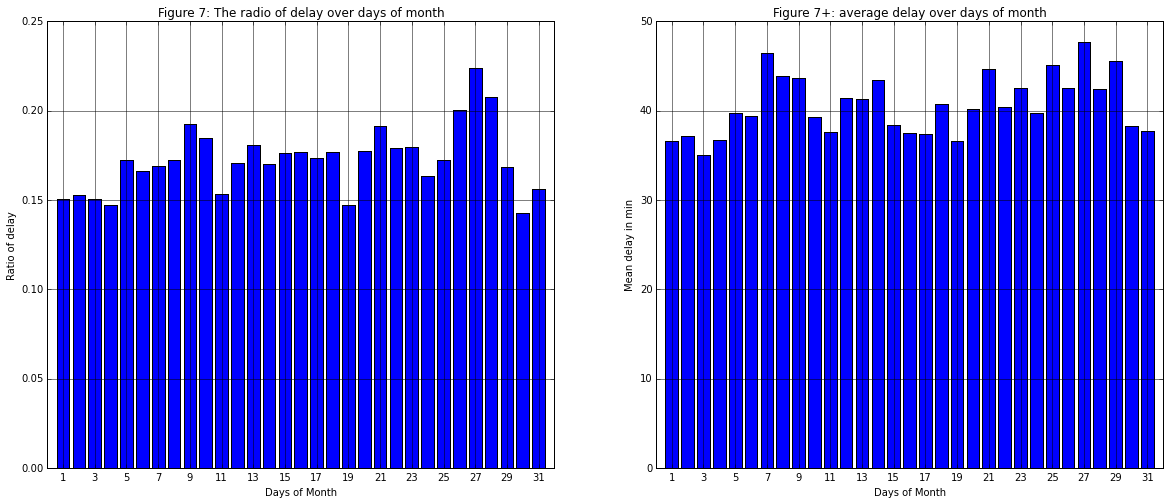

In [62]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
# plot a bar chart
plt.xlabel("Days of Month")
plt.ylabel("Ratio of delay")
plt.grid(True,which="both",ls="-")
plt.bar(pdf_day_of_month[0],pdf_day_of_month[1],align="center")
plt.xlim(0,32)
plt.xticks(np.arange(1,32,2))
plt.title('Figure 7: The radio of delay over days of month')
plt.subplot(1,2,2)
pdf_day_of_month = pd.DataFrame(df_with_delay[df_with_delay.is_delay == 1].groupBy('day_of_month').agg(func.mean('arrival_delay')).collect())
# plot a bar chart
plt.xlabel("Days of Month")
plt.ylabel("Mean delay in min")
plt.grid(True,which="both",ls="-")
plt.bar(pdf_day_of_month[0],pdf_day_of_month[1],align="center")
plt.xlim(0,32)
plt.xticks(np.arange(1,32,2))
plt.title('Figure 7+: average delay over days of month')
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">The only interesting point in this graph is the peak around day 26-28, it has high ratio of delay and high mean delay. However, in general this feature does not show clearly different of delay factors and may be not helpful for this prediction model</div> 

#### Question 5.4
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over days in a week
</div>

In [63]:
####### The changes of delay ratio over days of week ########
# calculate the delay ratio in each day of week
statistic_day_of_week = (
     df_with_delay
        .groupBy('day_of_week')
        .agg(func.sum('is_delay')/func.count('*'))
        # order by day_of_month
        .orderBy('day_of_week')
    )
    
# collect data and plot
pdf_day_of_week = pd.DataFrame(statistic_day_of_week.collect())

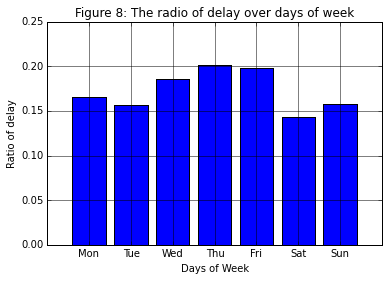

In [64]:
map_int_into_day = { 1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun" }
day_of_week_label = pdf_day_of_week[0].map(lambda i: map_int_into_day[i])

plt.xlabel("Days of Week")
plt.ylabel("Ratio of delay")
plt.grid(True,which="both",ls="-")
plt.bar(pdf_day_of_week[0],pdf_day_of_week[1],align="center")
plt.title('Figure 8: The radio of delay over days of week')
plt.xticks(pdf_day_of_week[0], day_of_week_label)
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> In question 4, we already see that during the working day (Monday->Friday) have higher traffic volume.Observe from this, the percentage of delayed flight is highest on Thusday and Friday. Sat and Sunday have the lowest delayed flight and already the lowest number of fights. It is seem reasonable that less flights less delays. </div>

#### Question 5.5
<div class="alert alert-info">
Plot a bar chart to show the percentage of delayed flights over months in a year
</div>

In [65]:
####### The changes of delay ratio over months ########
# calculate the delay ratio in month
statistic_month = (
    df_with_delay
        .groupBy('month').agg(func.sum('is_delay')/func.count('*'))
        .orderBy('month')
)
    
# collect data and plot
pdf_month = pd.DataFrame(statistic_month.collect())
pdf_month_delay =  pd.DataFrame(df_with_delay[df_with_delay.is_delay == 1] \
                    .groupBy('month').agg(mean('arrival_delay')).orderBy('month').collect())

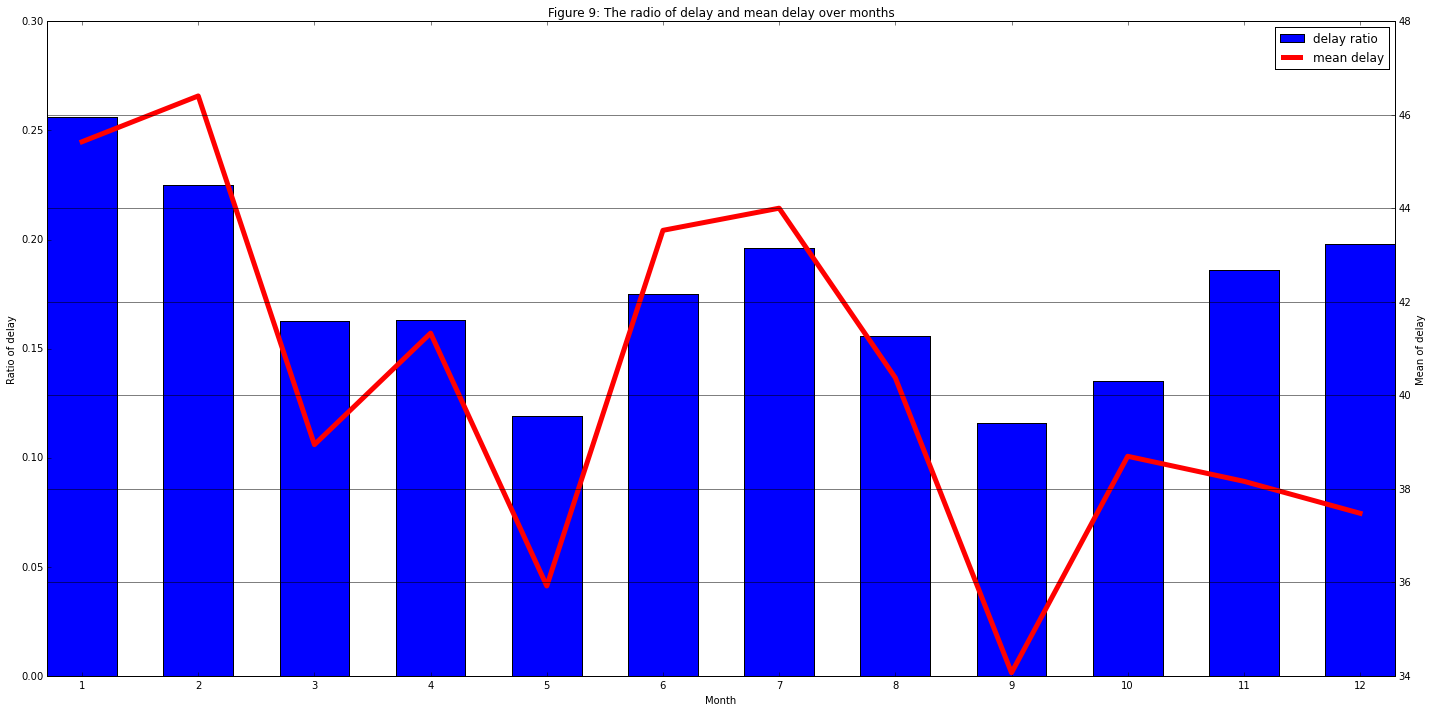

In [66]:
index = np.arange(1,13)
bar_width = 0.6
opacity = 0.4

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
plt.axis('normal')

ax.set_xlabel("Month")
ax.set_ylabel("Ratio of delay")
ax2.set_ylabel("Mean of delay")
plt.xticks(index, pdf_month[0])
plt.title('Figure 9: The radio of delay and mean delay over months')
plt.grid(True,which="both",ls="-")

bar = ax.bar(pdf_month[0], pdf_month[1], 
        bar_width, color='b',align = 'center' ,
        label='delay ratio')
bar2 = ax2.plot(index, pdf_month_delay[1], color='r',linewidth=5, 
       label='mean delay')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> From the picture above, we can see that in January,February (winter) as well as June, July (summer) have longer delays. The holidays and weather could be the reason of delay. If the trend of mean delay time fluctuate dramatically. The trend of delay ratio decrease from Jan to May then increase greatly until July and drop down on Sep, finally it increase again until the end of year. The impact of the month is clear on both factor. For example, the trend of delay ratio from Oct to Dec increase while mean of delay time decrease lightly on that time, which marks "month" as the major contributor for flight delay. </div>

<div class="alert alert-warning"> We are ready now to draw some observations from our data, even if we have only looked at data coming from a year worth of flights: <br>
<ul>
<li>The probability for a flight to be delayed is low at the beginning or at the very end of a given months</li>
<li> Flights on two first weekdays and on the weekend are less likely to be delayed </li>
<li>May and September are very good months for travelling, as the probability of delay is low (remember we're working on US data. Do you think this is also true in France?)</li>
</ul><br>
Putting things together, we can have a global picture of the whole year! </div>

In [67]:
df_with_delay = df.withColumn('is_delay', when(df["arrival_delay"] >= 15, 1).otherwise(0))
statistic_day = df_with_delay.groupBy(['year','month', 'day_of_month', 'day_of_week'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'))

# assume that we do statistic on year 1994
statistic_day = statistic_day\
    .orderBy('year', 'month', 'day_of_month', 'day_of_week')
pdf = pd.DataFrame(data=statistic_day.collect())

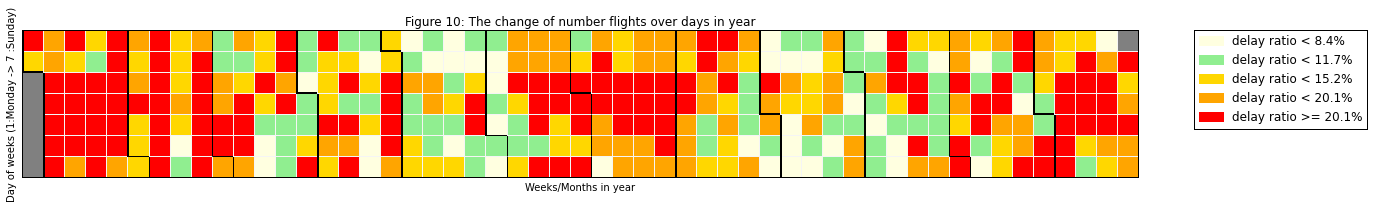

In [68]:
fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)     
plt.xlabel("Weeks/Months in year")
plt.ylabel("Day of weeks (1:Monday -> 7 :Sunday)")
plt.title('Figure 10: The change of number flights over days in year')
  
rec_size = 0.3
from matplotlib.patches import Rectangle
import datetime
num_days = len(pdf[0])
ax.patch.set_facecolor('gray')
ax.set_aspect('equal', 'box')
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())

for i in range(0, num_days):
    # extract information from the result
    year = pdf[0][i]
    month = pdf[1][i]
    day_of_month = pdf[2][i]
    day_of_week = pdf[3][i]
    day_of_year= datetime.date(year=year, month=month, day=day_of_month).timetuple()
    week_of_year = datetime.date(year=year, month=month, day=day_of_month).isocalendar()[1]
    
    # dealing with the week of the previous year
    if week_of_year == 52 and month == 1:
        week_of_year = 0
        
    # the coordinate of a day in graph
    X = week_of_year*rec_size
    Y = day_of_week*rec_size
    
    # use different colors to show the delay ratio
    color = 'white'
    if pdf[4][i] <= 0.084:
        color = 'lightyellow'
    elif pdf[4][i] <= 0.117:
        color = 'lightgreen'
    elif pdf[4][i] <= 0.152:
        color = 'gold'
    elif pdf[4][i] <= 0.201:
        color = 'orange'
    else:
        color = 'red'
    rect = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, rec_size,
                      alpha=1, facecolor=color, edgecolor='whitesmoke')

    ax.add_patch(rect)
    
    # drawing boders to separate months
    if day_of_month <= 7:
        rect2 = plt.Rectangle((X -rec_size/2.0, Y - rec_size/2.0), 0.01, rec_size,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
    if day_of_month == 1:
        rect2 = plt.Rectangle((X - rec_size/2.0, Y - rec_size/2.0), rec_size, 0.01,
                      alpha=1, facecolor='black')
        ax.add_patch(rect2)
ax.autoscale_view()

patch1 = mpatches.Patch(color='lightyellow', label='delay ratio < 8.4%')
patch2 = mpatches.Patch(color='lightgreen', label='delay ratio < 11.7%')
patch3 = mpatches.Patch(color='gold', label='delay ratio < 15.2%')
patch4 = mpatches.Patch(color='orange', label='delay ratio < 20.1%')
patch5 = mpatches.Patch(color='red', label='delay ratio >= 20.1%')

plt.legend(handles=[patch1, patch2, patch3, patch4, patch5], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

#### Question 5.6
<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> The figure shows the delay ratio over days in year. We can see that days in May and September have low delay ratio than other months. And most of days in January, June, July and December have pretty high delay ratios. 
<br><br>
In addition flights in Wednesday, Thurday and Friday have higher chance to be delayed when you look data by row.
</div>

#### Question 5.7
<div class="alert alert-info">

What is the delay probability for the top 20 busiest airports?  


By drawing the flight volume of each airport and the associated delay probability in a single plot, we can observe the relationship between airports, number of flights and the delay.  

<div class="label label-success">HINT </div>  Function `<df_colum>.isin(<list>)` helps checking whether a value in column belongs to a list.
</div>

In [69]:
####### The delay ratio of the top 20 busiest airports ########
K = 20

# extract top_20_airports from stat_airport_traffic
top_20_airports = [item[0] for item in stat_airport_traffic.take(K)]

# select the statistic of source airports
statistic_ratio_delay_airport = (
    df_with_delay
        # select only flights that depart from one of top 20 ariports
        .filter( df_with_delay.src_airport.isin(top_20_airports) )
        # group by source airport
        .groupBy('src_airport')
        #  calculate the delay ratio
        .agg(func.sum('is_delay')/func.count('*'))
        # sort by name of airport
        .orderBy(['src_airport'])
    )
#statistic_ratio_delay_airport.show(20)


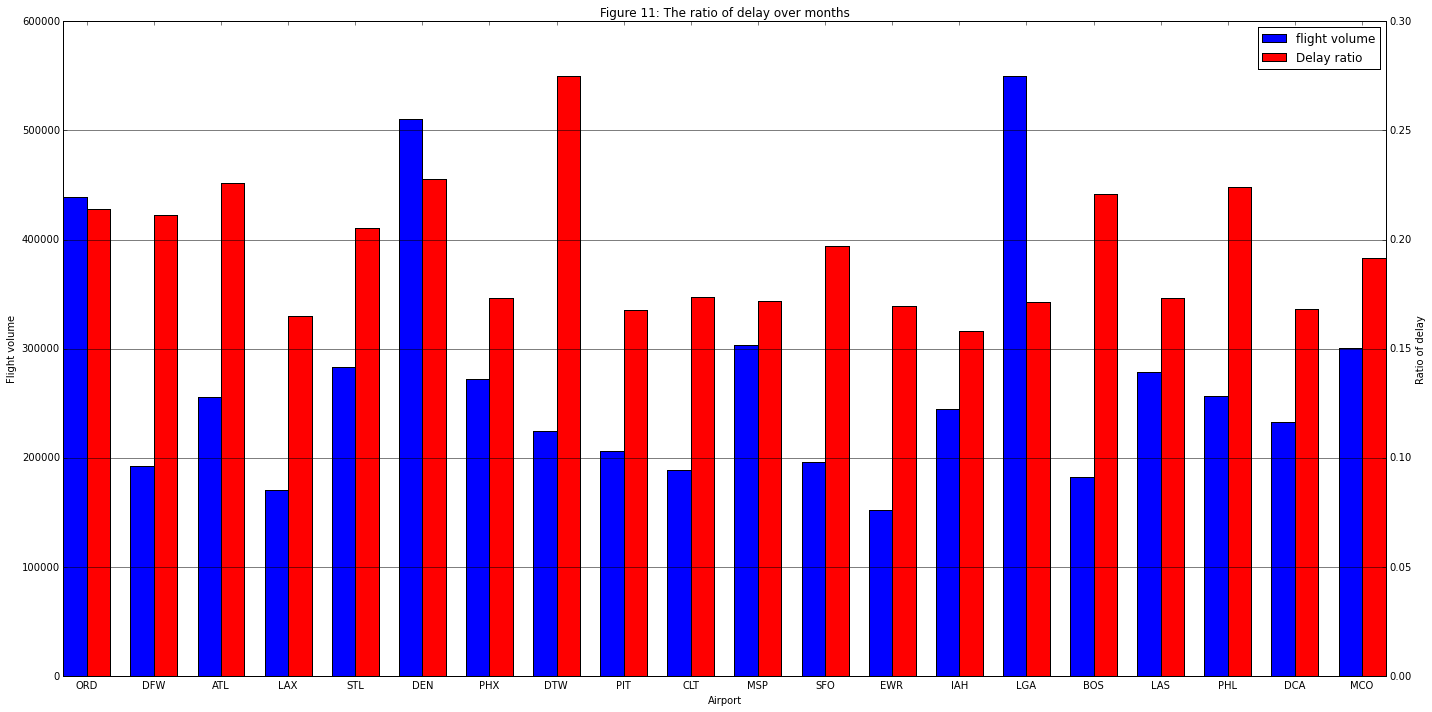

In [70]:
# collect data and plot
pdf_ratio_delay_airport = pd.DataFrame(data=statistic_ratio_delay_airport.collect())
pdf_top_20_airport_volume = pd.DataFrame(data=stat_airport_traffic.take(K), columns=['src_airport', 'total'])
pdf_top_20_airport_volume = pdf_top_20_airport_volume.sort_values(by='src_airport')
#print(pdf_top_20_airport_volume)
index = np.arange(len(top_20_airports))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Airport")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_airports)
plt.title('Figure 11: The ratio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_airport_volume['total'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_airport[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> From this graph, we can realize how airport affect to delay factor. DTW have lowest number of flights but delay ratio is quite high (25%) while LGA has hight number of flights but lower ratio delay. But it seem there is not a clear relationship between flight volume and delay ratio through this. So we created 2 more graph belows to consider this component.</div>


In [71]:
df_with_delay.take(1)

[Row(year=1994, month=1, day_of_month=7, day_of_week=5, scheduled_departure_time=900, scheduled_arrival_time=1003, arrival_time=954, departure_time=858, carrier='US', arrival_delay=-9, departure_delay=-2, actual_elapsed_time=56, scheduled_elapsed_time=63, distance=290, src_airport='CLT', dest_airport='ORF', is_delay=0)]

In [72]:
top5 = top_20_airports[0:5]
statistic_ratio_airport_month = (
    delay_per_hour
        # select only flights that depart from one of top 20 ariports
        .filter( df_with_delay.src_airport.isin(top5) )
        # group by source airport
        .groupBy('src_airport','month')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('ratio').alias('ratio'))
        # sort by name of airport
        .orderBy(['src_airport','month'])
)
statistic_ratio_airport_hour = (
    delay_per_hour
        # select only flights that depart from one of top 20 ariports
        .filter( df_with_delay.src_airport.isin(top5) )
        # group by source airport
        .groupBy('src_airport','hour')
        #  calculate the delay ratio
        .agg((func.sum('is_delay')/func.count('*')).alias('ratio'))
        # sort by name of airport
        .orderBy(['src_airport','hour'])
)

In [73]:
def getdata_hour(airport):
    temp = pd.DataFrame(statistic_ratio_airport_hour[statistic_ratio_airport_hour.src_airport==airport] 
                        .select('hour','ratio').collect())
    temp2 = pd.DataFrame({0 : np.arange(24),1 : np.zeros(24)})
    temp3 = pd.concat([temp,temp2])
    temp3 = temp3.groupby(0).sum()
    temp3.index.name = None
    return temp3
def getdata_month(airport):
    temp = pd.DataFrame(statistic_ratio_airport_month[statistic_ratio_airport_month.src_airport==airport] 
                        .select('month','ratio').collect())
    temp2 = pd.DataFrame({0 : np.arange(1,13),1 : np.zeros(12)})
    temp3 = pd.concat([temp,temp2])
    temp3 = temp3.groupby(0).sum()
    temp3.index.name = None
    return temp3

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2174: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


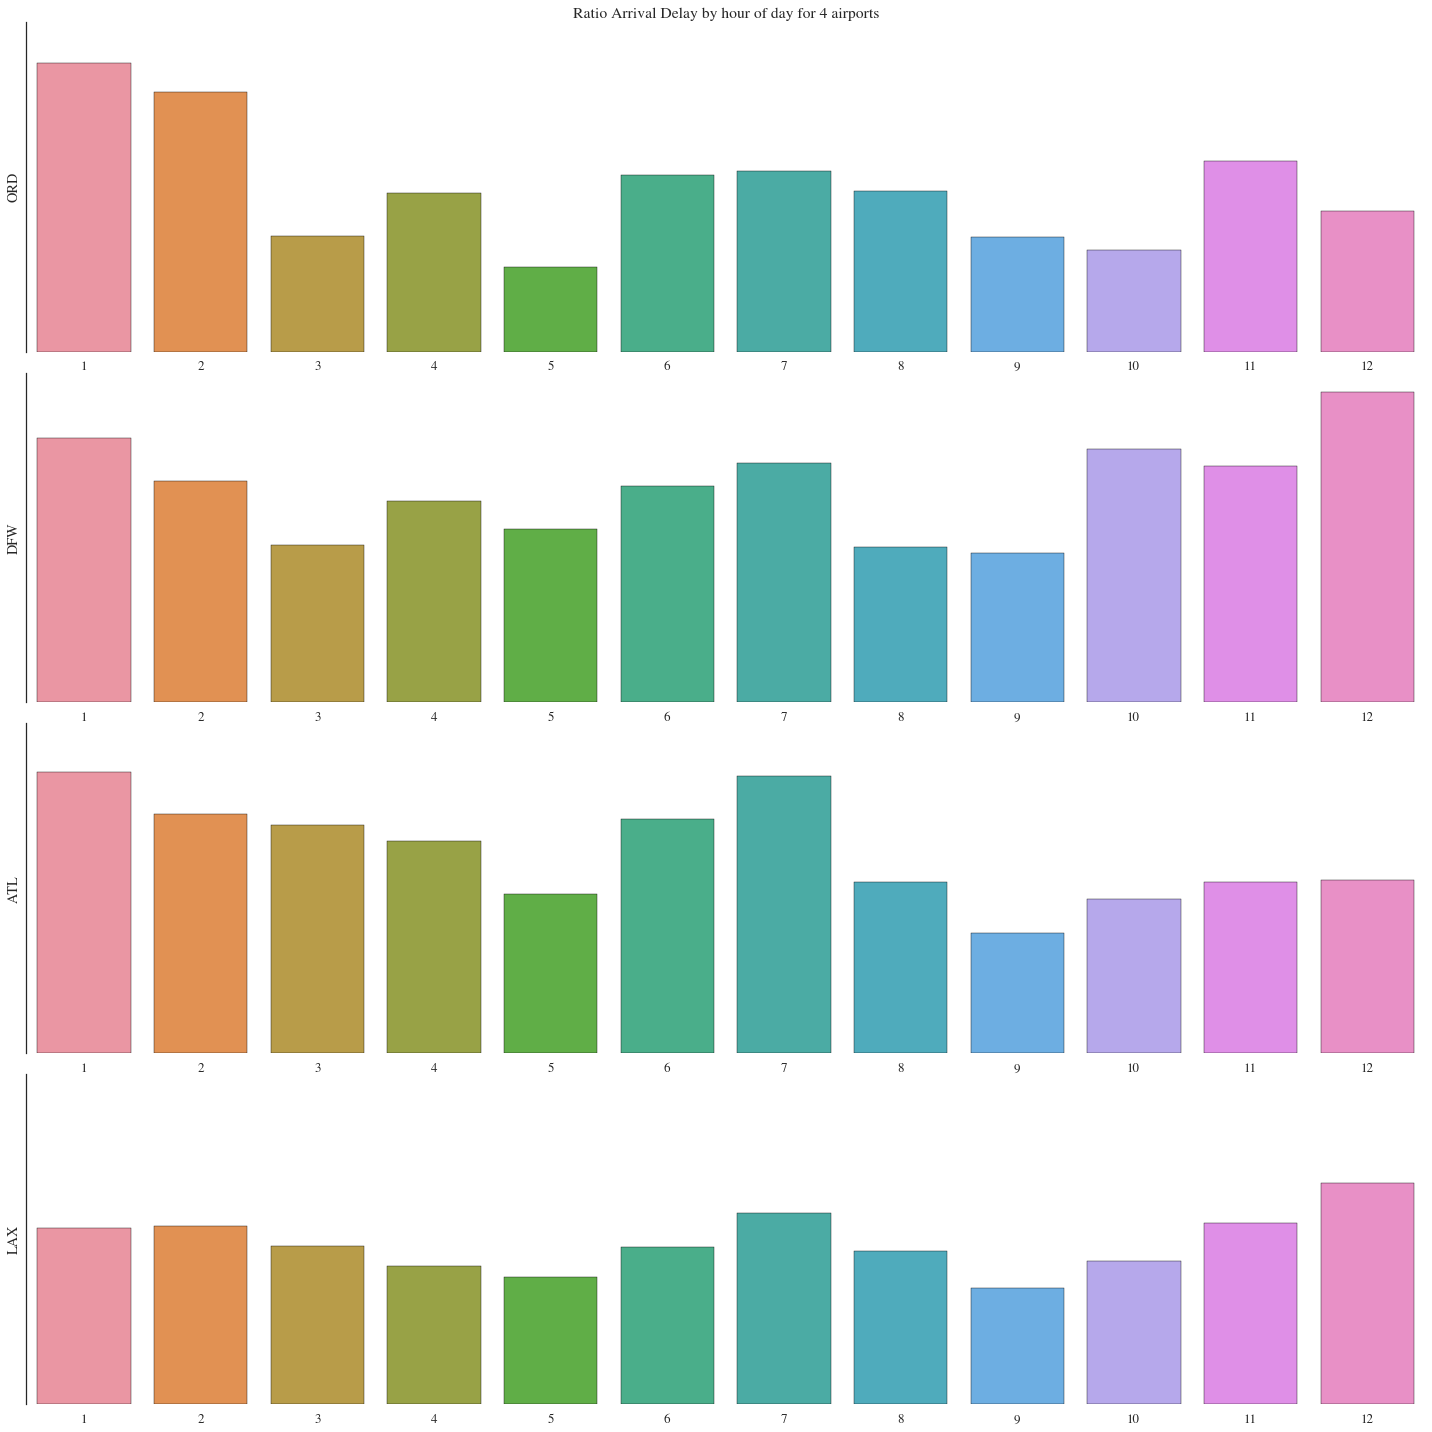

In [75]:
import seaborn as sns
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20), sharex=False, sharey=True)
sns.set(style="white", font='StixGeneral', context="talk")

dim = np.arange(1,13)
temp = getdata_month('ORD')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax1)
ax1.set_title('Ratio Arrival Delay by hour of day for 4 airports')
ax1.set_ylabel('ORD'); ax1.set_xlabel(''); 

temp = getdata_month('DFW')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax2)
ax2.set_ylabel('DFW'); ax2.set_xlabel('')

temp = getdata_month('ATL')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax3)
ax3.set_ylabel('ATL'); ax3.set_xlabel('')

temp = getdata_month('LAX')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax4)
ax4.set_ylabel('LAX'); ax4.set_xlabel('')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])#, xticklabels=Hours)
plt.tight_layout(h_pad=0)

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> 
For arrival delays by month, the peak is still in the winter (Dec or Jan). But in ATL, July also have high number of delayed flights.
</div>

/opt/conda/lib/python3.5/site-packages/seaborn/categorical.py:2174: UserWarning: The `hline` parameter has been removed
  warnings.warn("The `hline` parameter has been removed", UserWarning)


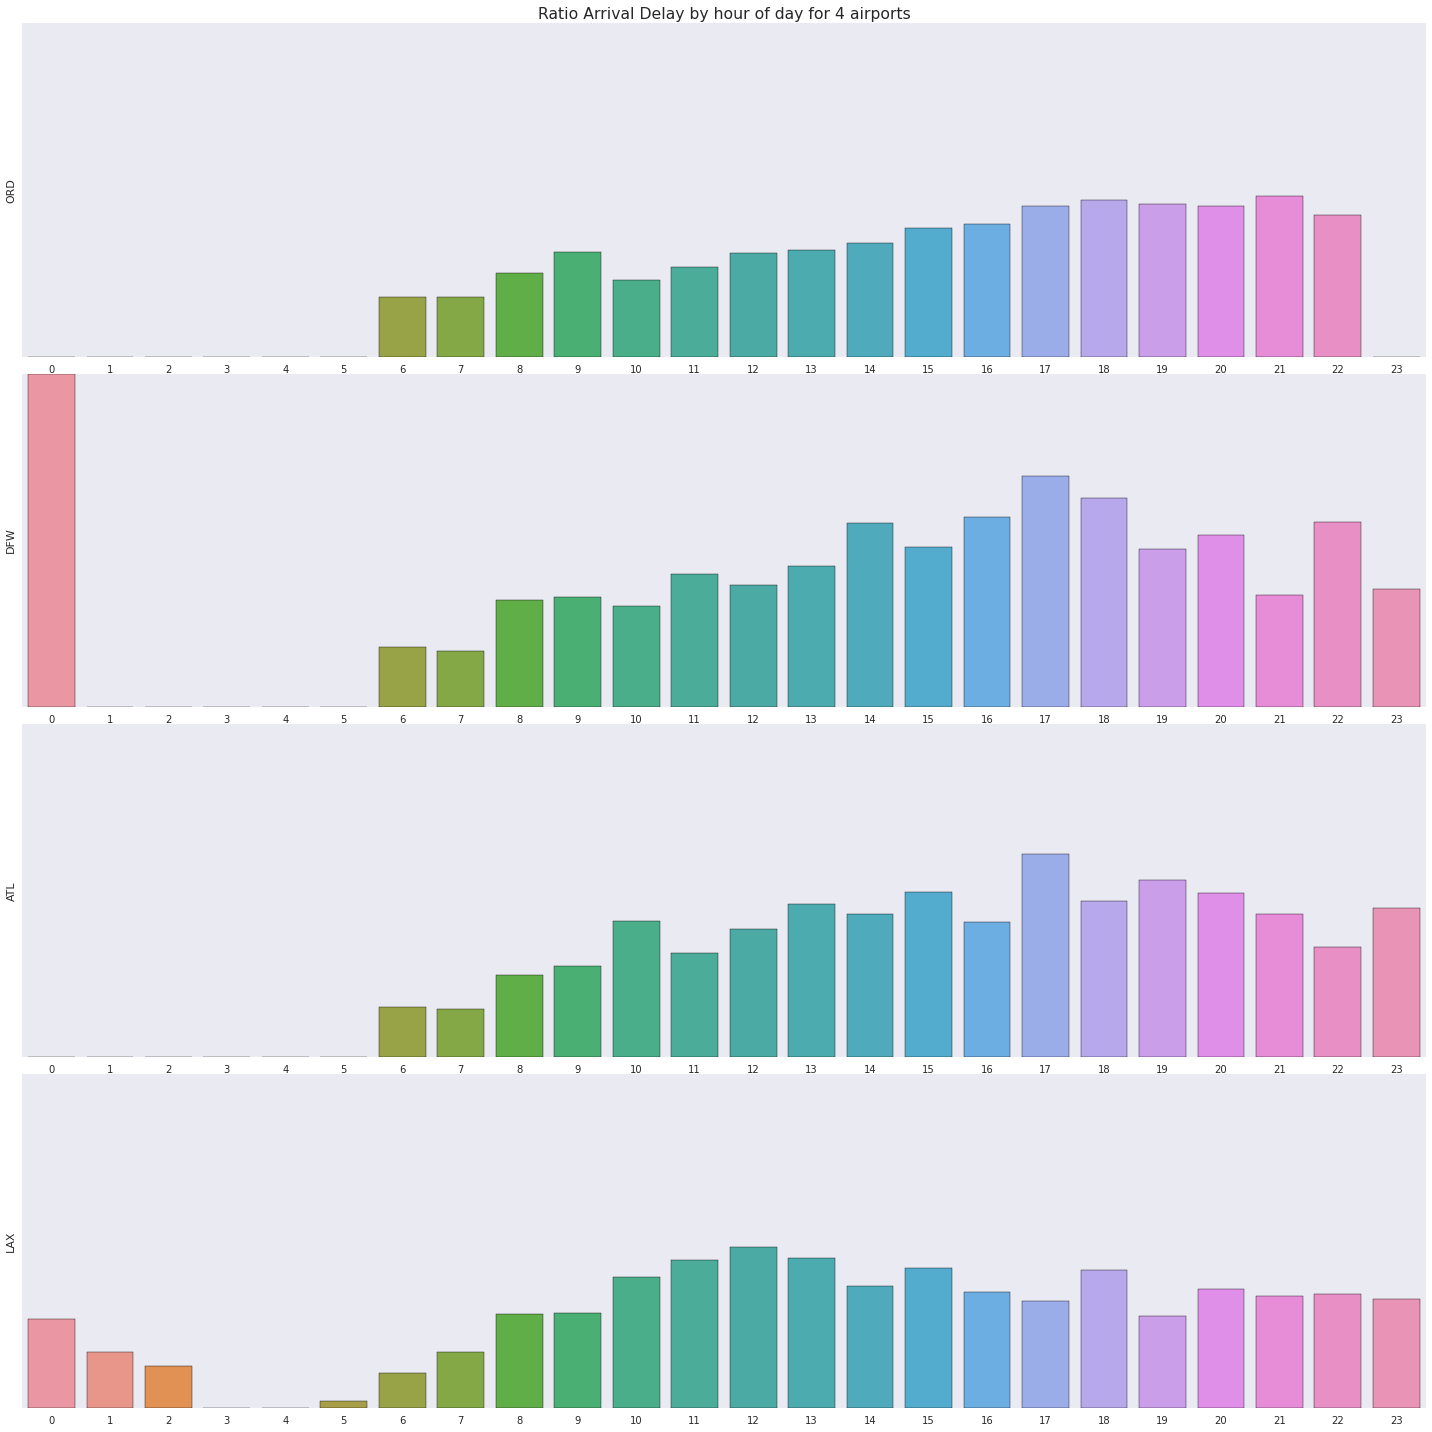

In [74]:
import seaborn as sns
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 20), sharex=False, sharey=True)
sns.set(style="white", font='StixGeneral', context="talk")

dim = np.arange(24)
temp = getdata_hour('ORD')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax1)
ax1.set_title('Ratio Arrival Delay by hour of day for 4 airports')
ax1.set_ylabel('ORD'); ax1.set_xlabel(''); 

temp = getdata_hour('DFW')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax2)
ax2.set_ylabel('DFW'); ax2.set_xlabel('')

temp = getdata_hour('ATL')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax3)
ax3.set_ylabel('ATL'); ax3.set_xlabel('')

temp = getdata_hour('LAX')
sns.barplot(dim, temp[1], ci=None, hline=0, ax=ax4)
ax4.set_ylabel('LAX'); ax4.set_xlabel('')
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])#, xticklabels=Hours)
plt.tight_layout(h_pad=0)

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> For arrival delays by hour, the graph shows us the better view about difference betwwen airports. Airport DFW have high delay ratio in midnight - 0 a.m while ORD never have delay during 11 pm to 6 am. From data, we realize that we don't have flight information during that time in ORD. That means it can be no flights depart or arrive around that time. 
<br><br>
The trend of delays also different in each airport, ORD increase slightly during a day while some other airports follows the trend of delays by hour we mentioned before.
</div>



#### Question 5.8
<div class="alert alert-info">
What is the percentage of delayed flights which belong to one of the top 20 busiest carriers?  
Comment the figure!
</div>

In [76]:
K = 20

# extract top_20_carriers from stat_carrier
top_20_carriers = [item[0] for item in stat_carrier.take(K)]

statistic_ratio_delay_carrier = (
    df_with_delay
    # select only flights that belong from one of top 20 carriers
    .filter(df_with_delay.carrier.isin(top_20_carriers) )
    # group by carriers
    .groupBy('carrier')
    #  calculate the delay ratio
    .agg(func.sum('is_delay')/func.count('*'))
    # sort by name of airport
    .orderBy(['carrier'])
    )
#statistic_ratio_delay_carrier.show(20)


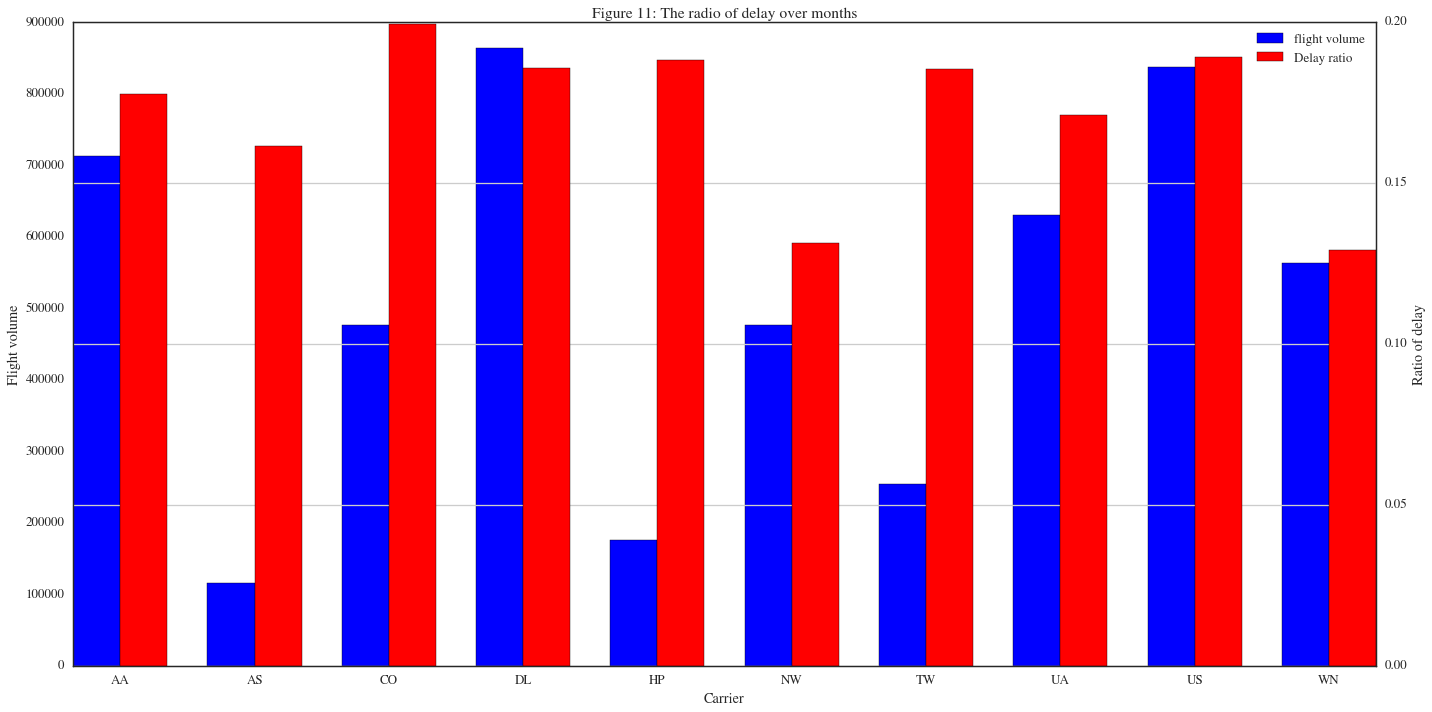

In [77]:
# collect data and plot
pdf_ratio_delay_carrier = pd.DataFrame(data=statistic_ratio_delay_carrier.collect())
pdf_top_20_carrier_volume = pd.DataFrame(data=stat_carrier.take(K), columns=['carrier', 'count'])
pdf_top_20_carrier_volume = pdf_top_20_carrier_volume.sort_values(by='carrier')
#print(pdf_top_20_carrier_volume)
top_20_carriers.sort()
index = np.arange(len(top_20_carriers))
bar_width = 0.35
opacity = 0.4


fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)

ax2 = ax.twinx()
plt.axis('normal')
ax.set_xlabel("Carrier")
ax.set_ylabel("Flight volume")
ax2.set_ylabel("Ratio of delay")
plt.xticks(index + bar_width, top_20_carriers)

plt.title('Figure 11: The radio of delay over months')
plt.grid(True,which="both",ls="-")
bar = ax.bar(index, pdf_top_20_carrier_volume['count'], 
        bar_width, color='b', 
        label='flight volume')
bar2 = ax2.bar(index + 1.5*bar_width, pdf_ratio_delay_carrier[1], bar_width, 
       align='center', color='r', 
       label='Delay ratio')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

plt.tight_layout()
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> Except NW and WN carriers have low delay ratio (~0.13), all other carriers have a little bit high delay ratio (0.2 > x > 0.15). Even flight volumn by carrier have great difference (~150.000 and ~900.000) but delay ratio is lightly different. </div>



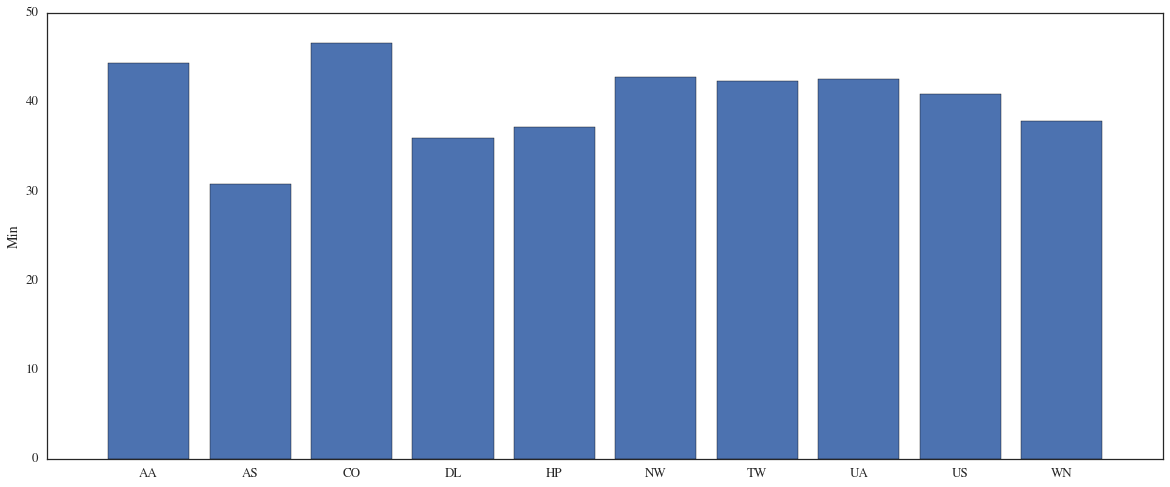

In [78]:
statistic_ratio_delay_carrier = (
    df_with_delay
    # select only flights that belong from one of top 20 carriers
    .filter(df_with_delay['is_delay']==1)
    # group by carriers
    .groupBy('carrier')
    #  calculate the delay ratio
    .agg(func.mean('arrival_delay'))
    # sort by name of airport
    .orderBy(['carrier'])
    )
carrier = pd.DataFrame(statistic_ratio_delay_carrier.take(10),columns=['carrier','mean delay'])
plt.figure(figsize=(20,8))
plt.bar(range(0,len(carrier)),carrier['mean delay'],align='center')
plt.xticks(range(0,len(carrier)),carrier['carrier'])
plt.xlim(-1,10)
plt.ylabel("Min")
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> We want to check again how carrier affect to arrival delay. It shows the mean delay between AA and WN is quite different. AS with a small number of flights has lowest mean delays. As expected, some airlines are better than others. </div>

# 4. Building a model of our data
Now that we have a good grasp on our data and its features, we will focus on how build a statistic model. Note that the features we can decide to use, to train our model, can be put in two groups:

- **Explicit features**: these are features that are present in the original data, or that can be built using additional data sources such as `weather` (for example querying a public API)
- **Implicit features**: these are the features that are inferred from other features such as `is_weekend`, `is_holiday`, `season`, `in_winter`,...

In this notebook, we will focus on the following predictors: `year`, `month`, `day_of_month`, `day_of_week`, `scheduled_departure_time`, `scheduled_arrival_time`, `carrier`, `is_weekend`, `distance`, `src_airport`, `dest_airport`. Among them, `is_weekend` is an implicit feature. The rest are explicit features.

The target feature is `arrival_delay`. 

Currently, MLLIB only supports building models from RDDs. It is important to read well the documentation and the MLLib API, to make sure to use the algorithms in an appropriate manner:

- MLLIB supports both categorical and numerical features. However, for each categorical feature, we have to indicate how many distinct values they can take
- Each training record must be a ```LabelledPoint```. This data structure has 2 components: ```label``` and ```predictor vector```. ```label``` is the value of target feature in the current record. ```predictor vector``` is a vector of values of type ```Double```. As such, we need to map each value of each categorical feature to a number. In this project, we choose a naïve approach: map each value to a unique index. 
- MLLIB uses a binning technique to find the split point (the predicate in each tree node). In particular, it divides the domain of numerical features into ```maxBins``` bins (32 by default). With categorical features, each distinct value fits in its own bin. **IMPORTANT:** MLLIB requires that no categorical feature have more than `maxBins` distinct values.
- We fill up the missing values in each **categorical** feature with its most common value. The missing values of a **numerical** feature are also replaced by the most common value (however, in some cases, a more sensible approach would be to use the median of this kind of feature).


## 4.1 Mapping values of each categorical feature to indices

### Question 6 

Among the selected features, `src_aiport`, `dest_airport`, `carrier` and `distance` have missing values. Besides, the first three of them are categorical features. That means, in order to use them as input features of MLLIB, the values of these features must be numerical. We can use a naïve approach: map each value of each feature to a unique index.

#### Question 6.1
<div class="alert alert-info">
Calculate the frequency of each source airport in the data and build a dictionary that maps each of them to a unique index.  

**Note:** we sort the airports by their frequency in descending order, so that we can easily take the most common airport(s) by taking the first element(s) in the result.
</div>

In [6]:
# select distinct source airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_src = (
    df
        .groupBy('src_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )

# extract the airport names from stat_src
src_airports = [item[0] for item in stat_src.select('src_airport').collect()]

num_src_airports = len(src_airports)
src_airports_idx = range(0, num_src_airports)

map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

#### Question 6.2
<div class="alert alert-info">
Calculate the frequency of each destination airport in the data and build a dictionary that maps each of them to a unique index.
</div>

In [7]:
# select distinct destination airports and map values to index
# sort the airport by their frequency descending
# so the most common aiport will be on the top
stat_dest = (
    df
        .groupBy('dest_airport')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )
# extract the airport names from stat_dest
dest_airports = [item[0] for item in stat_dest.select('dest_airport').collect()]
num_dest_airports = len(dest_airports)
dest_airports_idx = range(0, num_dest_airports)
map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))

#### Question 6.3
<div class="alert alert-info">
Calculate the frequency of each carrier in the data and build a dictionary that maps each of them to a unique index.
</div>

In [8]:
# select distinct carriers and map values to index
# sort carriers by their frequency descending
# so the most common aiport will be on the top

stat_carrier = (
    df
        .groupBy('carrier')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    )
# extract the carrier names from stat_carrier
carriers = [item[0] for item in stat_carrier.select('carrier').collect()]
print(carriers)
num_carriers = len(carriers)
carriers_idx = range(0, num_carriers)
map_carriers_to_index = dict(zip(carriers, carriers_idx))

['DL', 'US', 'AA', 'UA', 'WN', 'CO', 'NW', 'TW', 'HP', 'AS']


## 4.2 Calculating the most common value of each feature
We use a simple strategy for filling in the missing values: replacing them with the most common value of the corresponding feature.

<div class="alert alert-danger">
**IMPORTANT NOTE:** features like ```month```, ```day_of_month```, etc... can be treated as numerical features in general. However, when it comes to build the model, it is much easier considering them as categorical features. In this case, to compute the most common value for such categorical features, we simply use the frequency of occurrence of each `label`, and chose the most frequent.
</div>

### Question 7
In the previous question, when constructing the dictionary for categorical features, we also sort their statistical information in a such way that the most common value of each feature are placed on the top.

Note that, feature `is_weekend` has the most common value set to `0` (that is, `no` the day is not a weekend).

#### Question 7.1
<div class="alert alert-info">
Find the most common value of feature `month` in data.
</div>



In [9]:
the_most_common_month = (
    df
        .groupBy('month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]
print("The most common month:", the_most_common_month)


The most common month: 8


#### Question 7.2
<div class="alert alert-info">
Find the most common value of features `day_of_month` and `day_of_week`.
</div>

In [10]:
the_most_common_day_of_month = (
    df
        .groupBy('day_of_month')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

the_most_common_day_of_week = (
    df
        .groupBy('day_of_week')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]

print("The most common day of month:", the_most_common_day_of_month)
print("The most common day of week:", the_most_common_day_of_week)

The most common day of month: 11
The most common day of week: 3


#### Question 7.3
<div class="alert alert-info">
Find the most common value of features `scheduled_departure_time` and `scheduled_arrival_time`.
</div>

In [11]:
the_most_common_s_departure_time = (
    df
        .groupBy('scheduled_departure_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]


the_most_common_s_arrival_time =  (
    df
        .groupBy('scheduled_arrival_time')
        .agg(func.count('*').alias('count'))
        .orderBy(desc('count'))
    ).first()[0]


print("The most common scheduled departure time:", the_most_common_s_departure_time)
print("The most common scheduled arrival time:", the_most_common_s_arrival_time)

The most common scheduled departure time: 700
The most common scheduled arrival time: 1915


#### Question 7.4
<div class="alert alert-info">
Calculate the mean of distance in the data. This value will be used to fill in the missing values of feature `distance` later.
</div>

In [12]:
# calculate mean distance
mean_distance = df.agg(avg("distance")).collect()[0][0]
print("mean distance:", mean_distance)

mean distance: 670.7402911985982


#### Question 7.5
<div class="alert alert-info">
Calculate the mean of arrival delay.
</div>

In [13]:
# calculate mean arrival delay
mean_arrival_delay = df.agg(avg("arrival_delay")).collect()[0][0]
print("mean arrival delay:", mean_arrival_delay)

mean arrival delay: 5.662489742613603


As known from section 3.4, there are 225 different origin airports and 225 different destination airports, more than the number of bins in default configuration. So, we must set `maxBins` >= 225.

## 4.3 Preparing training data and testing data
Recall, in this project we focus on decision trees. One way to think about our task is that we want to predict the unknown `arrival_delay` as a function combining several features, that is:

`arrival_delay = f(year, month, day_of_month, day_of_week, scheduled_departure_time, scheduled_arrival_time, carrier, src_airport, dest_airport, distance, is_weekend)`

When categorical features contain corrupt data (e.g., missing values), we proceed by replacing corrupt information with the most common value for the feature. For numerical features, in general, we use the same approach as for categorical features; in some cases, we repair corrupt data using the mean value of the distribution for numerical features (e.g., we found the mean for `delay` and `distance`, by answering questions above).

The original data is split randomly into two parts with ratios 70% for **training** and 30% for **testing**.

### Question 8
<div class="alert alert-info">
  o  Replace the missing values of each feature in our data by the corresponding most common value or mean.  

  o  Divide data into two parts: 70% for **training** and 30% for **testing**

</div>

In [15]:
def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                values[2] if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                values[3] if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                values[5] if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                values[7] if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                     else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                     else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

In [17]:
a = trainingData.collect()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> SAVE RDD FILE </font></h3>
</div>

<div class="alert alert-warning"> it takes lots of time to run everything again after re-open the application (create mapping table, transform data, ...). It is better to save the cleaned data so that we can work on that later. 
<br><br>
data is saved with the format as when use .take() function. That means we need some simple steps to load and slip data again into RDD</div>

In [ ]:
a = data.map(lambda x: [x.label]+x.features.array.tolist())
a.saveAsTextFile('hdfs:/user/user17/data.txt')
#a = testData.map(lambda x: [x.label]+x.features.array.tolist())
#a.saveAsTextFile('hdfs:/user/user17/data_test.txt')

In [ ]:
def loaddata(filename):
    load_data = sc.textFile(filename)
    return load_data.map(lambda line: line[1:len(line)-1].split(', ')) \
            .map(lambda values: LabeledPoint(values[0],list(map(float,values[1:len(values)]))))

In [ ]:
trainingData = loaddata("data_train.txt").cache()
testData = loaddata("data_test.txt").cache()

In [ ]:
testData.take(1)


data = [arrival_delay]-[year,month,dayofmonth,dayofweek,sche_departure_time,sche_arrival_time,carrier,scr_air,dep_air,distance,is_weekend)

## 5.4 Building a decision tree model

### Question 9
<div class="alert alert-info">
We can train a decision model by using function
<code>
`DecisionTree.trainRegressor(<training_data>, categoricalFeaturesInfo=<categorical_info>, impurity=<impurity_function>,  maxDepth=<max_depth>, maxBins=<max_bins>)`.  
</code>  

Where,  
<ul>

<li> `training_data`: the data used for training  </li>

<li> `categorical_info`: a dictionary that maps the index of each categorical features to its number of distinct values  </li>

<li> `impurity_function`: the function that is used to calculate impurity of data in order to select the best split  </li>

<li> `max_depth`: the maximum depth of the tree  </li>

<li> `max_bins`: the maximum number of bins that the algorithm will divide on each feature. </li>

</ul>  

Note that, `max_bins` cannot smaller than the number distinct values of every categorical features.  

Complete the code below to train a decision tree model.
</div>


In [58]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainRegressor(trainingData, 
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='variance', maxDepth=12, maxBins=255)

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">  Maximum depth simply limits number of levels in decision tree that means number of chained decsicison can be made. If it is large, the tree will be overfitting because of so specific decision question. Reasonable max-depth help us avoid overfitting in training set.
<br><br>
Difference with categorial data, numberical data has numberous ways to ask a decision question (feature >= value). So the set of decision rules is a set of value to make decision of the feature, called as bin in here. Large number of bins may lead to optimal decision but also encounter overfitting problem. In this case, because airport feature (categorical) has 225 different value so max_bins have to be greater than that.</div>

## 5.5 Testing the decision tree model

### Question 10
#### Question 10.1
<div class="alert alert-info">
We often use Mean Square Error as a metric to evaluate the quality of a tree model.  

Complete the code below to calculate the MSE of our trained model.
</div>

In [59]:
# Evaluate model on test instances and compute test error
predictions = model.predict(testData.map(lambda x: x.features))
labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

In [60]:
testMSE = labelsAndPredictions.map(
    lambda p: np.power(p[0]-p[1],2)).sum()/ labelsAndPredictions.count()
print('Test Mean Squared Error = ' + str(testMSE))

Test Mean Squared Error = 491.442364786


### Question 10.2
<div class="alert alert-info">
Comment the results you have obtained. Is the MSE value you get from a decision tree indicating that our statistical model is very good in predicting airplane delays?  

Use your own words to describe and interpret the value you obtained for the MSE.
</div>

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> 

This result is not good enough. The average error is about: SQRT(491.4) = 22.17 mins while the mean arrival delay is round: 5.66 mins. The main reason we think because our feature we choose for running this model is not good. The weather is an important feature, but we didn't use it in our case. In addition, we still do not use data from other yearto train our decision trees to improve the performance.

</div>

## 5.6 Building random decision forest model (or random forest)
Next, we use MLLib to build a more powerful model: random forests. In what follows, use the same predictors defined and computed above to build a decision tree, but this time use them to build a random decision forest.

### Question 11
<div class="alert alert-info">
Train a random decision forest model and evaluate its quality using MSE metric.  

Compare to decision tree model and comment the results.  

Similarly to question 10.2, comment with your own words the MSE value you have obtained.
</div>

In [17]:
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
# Train a RandomForest model.
forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=10, impurity='variance', maxDepth=12, maxBins=255)

predictions = forest_model.predict(testData.map(lambda x: x.features))
forest_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

forest_testMSE = forest_labelsAndPredictions.map(
    lambda p: (p[0]-p[1])*(p[0]-p[1])).sum()/float(testData.count())
    
print('Test Mean Squared Error = ' + str(forest_testMSE))


Test Mean Squared Error = 480.81548326667115


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> 
Random forest can improve overfitting problem in decision trees and based on mean of results from all tree. but the result is but not so much in this case. (decreasing from 491.4 to 482.4). As in question above, our features selection is not good, so even we use the better approaches, we still get bad results.
 </div>

## 5.7 Parameter tuning
In this lecture, we used `maxDepth=12`, `maxBins=255`, `numTrees=10`. Next, we are going to explore the meta-parameter space a little bit.

For more information about parameter tuning, please read the documentation of [MLLIB](http://spark.apache.org/docs/latest/mllib-decision-tree.html#tunable-parameters)

### Question 12
<div class="alert alert-info">
Train the random forest model using different parameters, to understand their impact on the main performance metric we have used here, that is the MSE. For example, you can try a similar approach to that presented in the Notebook on recommender systems, that is using nested for loops.
</div>

<div class="alert alert-danger">
**NOTE:** be careful when selecting parameters as some might imply very long training times, or eventually, the typical memory problems that affect Spark!
</div>

In [18]:
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
evaluations = []
for maxBins in [255, 400]:
    for maxDepth in [10, 12, 14]:
        for numTrees in [10, 12, 14]:
            
            print("Train model with maxBins=%d maxDepth=%d numTrees=%d" % (maxBins, maxDepth, numTrees))
            
            forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=numTrees, impurity='variance', maxDepth=maxDepth, maxBins=maxBins)

            predictions = forest_model.predict(testData.map(lambda x: x.features))
            labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

            testMSE = labelsAndPredictions.map(lambda p: (p[0] - p[1]) * (p[0] - p[1])).sum() / float(testData.count())
            print('Test Mean Squared Error = ' + str(testMSE))
            
            evaluations.append(((maxBins, maxDepth, numTrees), testMSE))
    
evaluations.sort(key=lambda x: x[1])
                 
evalDataFrame = pd.DataFrame(data=evaluations)
print(evalDataFrame)


Train model with maxBins=255 maxDepth=10 numTrees=10
Test Mean Squared Error = 502.10761719732767
Train model with maxBins=255 maxDepth=10 numTrees=12
Test Mean Squared Error = 500.6866428594109
Train model with maxBins=255 maxDepth=10 numTrees=14
Test Mean Squared Error = 500.4980525308751
Train model with maxBins=255 maxDepth=12 numTrees=10
Test Mean Squared Error = 482.7438953320711
Train model with maxBins=255 maxDepth=12 numTrees=12
Test Mean Squared Error = 485.44974370079194
Train model with maxBins=255 maxDepth=12 numTrees=14
Test Mean Squared Error = 483.6169042474513
Train model with maxBins=255 maxDepth=14 numTrees=10
Test Mean Squared Error = 464.0192349925281
Train model with maxBins=255 maxDepth=14 numTrees=12
Test Mean Squared Error = 465.08250764555396
Train model with maxBins=255 maxDepth=14 numTrees=14
Test Mean Squared Error = 464.00605987089216
Train model with maxBins=400 maxDepth=10 numTrees=10
Test Mean Squared Error = 501.472816810119
Train model with maxBins=40

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning"> 
The best tunned parameters: maxBins = 255, maxDepth = 14, numTrees = 12. In regression problem, we can only use Variance as Impurity measure to split a tree. Increasing maxBins let us have more split candidates but increasing computation. <br><br>
Increasing maxDepth make trees more expressive but increasing computation and be likely to overfit. However, it is acceptable to use deeper trees becase one tree is more likely to overfit than multiple tree.
<br><br>
Increasing numTrees will decrease the variance in predictions, improving the model's test-time accuracy. But increasing linearly time to training each tree.
 </div>



# 6. Addition (bonus) questions
As you may have noticed, the performance of our statistical models is somehow questionable! What are we missing here? Why is that even using state-of-the-art approaches give poor results?

In what follows, we will try to address some of the limitations of the present Notebook, and provide additional data that might help.

## 6.1. Additional data
In the HDFS file system you have used for running the Notebook, you will notice that there are several other years available (in addition to 1994), which could be used to train a statistical model with more data. In the end, we're playing with "Big Data", hence one might think that feeding more training data to the algorithm should help!

## 6.2. Feature selection

You might think that the flight delays do not only depend on the source airport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

There are some other datasets that related to this use case:

- Airport IATA Codes to City names and Coordinates mapping: http://stat-computing.org/dataexpo/2009/airports.csv
- Carrier codes to Full name mapping: http://stat-computing.org/dataexpo/2009/carriers.csv
- Information about individual planes: http://stat-computing.org/dataexpo/2009/plane-data.csv
- Weather information: http://www.wunderground.com/weather/api/. You can subscribe for free to the developers' API and obtain (at a limited rate) historical weather information in many different formats. Also, to get an idea of the kind of information is available, you can use this link: http://www.wunderground.com/history/


### Question 13
<div class="alert alert-info">
Using the data sources above, select additional feature and repeat the process of defining an appropriate training and test datasets, to evaluate the impact of new features on the performance of the model. Focus first on decision trees, then move to random forests.
</div>

## 6.1. Transfer to classification problem 
As you have known, decision tree is frist designed for classification problem. Instead of predicting delay time, we divide it into 5 categories: no delay (< 15min), short delay (15-30 min), 30 min - 60 min, 60 min - 180 min, and more than 180 min. The problem of this experiment that we deny relationship between 2 delay category in the time space.

Using data from the beginning of this problem to observe it accuracy and obtained result.

In [23]:
# CONVERT CONTINUOUS DATA INTO CATEGORIAL DATA
import bisect
def convertToCategory(value):
    delay_table = [15,30,60,180]
    delay_category = [0,1,2,3,4]
    i = bisect.bisect(delay_table,value)
    return delay_category[i]


In [24]:
def is_valid(value):
    return value != "NA" and len(value) > 0

data = cleaned_data\
    .map(lambda line: line.split(','))\
    .map(lambda values: 
        LabeledPoint( 
            convertToCategory(int(values[14])) if is_valid(values[14]) else 0, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                values[2] if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                values[3] if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                values[5] if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                values[7] if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                     else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                     else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

### RUNNING ClLASSIFIER DECISION TREE

In [25]:
# declare information of categorical features
# format:  feature_index : number_distinct_values
categorical_info = {6 : num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}

# Train a DecisionTree model.
model = DecisionTree.trainClassifier(trainingData,5,
                                    categoricalFeaturesInfo=categorical_info,
                                    impurity='entropy', maxDepth=12, maxBins=255)

In [26]:
import pyspark.mllib.evaluation as mleval
def getmetrics(i_model,i_test):
    # Evaluate model on test instances and compute test error
    predictions = i_model.predict(i_test.map(lambda x: x.features))
    labelsAndPredictions = i_test.map(lambda lp: lp.label).zip(predictions)
    return mleval.MulticlassMetrics(labelsAndPredictions)

In [27]:
matrices = getmetrics(model,testData)

In [28]:
pd.DataFrame(matrices.confusionMatrix().toArray())

,0,1,2,3,4
0,1287401,142457,73188,40615,3304
1,315,183,130,55,1
2,754,498,801,509,13
3,877,322,625,1529,123
4,18,2,5,15,27


In [29]:
print('ACCURACY ON TESTING DATA:', matrices.accuracy*100, "%")

ACCURACY ON TESTING DATA: 83.02023405053653 %


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> If we only look at accuracy, this model can work well, accounting for 83% without any configuration. Take a look on matrices, the row label is actual correct label and each colum is predicted value. the diagonal is the correct prediction. Number true positive of label "no delay" dominates the result ( nearly 1.5 records) while long-delay (over 3 hours) has only around 40 records.

Misclassified data is hight at label 0, that means model trends to predict the result as "no delay". </div>


### TUNNING PARAMETER 

In [36]:
evaluations = []
for maxDepth in [10, 12, 15, 18]:
    for maxBins in [255,300,400]:
        print("Train model with maxBins=%d maxDepth=%d" % (maxBins, maxDepth))

        model = DecisionTree.trainClassifier(trainingData,5,categoricalFeaturesInfo=categorical_info,
                                    impurity='entropy', maxDepth=maxDepth, maxBins=maxBins)

        accuracy_train = getmetrics(model,trainingData).accuracy
        accuracy_test = getmetrics(model,testData).accuracy

        evaluations.append(((maxBins, maxDepth), (accuracy_train,accuracy_test)))

Train model with maxBins=255 maxDepth=10
Train model with maxBins=300 maxDepth=10
Train model with maxBins=400 maxDepth=10
Train model with maxBins=255 maxDepth=12
Train model with maxBins=300 maxDepth=12
Train model with maxBins=400 maxDepth=12
Train model with maxBins=255 maxDepth=15
Train model with maxBins=300 maxDepth=15
Train model with maxBins=400 maxDepth=15
Train model with maxBins=255 maxDepth=18
Train model with maxBins=300 maxDepth=18
Train model with maxBins=400 maxDepth=18


In [37]:
evalua = [ (x[0][0],x[0][1],x[1][0],x[1][1]) for x in evaluations ]
evalua.sort(key=lambda x: -x[3])
evalDataFrame = pd.DataFrame(data=evalua,columns=['maxBins','maxDepth','Train Accuracy','Test Accuracy'])
evalDataFrame

,maxBins,maxDepth,Train Accuracy,Test Accuracy
0,400,12,0.830832,0.830219
1,300,12,0.830829,0.830217
2,255,12,0.830826,0.830202
3,255,10,0.830104,0.830009
4,400,10,0.830106,0.830007
5,300,10,0.830104,0.830000
6,255,15,0.834792,0.829218
7,300,15,0.834795,0.829208
8,400,15,0.834785,0.829177
9,255,18,0.849629,0.821440


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning"> From the experiment, increasing depth and bin_max make the model overfitting. In this case, it will be better if we choose hyper-parameter as (maxbin = 255, max_depth =12) because there is not really different betwwen maxbin = 225 or 400 so choose maxbin=255 for less computation.</div>

<div style="background-color:rgba(249, 0, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> CONCLUSION </font></h3>
</div>

<div class="alert alert-warning"> With categorical data, it gives us a clear picture about how well the predict is with confusion matrix. It is possible to be used to evaluate our model and give further explaination about it. 
<br><br>
The idea is after you regression, you can split your testing and prediction set into categorical and see the behavior of the result</div>

## 6.2. Additional data

In this step, we use more data from 1996 to 2006 to train and test Decision Tree and Random Forest

In [2]:
sqlContext = SQLContext(sc)
def replace(s):
    s=s.split(",")
    for i in range(len(s)):
        if s[i] == 'NA':
            s[i] = ''
    s = ','.join(s)
    
    return s
def cleaningdata(year):
    input_path = ''.join(["/datasets/airline/",str(year),".csv"])
    raw_data = sc.textFile(input_path)
    header = raw_data.first()
    cleaned_data = (raw_data.filter(lambda x:x != header).map(lambda x: replace(x)))
    return cleaned_data                     
def createdataframe(cleaned_data):
    airline_data_schema = StructType([ \
        StructField("year",                     IntegerType(), True), \
        StructField("month",                    IntegerType(), True), \
        StructField("day_of_month",             IntegerType(), True), \
        StructField("day_of_week",              IntegerType(), True), \
        StructField("departure_time",           IntegerType(), True), \
        StructField("scheduled_departure_time", IntegerType(), True), \
        StructField("arrival_time",             IntegerType(), True), \
        StructField("scheduled_arrival_time",   IntegerType(), True), \
        StructField("carrier",                  StringType(),  True), \
        StructField("flight_number",            StringType(),  True), \
        StructField("tail_number",              StringType(), True), \
        StructField("actual_elapsed_time",      IntegerType(), True), \
        StructField("scheduled_elapsed_time",   IntegerType(), True), \
        StructField("air_time",                 IntegerType(), True), \
        StructField("arrival_delay",            IntegerType(), True), \
        StructField("departure_delay",          IntegerType(), True), \
        StructField("src_airport",              StringType(),  True), \
        StructField("dest_airport",             StringType(),  True), \
        StructField("distance",                 IntegerType(), True), \
        StructField("taxi_in_time",             IntegerType(), True), \
        StructField("taxi_out_time",            IntegerType(), True), \
        StructField("cancelled",                StringType(),  True), \
        StructField("cancellation_code",        StringType(),  True), \
        StructField("diverted",                 StringType(),  True), \
        StructField("carrier_delay",            IntegerType(), True), \
        StructField("weather_delay",            IntegerType(), True), \
        StructField("nas_delay",                IntegerType(), True), \
        StructField("security_delay",           IntegerType(), True), \
        StructField("late_aircraft_delay",      IntegerType(), True)\
    ])
    cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(","))\
        .map(lambda cols: 
             (
                int(cols[0])  if cols[0] else None,
                int(cols[1])  if cols[1] else None,
                int(cols[2])  if cols[2] else None,
                int(cols[3])  if cols[3] else None,
                int(cols[4])  if cols[4] else None,
                int(cols[5])  if cols[5] else None,
                int(cols[6])  if cols[6] else None,
                int(cols[7])  if cols[7] else None,
                cols[8]       if cols[8] else None,
                cols[9]       if cols[9] else None,
                cols[10]      if cols[10] else None,
                int(cols[11]) if cols[11] else None,
                int(cols[12]) if cols[12] else None,
                int(cols[13]) if cols[13] else None,
                int(cols[14]) if cols[14] else None,
                int(cols[15]) if cols[15] else None,
                cols[16]      if cols[16] else None,
                cols[17]      if cols[17] else None,
                int(cols[18]) if cols[18] else None,
                int(cols[19]) if cols[19] else None,
                int(cols[20]) if cols[20] else None,
                cols[21]      if cols[21] else None,
                cols[22]      if cols[22] else None,
                cols[23]      if cols[23] else None,
                int(cols[24]) if cols[24] else None,
                int(cols[25]) if cols[25] else None,
                int(cols[26]) if cols[26] else None,
                int(cols[27]) if cols[27] else None,
                int(cols[28]) if cols[28] else None
             ))
    df = (sqlContext.createDataFrame(cleaned_data_to_columns,schema = airline_data_schema)
            #.select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 'scheduled_arrival_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport')
            .cache())
    return df

In [3]:
def createMissValueFill(df):
    stat_src = (df.groupBy('src_airport').agg(func.count('*').alias('count')).orderBy(desc('count')))
    src_airports = [item[0] for item in stat_src.select('src_airport').collect()]
    num_src_airports = len(src_airports)
    src_airports_idx = range(0, num_src_airports)
    map_src_airport_to_index = dict(zip(src_airports, src_airports_idx))

    stat_dest = (df.groupBy('dest_airport').agg(func.count('*').alias('count')).orderBy(desc('count')))
    dest_airports = [item[0] for item in stat_dest.select('dest_airport').collect()]
    num_dest_airports = len(dest_airports)
    dest_airports_idx = range(0, num_dest_airports)
    map_dest_airport_to_index = dict(zip(dest_airports, dest_airports_idx))

    stat_carrier = (df.groupBy('carrier').agg(func.count('*').alias('count')).orderBy(desc('count')))

    carriers = [item[0] for item in stat_carrier.select('carrier').collect()]
    num_carriers = len(carriers)
    carriers_idx = range(0, num_carriers)
    map_carriers_to_index = dict(zip(carriers, carriers_idx))

    the_most_common_month = (df.groupBy('month').agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
    the_most_common_day_of_month = (df.groupBy('day_of_month').agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
    the_most_common_day_of_week = (df.groupBy('day_of_week').agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
    the_most_common_s_departure_time = (df.groupBy('scheduled_departure_time').agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
    the_most_common_s_arrival_time =  (df.groupBy('scheduled_arrival_time').agg(func.count('*').alias('count')).orderBy(desc('count'))).first()[0]
    mean_distance = df.agg(avg("distance")).collect()[0][0]
    mean_arrival_delay = df.agg(avg("arrival_delay")).collect()[0][0]
    
    return [map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
            the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
            the_most_common_s_arrival_time,mean_distance,mean_arrival_delay,num_carriers,num_src_airports,
            num_dest_airports]

In [4]:
def is_valid(value):
    return value != "NA" and len(value) > 0

def createDataForModel(cleaned_data):
    data = cleaned_data\
        .map(lambda line: line.split(','))\
        .map(lambda values: 
            LabeledPoint( 
                int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
                [
                    int(values[0]), # year
                    int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                    values[2] if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                    values[3] if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                    values[5] if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                    values[7] if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                    # if the value is valid, map it to the corresponding index
                    # otherwise, use the most common value
                    map_carriers_to_index[values[8]] if is_valid(values[8]) \
                        else map_carriers_to_index[carriers[0]], # carrier
                    map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                         else map_src_airport_to_index[src_airports[0]], # src_airport
                    map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                         else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                    int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                    1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
                ]
            )
        )

    # Split the data into training and test sets (30% held out for testing)
    (trainingData, testData) = data.randomSplit([0.7,0.3])

    trainingData = trainingData.cache()
    testData = testData.cache()
    return [trainingData,testData,data]

In [5]:
# Train a DecisionTree model.
def trainandtest(_trainingData,_testData,maxDepth,maxBin):
    model = DecisionTree.trainRegressor(_trainingData, 
                                        categoricalFeaturesInfo=categorical_info,
                                        impurity='variance', maxDepth=maxDepth, maxBins=maxBin)

    # Evaluate model on test instances and compute test error
    predictions = model.predict(_testData.map(lambda x: x.features))
    labelsAndPredictions = _testData.map(lambda lp: lp.label).zip(predictions)

    testMSE_test = labelsAndPredictions.map(
        lambda p: np.power(p[0]-p[1],2)).sum()/ labelsAndPredictions.count()
    print('Test Mean Squared Error = ' + str(testMSE_test))
    
    predictions = model.predict(_trainingData.map(lambda x: x.features))
    labelsAndPredictions = _trainingData.map(lambda lp: lp.label).zip(predictions)

    testMSE_train = labelsAndPredictions.map(
        lambda p: np.power(p[0]-p[1],2)).sum()/ labelsAndPredictions.count()
    print('Training Mean Squared Error = ' + str(testMSE_train))
    return [testMSE_train,testMSE_test]

In [ ]:
evalu = list()
for i in range(1987,2006):
    cleaned_data = cleaningdata(i)
    [map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
                the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
                the_most_common_s_arrival_time,mean_distance,mean_arrival_delay,num_carriers,num_src_airports,
                num_dest_airports] = createMissValueFill(createdataframe(cleaned_data))
    [trainingData,testdata] = createDataForModel(cleaned_data)
    categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
    result = trainandtest(trainingData,testdata,12,300)
    evalu.append(result)

In [48]:
pd.DataFrame({"YEAR":pd.Series(np.arange(1987,2006)),"Test ERROR":pd.Series(evalu[0::2]),"Train Error" : pd.Series(evalu[1::2])})

,Test ERROR,Train Error,YEAR
0,607.816457,453.574428,1987
1,483.318379,463.845407,1988
2,576.945309,542.332029,1989
3,556.941147,516.977403,1990
4,467.528716,443.312017,1991
5,430.286400,421.000825,1992
6,474.131421,461.060375,1993
7,489.017783,470.614042,1994
8,612.356456,583.294678,1995
9,827.355197,790.407020,1996


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
We tried model the data for each year, we observe that the model's accuracy is depended on year. That means those information may be good features in some year and can be not helpful in other years
</div>

In [72]:
cleaned_data = cleaningdata(1991)
for i in range (1992,1994):
    cleaned_data = cleaned_data.union(cleaningdata(i))
[map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
            the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
            the_most_common_s_arrival_time,mean_distance,mean_arrival_delay,num_carriers,num_src_airports,
            num_dest_airports] = createMissValueFill(createdataframe(cleaned_data))
[trainingData,testdata] = createDataForModel(cleaned_data)
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
result = trainandtest(trainingData,testdata,12,300)

Test Mean Squared Error = 471.880670605
Training Mean Squared Error = 465.771251794


In [73]:
cleaned_data = cleaningdata(2001)
for i in range (2002,2005):
    cleaned_data = cleaned_data.union(cleaningdata(i))
[map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
            the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
            the_most_common_s_arrival_time,mean_distance,mean_arrival_delay,num_carriers,num_src_airports,
            num_dest_airports] = createMissValueFill(createdataframe(cleaned_data))
[trainingData,testdata] = createDataForModel(cleaned_data)
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
result = trainandtest(trainingData,testdata,12,300)

Test Mean Squared Error = 903.21144613
Training Mean Squared Error = 890.215592922


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>
<div class="alert alert-warning">
Using more data, that does not mean improve your model. As the reason I mentioned above, the accuracy in all data over years is likely average accuracy in each year. The reasons we think are given below
</div>

In [6]:
cleaned_data = cleaningdata(1990)
for i in range (1991,2007):
    cleaned_data = cleaned_data.union(cleaningdata(i))
df = createdataframe(cleaned_data)

In [7]:
df_delay = df.withColumn('isDelay',when(df['arrival_delay']>=15,1).otherwise(0))
df_delay_group = df_delay.groupby(['year','month']).agg(func.sum('isDelay').alias('delay'),func.count('*').alias('total')) \
                .orderBy(['year','month'])
df_delay_group.take(1)

[Row(year=1990, month=1, delay=89796, total=442700)]

In [ ]:
dataplot = df_delay_group.collect()
dataplot = [x for x in dataplot]
pdf = pd.DataFrame(dataplot,columns=['year','month','delay','total'])

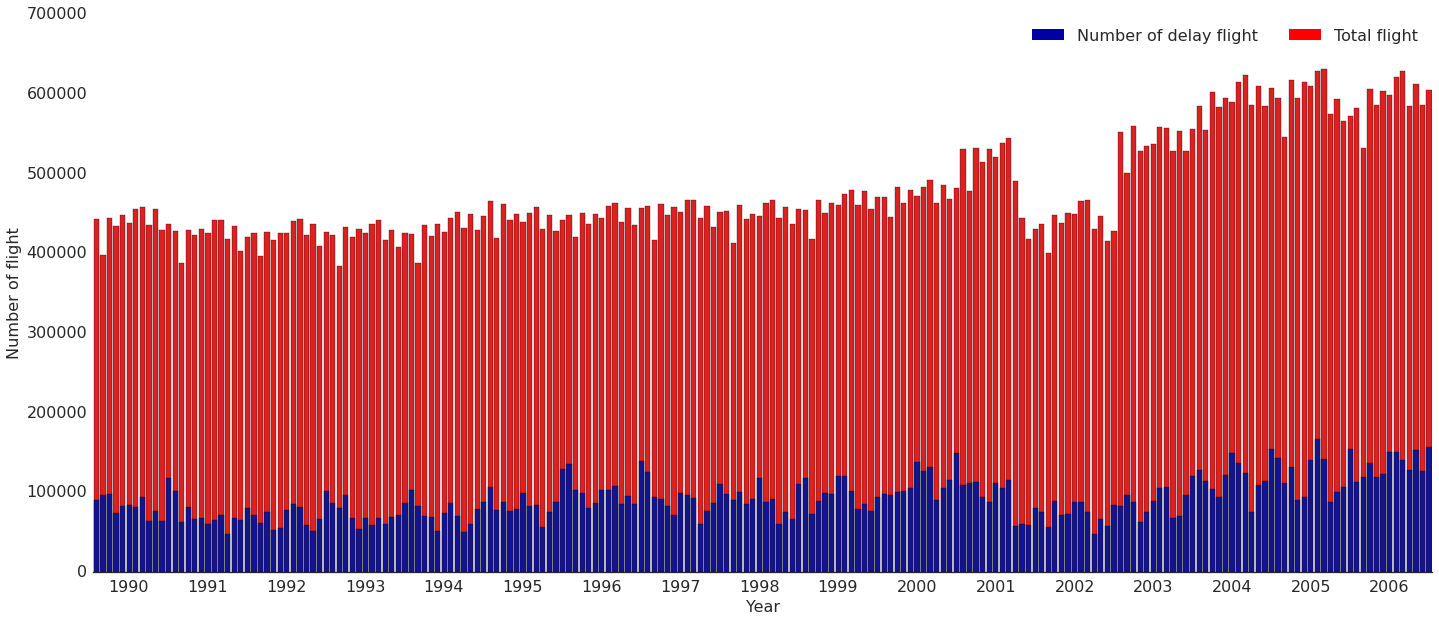

In [54]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

#Plot 1 - background - "total" (top) series
sns.barplot(x = np.arange(0,len(pdf.month)), y = pdf.total, color = "red")
bottom_plot = sns.barplot(x = np.arange(0,len(pdf.month)), y = pdf.delay, color = "#0000A3")


topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Number of delay flight', 'Total flight'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
sns.despine(left=True)
bottom_plot.set_ylabel("Number of flight")
bottom_plot.set_xlabel("Year")
ind = np.arange(5,len(pdf.month),12)
label = np.arange(1990,2007)
bottom_plot.set_xticks(ind)
bottom_plot.set_xticklabels(labels=label)


#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
As you can see, even total flight increases by years but delay flight is quite stable. It can be development of technology, improvement in pilot skill,.... <br><br>

The variance number of delay flights over the years can be the effect of weather, special events...
</div>

In [214]:
df_delay_group = df_delay.groupby(['year','dest_airport']).agg(func.count('*').alias('nflights'))\
                                    .orderBy(['year','dest_airport'])
dataplot = df_delay_group.collect()
dataplot = [x for x in dataplot]
pdf_d = pd.DataFrame(dataplot,columns=['year','airport','nflights'])

df_delay_group = df_delay.groupby(['year','src_airport']).agg(func.count('*').alias('nflights'))\
                                    .orderBy(['year','src_airport'])
dataplot = df_delay_group.collect()
dataplot = [x for x in dataplot]
pdf_a = pd.DataFrame(dataplot,columns=['year','airport','nflights'])

In [215]:
pdf = pd.merge(pdf_a,pdf_d,on=['year','airport'])
pdf['nflights'] = pdf.nflights_x + pdf.nflights_y
pdf = pdf[['year','airport','nflights']]

In [216]:
a = pdf.sort('nflights',ascending=False).groupby('year').apply(lambda x: x.head(10) if len(x) >= 10 else x.head(0))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [225]:
a

year airport  nflights
year                             
1990 162   1990     ORD    544122
     7     1990     ATL    540522
     56    1990     DFW    482372
     120   1990     LAX    339296
     170   1990     PHX    277897
     54    1990     DEN    276109
     202   1990     SFO    259523
     213   1990     STL    255312
     60    1990     DTW    242343
     172   1990     PIT    236533
1991 397   1991     ORD    531638
     291   1991     DFW    491165
     242   1991     ATL    376405
     356   1991     LAX    313792
     289   1991     DEN    276721
     406   1991     PHX    275462
     435   1991     SFO    247072
     276   1991     CLT    244990
     447   1991     STL    241005
     295   1991     DTW    240721
1992 632   1992     ORD    557156
     526   1992     DFW    511566
     478   1992     ATL    405810
     589   1992     LAX    310909
     524   1992     DEN    297117
     641   1992     PHX    273532
     643   1992     PIT    268669
     531   1992     DTW    250078
     681   1992     STL    248121
     511   1992     CLT    248091
...         ...     ...       ...
2004 3145  2004     ATL    835061
     3331  2004     ORD    752376
     3205  2004     DFW    688856
     3279  2004     LAX    465353
     3198  2004     CVG    415948
     3259  2004     IAH    404126
     3340  2004     PHX    340445
     3277  2004     LAS    316334
     3220  2004     EWR    316287
     3204  2004     DEN    310407
2005 3430  2005     ATL    863478
     3614  2005     ORD    675450
     3491  2005     DFW    615489
     3563  2005     LAX    461844
     3543  2005     IAH    424095
     3482  2005     CVG    417073
     3490  2005     DEN    365766
     3623  2005     PHX    348986
     3561  2005     LAS    335091
     3664  2005     SLC    321336
2006 3716  2006     ATL    812800
     3902  2006     ORD    747535
     3777  2006     DFW    602475
     3851  2006     LAX    467688
     3776  2006     DEN    464841
     3830  2006     IAH    448065
     3911  2006     PHX    430171
     3849  2006     LAS    369449
     3790  2006     EWR    316547
     3951  2006     SLC    284342

[170 rows x 3 columns]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
As you can see the data of the number of flights over years in top 5 airport, it changes over the year. ORD is the busiest airport in 1994 but ATL go to the top since 2000. It shows that the charasteristic of feature changed across the year. So it will better if you use data around 2 3 recent year to predict the following year. 
</div>

## 6.3. Feature selection 

You might think that the flight delays do not only depend on the source aiport, destination airport, departure time, etc... as we assumed. They also depend on other features such as the weather, the origin country, the destination city,... To improve the prediction quality, we should consider these features too.

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>COORDINATION DATA - ANALYZING, MODELING AND TESTING</font></h2>
</div>

In [88]:
import urllib.request
urllib.request.urlretrieve("http://stat-computing.org/dataexpo/2009/airports.csv", "coordinate.csv")
! hadoop fs -put coordinate.csv .

put: `coordinate.csv': File exists


### CREAT DICTIONARY OF AIRPORT INFORMATION

In [70]:
import csv
raw_dict_air = list()
with open('coordinate.csv') as f:
    reader = csv.reader(f)
    next(reader,None)
    for row in reader:
        raw_dict_air.append((row[0],row[3],float(row[5]),float(row[6])))

In [71]:
# DATA FOR ANYLIZING 
sqlContext = SQLContext(sc)
df_dict_coor =  sqlContext.createDataFrame(raw_dict_air,['CODE','STATE','Lat','Long'])

### MAP STATE TO INDEX

In [110]:
state_inf = df_dict_coor.groupBy('STATE').count().select("STATE").collect()
state_inf = [x[0] for x in state_inf]
num_state = len(state_inf)
state_idx = range(0, num_state)

map_state_to_idx = dict(zip(state_inf, state_idx))
dict_coor = {x[0] : [map_state_to_idx.get(x[1]),x[2],x[3]]  for x in raw_dict_air}
#dict_coor = {x[0] : [x[2],x[3]]  for x in raw_dict_air}

In [102]:
def is_valid(value):
    return value != "NA" and len(value) > 0
def getLocation(value):
    return list(dict_coor.get(value))

In [115]:
data = cleaned_data.map(lambda line: line.split(',')) \
        .map(lambda values: 
        LabeledPoint( 
            int(values[14]) if is_valid(values[14]) else mean_arrival_delay, # arrival delay
            [
                int(values[0]), # year
                int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
                values[2] if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                values[3] if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                values[5] if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
                values[7] if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
                # if the value is valid, map it to the corresponding index
                # otherwise, use the most common value
                map_carriers_to_index[values[8]] if is_valid(values[8]) \
                    else map_carriers_to_index[carriers[0]], # carrier
                map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                     else map_src_airport_to_index[src_airports[0]], # src_airport
                map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                     else map_dest_airport_to_index[dest_airports[0]], # destination_airport
                int(values[18]) if is_valid(values[18]) else mean_distance, # distance
                1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            ]+getLocation(values[17]) # destination_airport
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

### TRAINING AN EVALUATION

In [105]:
# DEFAULT SETTING + COORDINATION DATA
categorical_info = {6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
trainandtest(trainingData,testData)
# MONTH - Day of Month - Day of week are treated at categorical + COORDINATION DATA
categorical_info = {1:13,2:32,3:8,6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
trainandtest(trainingData,testData)

Test Mean Squared Error = 842.336478394
Training Mean Squared Error = 795.472483188
Test Mean Squared Error = 851.575124804
Training Mean Squared Error = 745.369272237


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT</font></h3>
</div>

<div class="alert alert-warning"> THIS COMMENT IS BASED ON DATA 2003. 
<br><br>
Using coordinate data do not give us better result. We will analysise to see the relation between coordination and delay 
<br><br>
Next, we treat date data except "YEAR" as categorical data, then we obtain better outcome (MSE=842 compared with 851 in default setting). In our opinion, numbers in month,day of week are just index for that data so that it will be better to treat them as categorical) 

</div>

### ANALYSIS

In [82]:
df_flight_withcoor = df.join(df_dict_coor,df['dest_airport'] == df_dict_coor['CODE'],"inner")

In [83]:
df_flight_withcoor.take(1)

[Row(year=2003, month=1, day_of_month=1, day_of_week=3, scheduled_departure_time=1705, scheduled_arrival_time=1824, carrier='DH', arrival_delay=88, distance=238, src_airport='IAD', dest_airport='BGM', is_weekend=0, CODE='BGM', STATE='NY', Lat=42.20848278, Long=-75.97961361)]

In [84]:
# create new column that marks whether the flights are delay
df_flight_coor_delay = df_flight_withcoor.withColumn('is_delay', 
                     when(df_flight_withcoor['arrival_delay'] >= 15, 1).otherwise(0)) \
                    .withColumn('hour', round(df_flight_withcoor.scheduled_departure_time/100, 0)%24) \
                    .select('arrival_delay','CODE','STATE','Lat','Long','is_delay','hour')

In [85]:
df_airport = df_flight_coor_delay.groupby('CODE') \
            .agg((sum('is_delay')/count('*')).alias('delaycount'),count('*').alias('count'),
                mean('arrival_delay').alias('mean'),
                mean('Lat').alias('Lat'), mean('Long').alias('Long'))

In [86]:
data = df_airport.select('CODE','count','delaycount','mean','Long','Lat').toPandas()

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


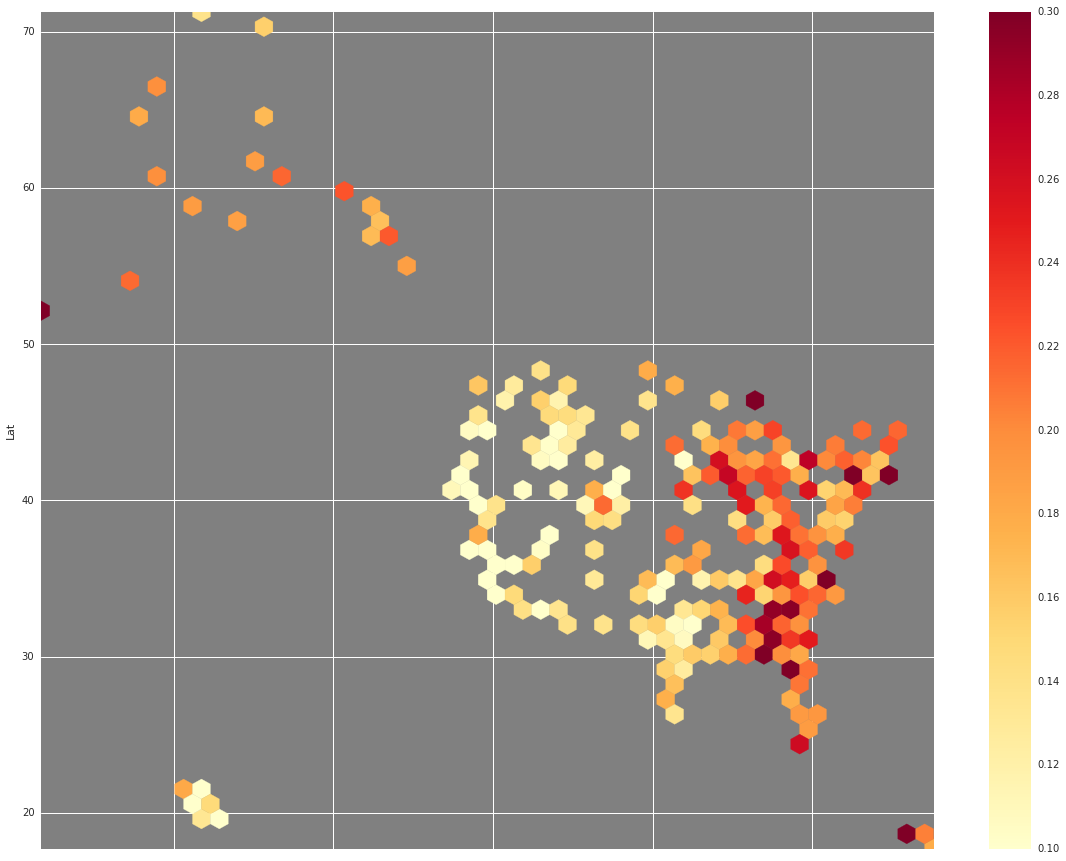

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

size = 100 * (data['mean'] / np.max(data['mean']))



graph = data.plot(kind='hexbin', figsize=(20,15), x='Long', y='Lat', C='delaycount', 
          reduce_C_function=np.max, gridsize=50, cmap = "YlOrRd",vmax=0.3, vmin=0.1)
graph.set_label('Delay Count by Location')
graph.set_axis_bgcolor(color='gray')

/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


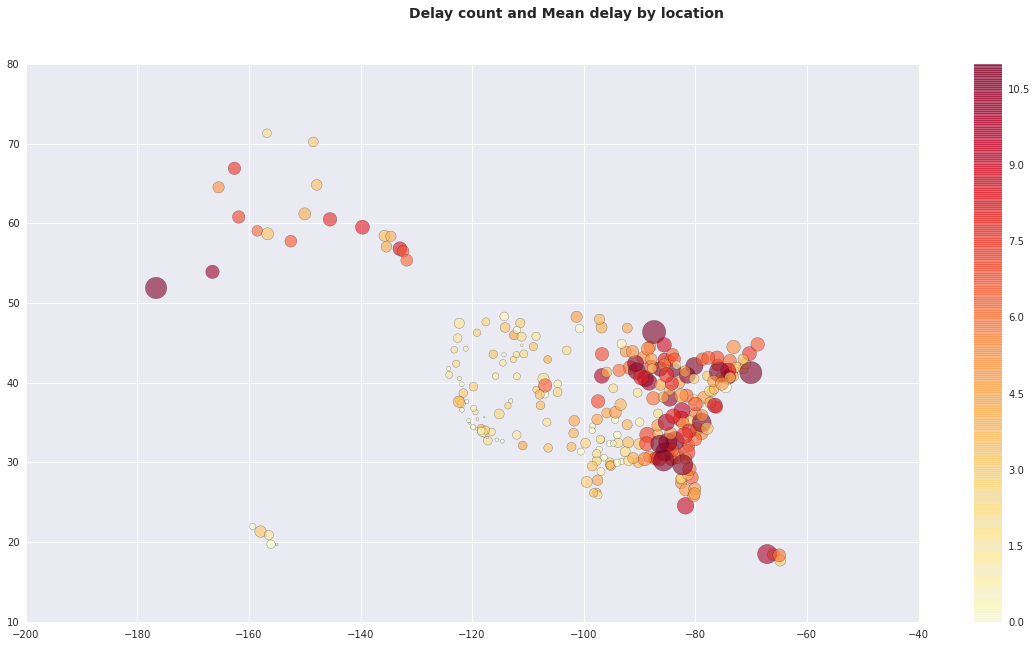

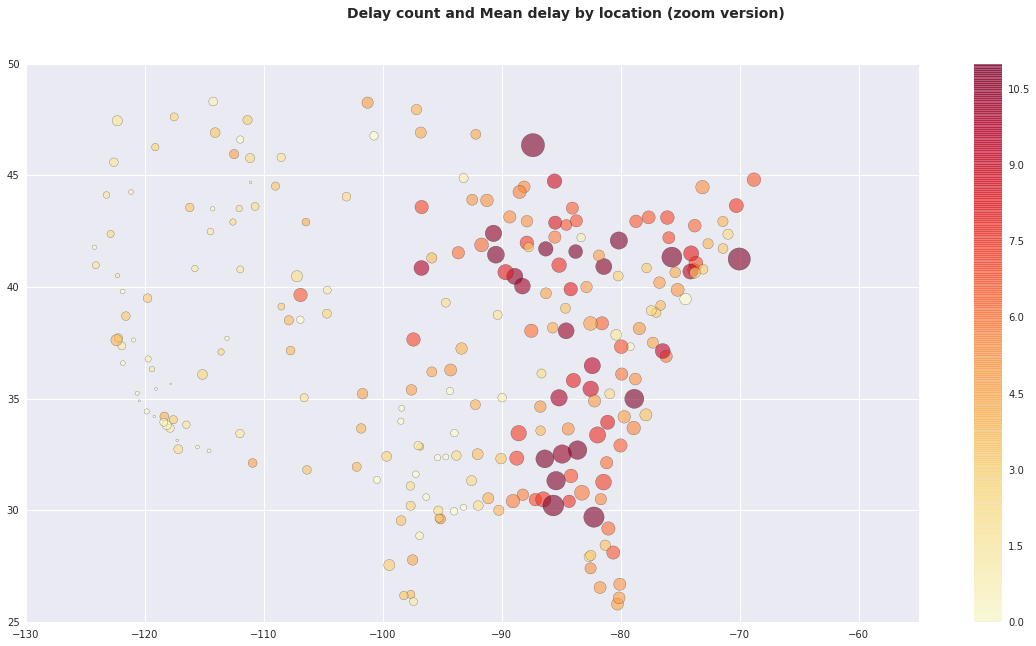

In [88]:
N = 50
x = data['Long']
y = data['Lat']
colors = data['mean']
area = np.power(data['delaycount'],2)*4000 # 0 to 15 point radii

fig = plt.figure(figsize=(20,10))
fig.suptitle('Delay count and Mean delay by location', fontsize=14, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.set_xlabel = 'Latitude'
ax.set_ylabel = 'Longtitude'
ax_p = ax.scatter(x, y, s=area, c=colors, alpha=0.6,cmap="YlOrRd",vmax=11., vmin=0.)
fig.colorbar(ax_p)
plt.show()

fig = plt.figure(figsize=(20,10))
fig.suptitle('Delay count and Mean delay by location (zoom version)', fontsize=14, fontweight='bold')
ax = fig.add_subplot(1,1,1)
ax.set_ylim(25,50)
ax.set_xlim(-130,-55)
ax_p = ax.scatter(x, y, s=area, c=colors, alpha=0.6,cmap="YlOrRd",vmax=11., vmin=0.)
fig.colorbar(ax_p)
plt.show()

In [89]:
! pip install geopy
! pip install basemap --allow-external basemap --allow-unverified basemap

    100% |████████████████████████████████| 71kB 1.4MB/s 
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
DEPRECATION: --allow-external has been deprecated and will be removed in the future. Due to changes in the repository protocol, it no longer has any effect.
DEPRECATION: --allow-unverified has been deprecated and will be removed in the future. Due to changes in the repository protocol, it no longer has any effect.
You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


/opt/conda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


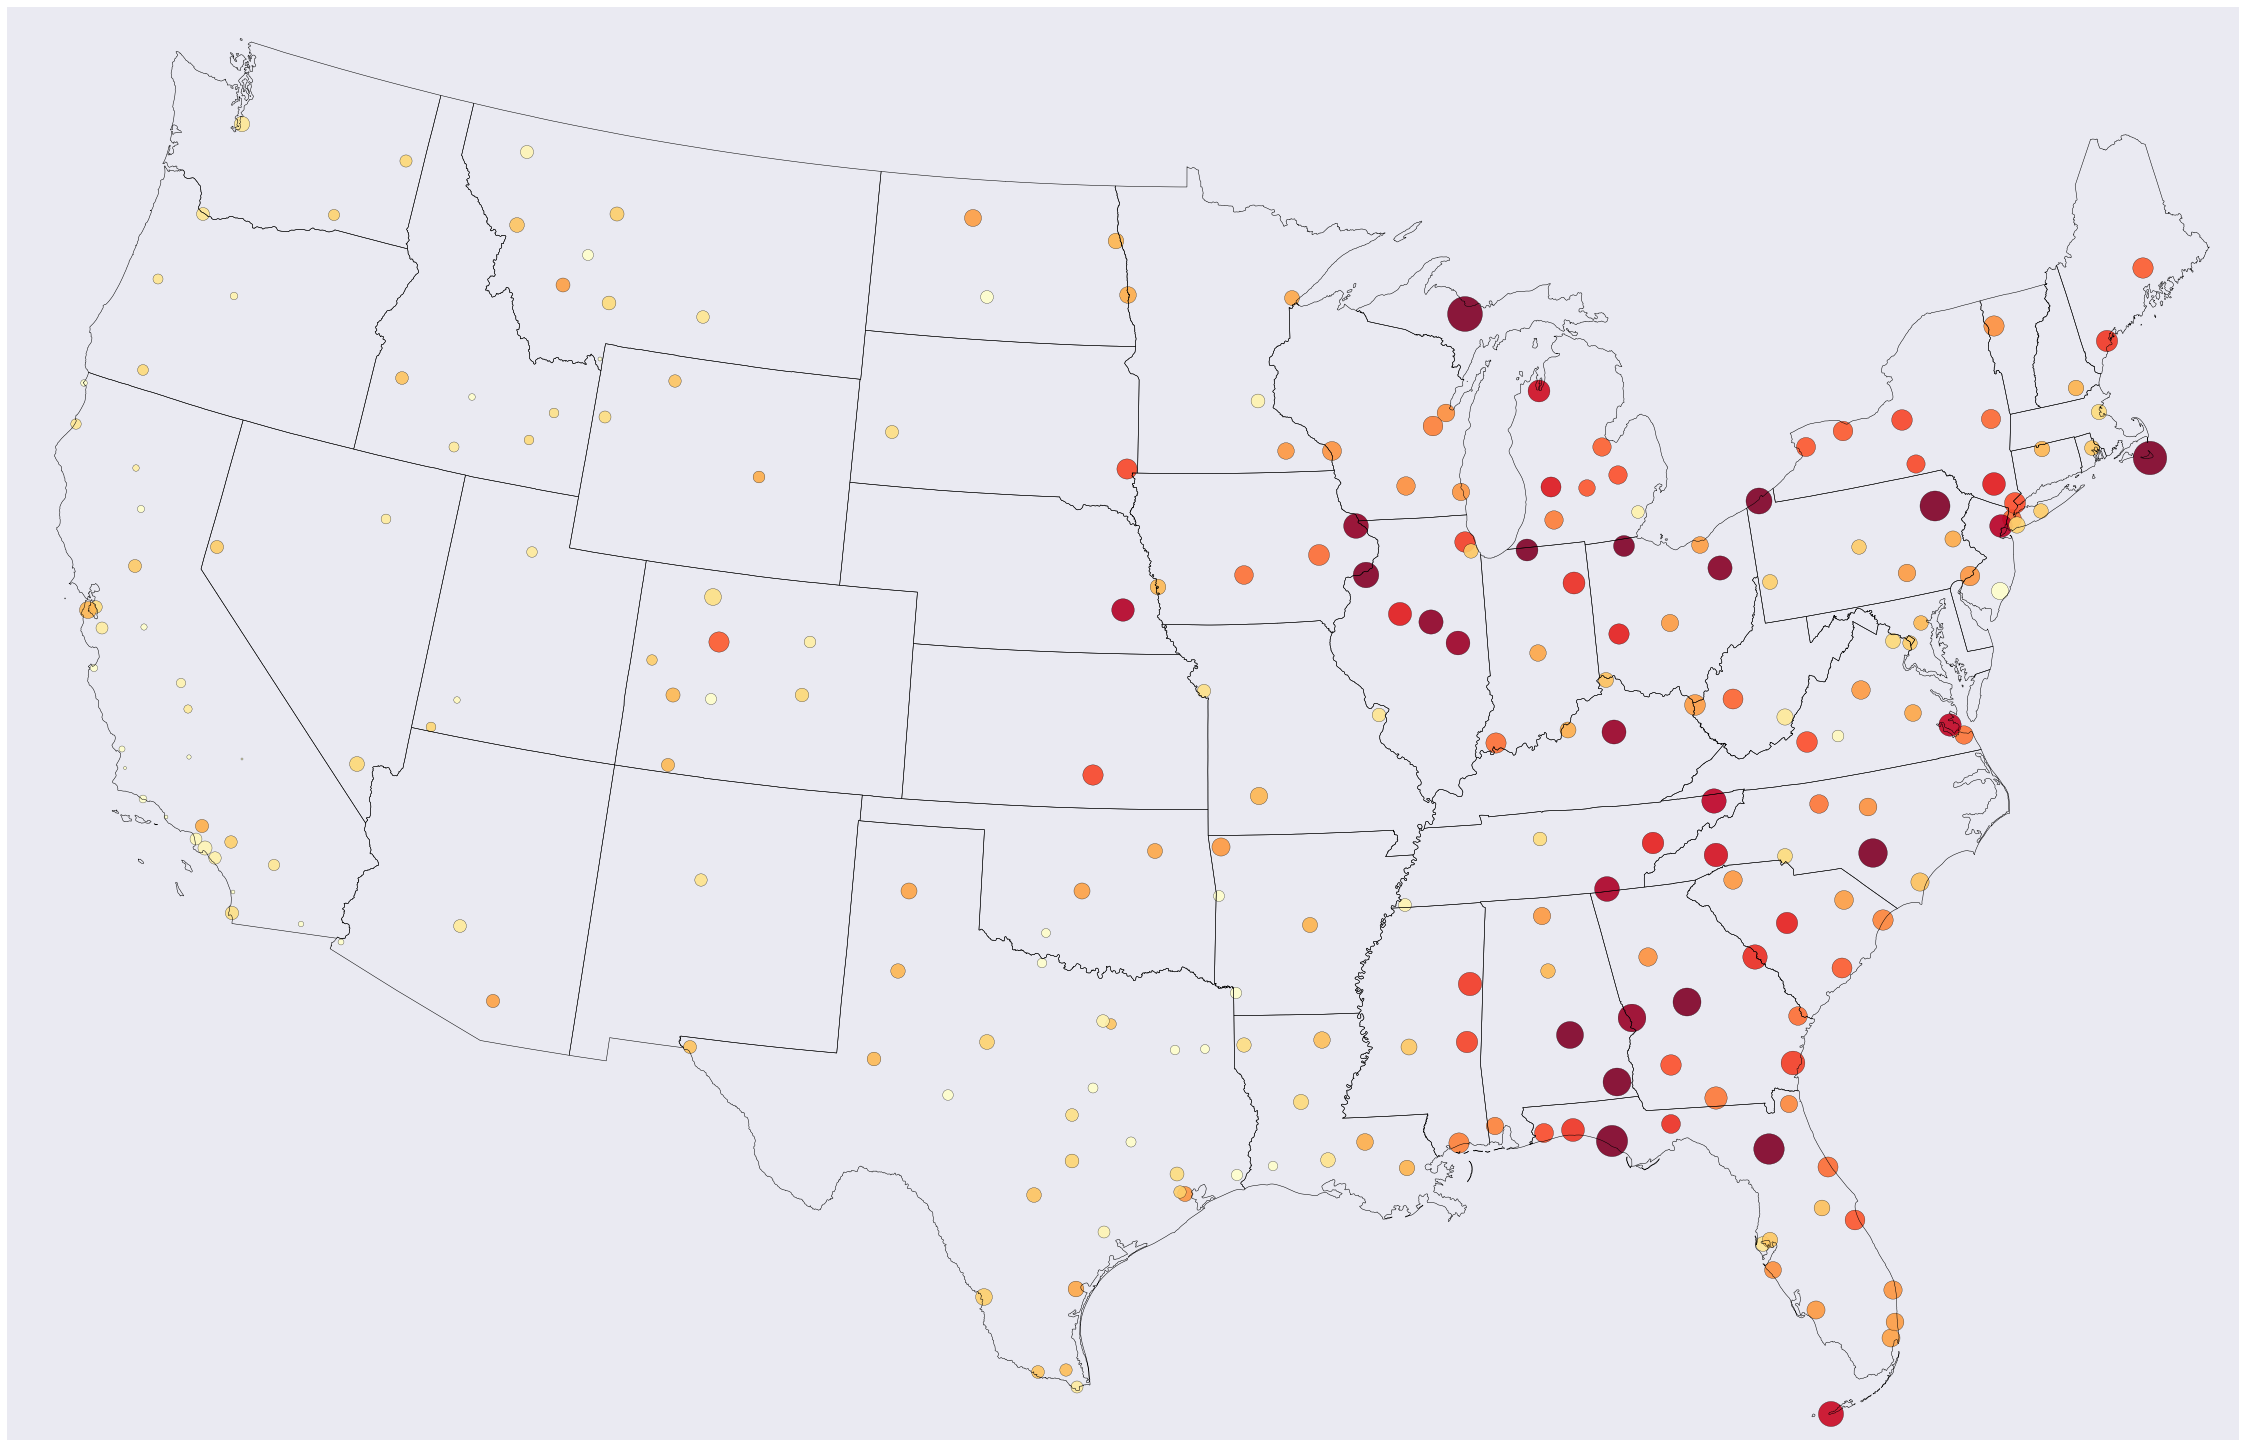

In [90]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(40,40))
area = np.power(data['delaycount'],2)*9000 # 0 to 15 point radii
# create the map
map = Basemap( llcrnrlon = -119, llcrnrlat = 22, urcrnrlon = -64, 
    urcrnrlat = 49, projection = 'lcc', lat_1 = 33, 
    lat_2 = 45, lon_0 = -95)

# load the shape file with "states"
map.readshapefile('st99_d00', name='states', drawbounds=True)

for i in range(len(x)):
        x_l,y_l = map(x[i],y[i])
        map.scatter(x_l, y_l, s=area[i], c=colors[i], alpha=0.9,cmap="YlOrRd",vmax=11., vmin=0.)
plt.show()

In [92]:
# MONTH - Day of Month - Day of week are treated at categorical + COORDINATION DATA - STATE INFORMATION
categorical_info = {1:13,2:32,3:8,6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
trainandtest(trainingData,testData)

Test Mean Squared Error = 871.91684004


In [95]:
# MONTH - Day of Month - Day of week are treated at categorical + COORDINATION DATA - STATE INFORMATION
categorical_info = {1:13,2:32,3:8,6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2,11:num_state}
trainandtest(trainingData,testData)

Test Mean Squared Error = 871.124632377


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT</font></h3>
</div>
<div class="alert alert-warning"> After visualizing on map, information about STATE of airport does not show clearly about ratio delay or duration of delay. There are some state, only biggest airport in that state have high delay ratio and delay duration. But if you look on the west, the delay ratio is quite low and either on delay duration. It is quite strange and we need to analysise more to give final conclusion.
<br><br>
So we run on the new training set that only uses coordination information. We observe that the result does not change. So "STATE" of the airport is not a good feature to predict flight delay in this case </div>

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>Holiday DATA</font></h2>
</div>


- Holiday: we just collect all public holiday data in US and its duration. In addition, each state has their own holiday. We still do not find a "free" version of that. 

In [133]:
! hadoop fs -put holidays.csv 
! hadoop fs -put holidays_duration.csv

put: `holidays.csv': File exists
put: `holidays_duration.csv': File exists


In [8]:
import csv
import datetime
import numpy as np

def getDateTime(value):
    return datetime.datetime.strptime(value,'%m/%d/%Y')
raw_holidays = list()
with open('holidays.csv') as f:
    reader = csv.reader(f)
    next(reader,None)
    for row in reader:
        raw_holidays.append((getDateTime(row[0]),float(row[1])+ (1 if int(row[1]) else 0)))
df_holiday = pd.DataFrame(raw_holidays,columns=["date","weight"])
df_holiday = df_holiday[df_holiday['date'] > datetime.datetime(1998, 12, 31)]

In [167]:
def updateWeightHoliday(x,hdate):
    if (x == hdate):
        return (x,1.0)
    if ( np.abs((x-hdate).days) == 1):
        return (x,1.5)
    return (x,1.0)

In [168]:
raw_holidays[len(raw_holidays)-1]

(datetime.datetime(2008, 12, 31, 0, 0), 0.0)

In [169]:
raw_holidays_duration = list()
with open('holidays_duration.csv') as f:
    reader = csv.reader(f)
    for row in reader:
        raw_holidays_duration.append((getDateTime(row[1]),getDateTime(row[2]),getDateTime(row[3])))
raw_holidays_duration.sort(key=lambda x: x[0])

new_holidays_duraion = list()
for row in raw_holidays_duration:
    temp = row[1]
    temp_list = list()
    while temp <= row[2]:
        temp_list.append(temp)
        temp = temp + datetime.timedelta(days=1)
    temp_list = list(map(lambda x: updateWeightHoliday(x,row[0]),temp_list))
    new_holidays_duraion = new_holidays_duraion+temp_list

In [170]:
df_holiday_duration = pd.DataFrame(new_holidays_duraion,columns=['date','weight'])
df_holiday_2nd = df_holiday.merge(df_holiday_duration,on='date',how='left')
df_holiday_2nd =  df_holiday_2nd.fillna(0)
df_holiday_2nd['holiday_w']=df_holiday_2nd.weight_x + df_holiday_2nd.weight_y
df_holiday_2nd = df_holiday_2nd[['date','holiday_w']]

In [171]:
year_ = df_holiday_2nd.date.map(lambda x: x.year)
month_ = df_holiday_2nd.date.map(lambda x: x.month)
day_ = df_holiday_2nd.date.map(lambda x: x.day)
df_holiday_2nd['year_'] = year_
df_holiday_2nd['month_'] = month_
df_holiday_2nd['day_'] = day_
df_holiday_2nd = df_holiday_2nd.drop('date',axis=1)

In [172]:
sqlContext = SQLContext(sc)
df_rdd_holiday = sqlContext.createDataFrame(df_holiday_2nd)

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

From data, we create Holiday data with the heuristic think: The airport will have a high traffic in official holiday day, one day before and after that day in case we have holiday week. 

Our weight follow the rule:
- Weight = 2 in case big holiday date (big holiday when its duration is more than 4 days)
- Weight = 1.5 in case 1 day after and before big holiday
- Weight = 1 incase small holiday date (1 day off) and others day in big holiday week 

In [6]:
sqlContext = SQLContext(sc)
df = createdataframe(cleaningdata(2003))

In [7]:
[map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
            the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
            the_most_common_s_arrival_time,mean_distance,mean_arrival_delay] = createMissValueFill(df)

In [175]:
sqlContext.clearCache()

In [176]:
def is_valid(value):
    return value != "NA" and len(value) > 0

df = (sqlContext.createDataFrame(cleaned_data_to_columns,schema = airline_data_schema)
        .select('year', 'month', 'day_of_month', 'day_of_week', 'scheduled_departure_time', 
                'scheduled_arrival_time','carrier', 'arrival_delay', 'distance', 'src_airport', 'dest_airport').cache())
df = df.withColumn('is_weekend',when(df['day_of_week']>=6 , 1).otherwise(0))
df_join = df.join(df_rdd_holiday,(df['year']==df_rdd_holiday['year_']) 
                  & (df['month']==df_rdd_holiday['month_'])
                  & (df['day_of_month']==df_rdd_holiday['day_'])).drop('month_','year_','day_').cache()

In [178]:
def is_valid(value):
    return value is not None

In [188]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel
from pyspark.mllib.util import MLUtils
from pyspark.mllib.regression import LabeledPoint

data = df_join.rdd.map(lambda values: 
        LabeledPoint( 
            int(values[7]) if is_valid(values[7]) else mean_arrival_delay, # arrival delay
            [
                values[0], # year
                values[1] if is_valid(values[1]) else the_most_common_month, # month
                values[2] if is_valid(values[2]) else the_most_common_day_of_month, # day of month
                values[3] if is_valid(values[3]) else the_most_common_day_of_week, # day of week
                values[4] if is_valid(values[4]) else the_most_common_s_departure_time, # scheduled departure time
                values[5] if is_valid(values[5]) else the_most_common_s_arrival_time, # scheduled arrival time
                map_carriers_to_index[values[6]] if is_valid(values[6]) else 0, # carrier
                map_src_airport_to_index[values[9]] if is_valid(values[9]) else 0, # src_airport
                map_dest_airport_to_index[values[10]] if is_valid(values[10]) else 0, # destination_airport
                values[8] if is_valid(values[8]) else mean_distance, # distance
                values[11] if is_valid(values[11]) else 0, # is_weekend
                values[12] if is_valid(values[12]) else 0 # holiday
            ]
        )
    )

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = data.randomSplit([0.7,0.3])

trainingData = trainingData.cache()
testData = testData.cache()

In [189]:
categorical_info = {1:13,2:32,3:8,6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
trainandtest(trainingData,testData)

Test Mean Squared Error = 849.499662742
Training Mean Squared Error = 756.086512079


In [187]:
categorical_info = {1:13,2:32,3:8,6: num_carriers, 7: num_src_airports, 8: num_dest_airports, 10: 2}
trainandtest(trainingData,testData)

Test Mean Squared Error = 866.376453483
Training Mean Squared Error = 875.359877876


In [ ]:
<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
Holiday is one of tricky feature. In our opinion, it is quite good but we have to do some experiement to create right weight for holiday date and holiday interval. We shows you distribution of delay on 2 time interval above (Chrismas - President Day). <br> 
<br> From the graph, we can see it has a low delay and delay mean in "date of holiday" than others day. For example, few people take a flight on Dec 24, they usually travel or go back home on last Friday or Saturday to prepare a long winter holiday. But in case of short holiday (President Day), people usually travel one day before holiday. It has rules but we should do the statistic over the years to understand the rule and we can create better feature for this problem
</div>

### ANALYSIS ON WINTER HOLIDAY - EASTER - Independence Day

In [228]:
df_event = df_join.where((df_join['month']==12) & (df_join['day_of_month']>10) & (df_join['day_of_month']<32))
df_event_de = df_event.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

In [229]:
statistic_day = df_event_de.groupBy(['day_of_month'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'), 
         func.mean('arrival_delay').alias('mean'),func.mean('day_of_week'),func.count('*'))
statistic_day = statistic_day.orderBy('day_of_month')
pdf = pd.DataFrame(data=statistic_day.collect(),columns=['day','delayratio','meandelay','dayofweek','numflight'])

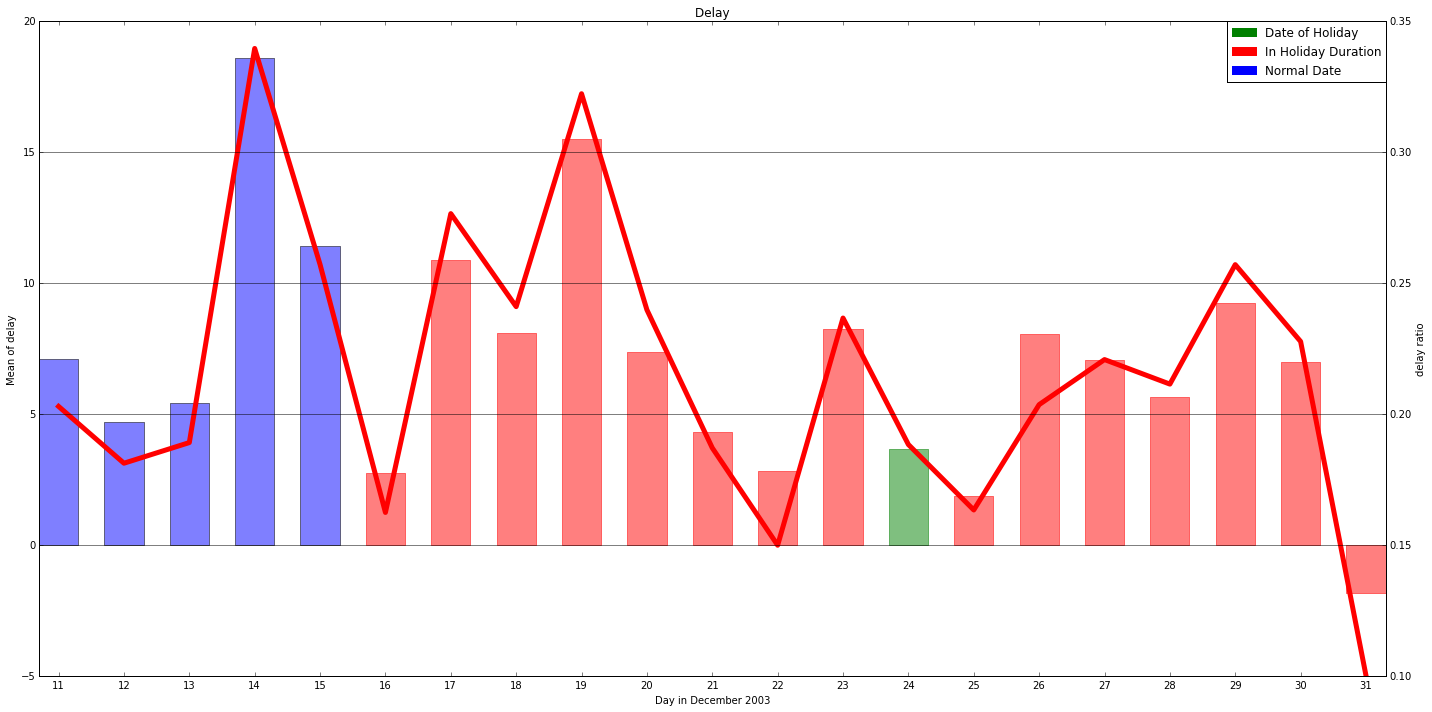

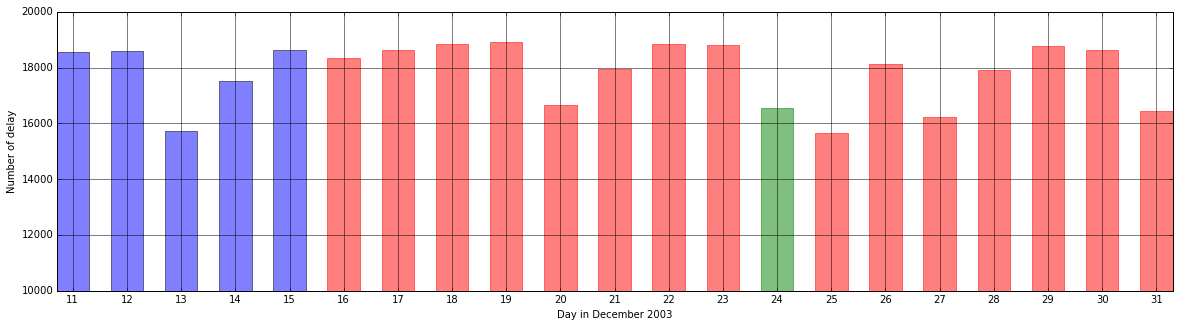

In [237]:
index = np.arange(pdf.day.count())
bar_width = 0.6
opacity = 0.5

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
plt.axis('normal')

ax.set_xlabel("Day in December 2003")
ax.set_ylabel("Mean of delay")
ax2.set_ylabel("delay ratio")
plt.xticks(index, pdf.day)
plt.title('Delay ')
plt.grid(True,which="both",ls="-")

bar = ax.bar(index,pdf.meandelay, 
        bar_width, color='b',align = 'center' ,
        label='delay ratio',alpha = opacity)

for i in range(5,21):
    bar[i].set_color('r')
bar[13].set_color('g')
bar2 = ax2.plot(index, pdf.delayratio, color='r',linewidth=5, 
       label='mean delay')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.tight_layout()

patch1 = mpatches.Patch(color='green', label='Date of Holiday')
patch2 = mpatches.Patch(color='red', label='In Holiday Duration')
patch3 = mpatches.Patch(color='blue', label='Normal Date')

plt.legend(handles=[patch1, patch2, patch3], loc=1, borderaxespad=0.)

plt.show()

fig = plt.figure(figsize=(20,5))      
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Day in December 2003")
ax.set_ylabel("Number of delay")
ax.set_ylim(10000,20000)
plt.xticks(index, pdf.day)
plt.grid(True,which="both",ls="-")
bar = ax.bar(index,pdf.numflight, 
        bar_width, color='b',align = 'center' ,
        label='numbers of flights',alpha = opacity)
for i in range(5,21):
    bar[i].set_color('r')
bar[13].set_color('g')
plt.show()

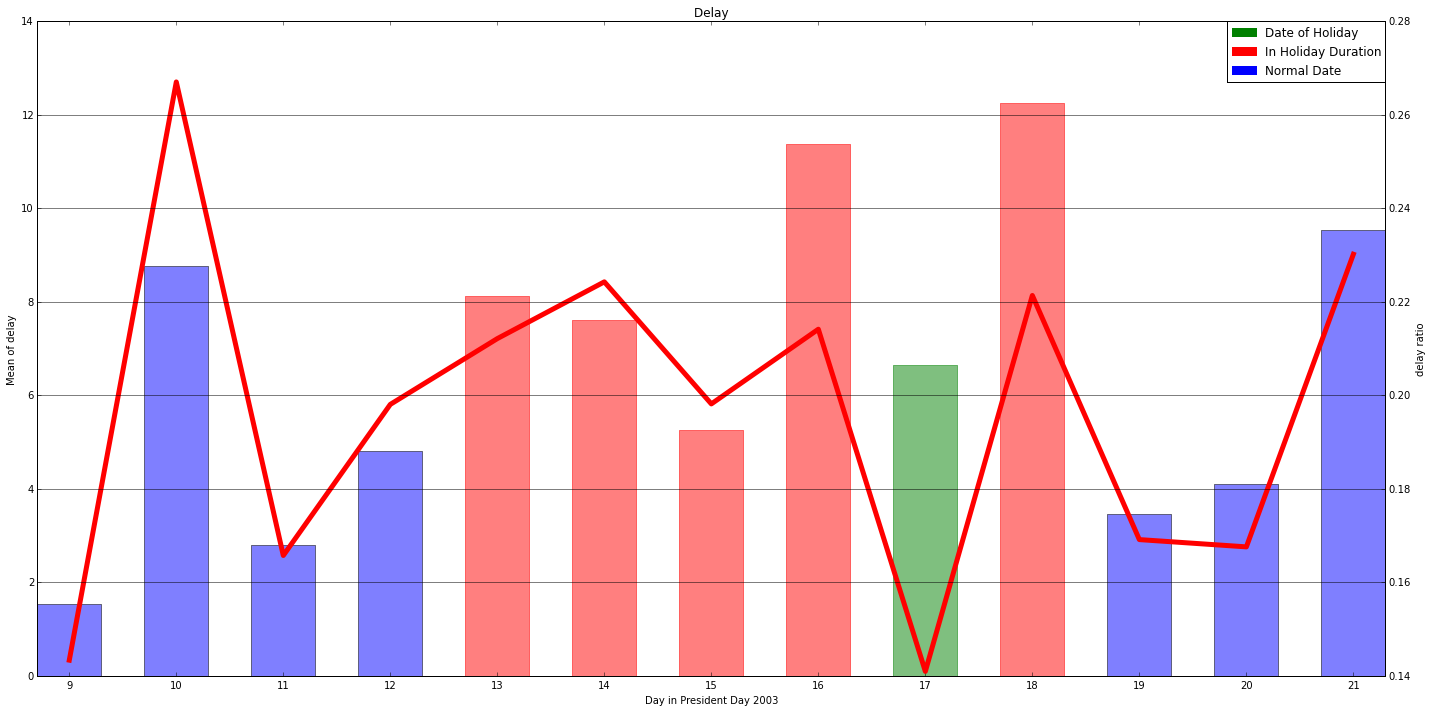

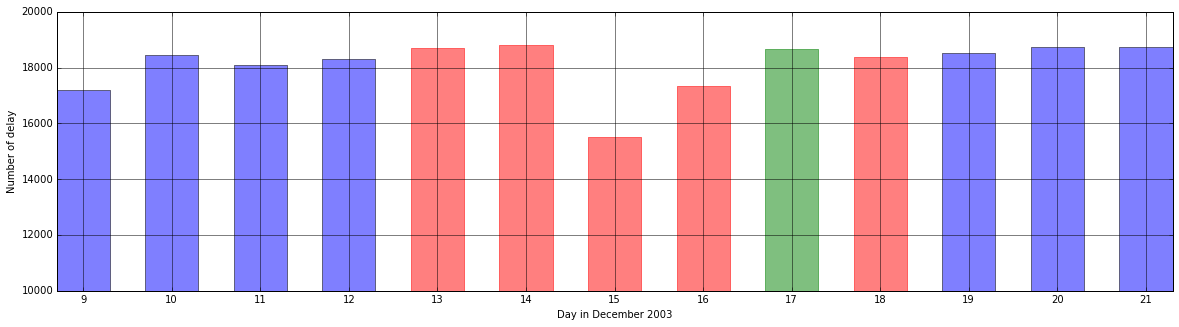

In [241]:
df_event = df_join.where((df_join['month']==2) & (df_join['day_of_month']>8) & (df_join['day_of_month']<22))
df_event_de = df_event.withColumn('is_delay', when(df['arrival_delay'] >= 15, 1).otherwise(0))

statistic_day = df_event_de.groupBy(['day_of_month'])\
    .agg((func.sum('is_delay')/func.count('*')).alias('delay_ratio'), 
         func.mean('arrival_delay').alias('mean'),func.mean('day_of_week'),func.count('*'))
statistic_day = statistic_day.orderBy('day_of_month')
pdf = pd.DataFrame(data=statistic_day.collect(),columns=['day','delayratio','meandelay','dayofweek','numflight'])

index = np.arange(pdf.day.count())
bar_width = 0.6
opacity = 0.5

fig = plt.figure(figsize=(20,10))                                                             
ax = fig.add_subplot(1,1,1)
ax2 = ax.twinx()
plt.axis('normal')

ax.set_xlabel("Day in President Day 2003")
ax.set_ylabel("Mean of delay")
ax2.set_ylabel("delay ratio")
plt.xticks(index, pdf.day)
plt.title('Delay ')
plt.grid(True,which="both",ls="-")

bar = ax.bar(index,pdf.meandelay, 
        bar_width, color='b',align = 'center' ,
        label='delay ratio',alpha = opacity)

for i in range(4,10):
    bar[i].set_color('r')
bar[8].set_color('g')

patch1 = mpatches.Patch(color='green', label='Date of Holiday')
patch2 = mpatches.Patch(color='red', label='In Holiday Duration')
patch3 = mpatches.Patch(color='blue', label='Normal Date')
plt.legend(handles=[patch1, patch2, patch3], loc=1, borderaxespad=0.)

bar2 = ax2.plot(index, pdf.delayratio, color='r',linewidth=5, 
       label='mean delay')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(20,5))      
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Day in December 2003")
ax.set_ylabel("Number of delay")
ax.set_ylim(10000,20000)
plt.xticks(index, pdf.day)
plt.grid(True,which="both",ls="-")
bar = ax.bar(index,pdf.numflight, 
        bar_width, color='b',align = 'center' ,
        label='numbers of flights',alpha = opacity)
for i in range(4,10):
    bar[i].set_color('r')
bar[8].set_color('g')
plt.show()

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
Holiday is one of tricky feature. In our opinion, it is quite good but we have to do some experiement to create right weight for holiday date and holiday interval. We shows you distribution of delay on 2 time interval above (Chrismas - President Day). <br> 
<br> From the graph, we can see it has a low delay and delay mean in "date of holiday" than others day. For example, few people take a flight on Dec 24, they usually travel or go back home on last Friday or Saturday to prepare a long winter holiday. But in case of short holiday (President Day), people usually travel one day before holiday. It has rules but we should do the statistic over the years to understand the rule and we can create better feature for this problem
</div>

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>WEATHER DATA</font></h2>
</div>

The file we receive is collected with each airport in each year. We merge them by year to prepare for next step

### PREPROCESS WEATHER DATA

In [ ]:
import os
import re
base = "merge/weather_"
def appendYearFile(year, filepath,code):
    file_object  = open(filepath, 'r')
    next(file_object)
    file_write = open(''.join([base,year,".csv"]),'a')
    for line in file_object: 
        file_write.write(''.join([code,',',line]))
    file_write.close()
    file_object.close()

for i in range(1987,2009):
    file = open(''.join([base,str(i),".csv"]),'w')
    file.write("AirPort,Index,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressurehPa, Mean Sea Level PressurehPa, Min Sea Level PressurehPa, Max VisibilityKm, Mean VisibilityKm, Min VisibilitykM, Max Wind SpeedKm/h, Mean Wind SpeedKm/h, Max Gust SpeedKm/h,Precipitationmm, CloudCover, Events,WindDirDegrees,day,month,year\n")
    file.close()
for file in os.listdir("corpus"):
    if (file.endswith(".csv")):
        #print(file)
        year = re.findall(r'\d+', file)[0]
        filepath = "corpus/" + file
        appendYearFile(year,filepath,file[0:3])

"AirPort,Index,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity, Mean Humidity, Min Humidity, Max Sea Level PressurehPa, Mean Sea Level PressurehPa, Min Sea Level PressurehPa, Max VisibilityKm, Mean VisibilityKm, Min VisibilitykM, Max Wind SpeedKm/h, Mean Wind SpeedKm/h, Max Gust SpeedKm/h, Precipitationmm, CloudCover, Events, WindDirDegrees, day, month, year"

In [6]:
sqlContext = SQLContext(sc)
input_path = "weather/weather_1994.csv"
raw_data = sc.textFile(input_path)

header = raw_data.first()
cleaned_data = raw_data.filter(lambda x:x != header)
cleaned_data_to_columns = cleaned_data.map(lambda l: l.split(",")).map(lambda cols: 
         (
            cols[0], #AIRPORT
            int(float(cols[24]))  if cols[24] else None, #day
            int(float(cols[25]))  if cols[25] else None, #month
            int(float(cols[26]))  if cols[26] else None, #year
            float(cols[2])  if cols[2] else None,
            float(cols[3])  if cols[3] else None,
            float(cols[4])  if cols[4] else None,
            float(cols[5])  if cols[5] else None,
            float(cols[6])  if cols[6] else None,
            float(cols[7])  if cols[7] else None,
            float(cols[8])  if cols[8] else None,
            float(cols[9])  if cols[9] else None,
            float(cols[10])  if cols[10] else None,
            float(cols[11])  if cols[11] else None,
            float(cols[12])  if cols[12] else None,
            float(cols[13])  if cols[13] else None,
            float(cols[14])  if cols[14] else None,
            float(cols[15])  if cols[15] else None,
            float(cols[16])  if cols[16] else None,
            float(cols[17])  if cols[17] else None,
            float(cols[18])  if cols[18] else None,
            float(cols[21])  if cols[21] else None,
            float(cols[23])  if cols[23] else None,

            cols[22]  if cols[22] else None,
         ))
header_df = "AirPort_,Day_,Month_,Year_,MaxTemp,MeanTemp,MinTemp,DewPointC,MeanDewPointC,MinDewpointC,MaxHumid,MeanHumid,MinHumid,MaxSeaLevel,MeanSeaLevel,MinSeaLevel,MaxVisi,MeanVisi,MinVisi,MaxWind,MeanWind,CloudCover,WindDirDegrees,Events"
label = header_df.split(',')
df = sqlContext.createDataFrame(cleaned_data_to_columns,label)
        

In [7]:
event_list = df.select('Events').distinct().orderBy('Events').collect()
event_list = [item[0] for item in event_list]
idx = range(0, len(event_list))
event_dict = dict(zip(event_list, idx))

In [12]:
print(event_list)

[None, 'Fog', 'Fog-Hail-Thunderstorm', 'Fog-Rain', 'Fog-Rain-Hail-Thunderstorm', 'Fog-Rain-Hail-Thunderstorm-Tornado', 'Fog-Rain-Snow', 'Fog-Rain-Snow-Hail-Thunderstorm', 'Fog-Rain-Snow-Thunderstorm', 'Fog-Rain-Thunderstorm', 'Fog-Rain-Thunderstorm-Tornado', 'Fog-Snow', 'Fog-Snow-Hail-Thunderstorm', 'Fog-Snow-Thunderstorm', 'Fog-Thunderstorm', 'Fog-Tornado', 'Rain', 'Rain-Hail-Thunderstorm', 'Rain-Hail-Thunderstorm-Tornado', 'Rain-Snow', 'Rain-Snow-Thunderstorm', 'Rain-Thunderstorm', 'Rain-Thunderstorm-Tornado', 'Rain-Tornado', 'Snow', 'Snow-Thunderstorm', 'Thunderstorm', 'Tornado']


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
A list of weather event in our data shows how bad the weather is. In our opnion, we think they have relation with each other. For example, Fog-Rain is worse than Fog but better than Fog-Snow. It needs time to understand and rank and use them as numberical data
<br><br> Because of time, we use it as catelogircal data. 
</div>

In [8]:
eventCode = {"EventCode" : [event_dict.get(x[0]) for x in df.select("Events").collect()]}
eventCodeCol = sqlContext.createDataFrame(pd.DataFrame(eventCode))


def count_not_null(c):
    return sum(col(c).isNull().cast("integer")).alias(c)
exprs = [count_not_null(c) for c in df.columns]
df.agg(*exprs).collect()[0]

Row(AirPort_=0, Day_=0, Month_=0, Year_=0, MaxTemp=774, MeanTemp=786, MinTemp=774, DewPointC=1504, MeanDewPointC=1504, MinDewpointC=1504, MaxHumid=1504, MeanHumid=1504, MinHumid=1504, MaxSeaLevel=1467, MeanSeaLevel=1467, MinSeaLevel=1467, MaxVisi=2055, MeanVisi=2055, MinVisi=2055, MaxWind=1466, MeanWind=1466, CloudCover=1547, WindDirDegrees=730, Events=26589)

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
List of number of missing values over the attributes. We replace missing Temperature, Wind, ... with mean value of the column. And fill Null value in Events values with 0 that means no events on that day.
</div>

In [9]:
pCLOUDCOVER = df.groupBy('CloudCover').count().dropna().sort('count',ascending=0).collect()[0][0]
AVG_VALUE = df.agg(func.mean("MaxTemp"),func.mean("MeanTemp"),func.mean("MinTemp"),func.mean("DewPointC"),func.mean("MeanDewPointC"),
      func.mean("MinDewpointC"),func.mean("MaxHumid"),func.mean("MeanHumid"),func.mean("MinHumid"),
      func.mean("MaxSeaLevel"),func.mean("MeanSeaLevel"),func.mean("MinSeaLevel"),
      func.mean("MaxVisi"),func.mean("MeanVisi"),func.mean("MinVisi"),
       func.mean("MaxWind"),func.mean("MeanWind"),func.mean("WindDirDegrees")
      ).collect()[0]

In [10]:
NA_VALUE = {
    "MaxTemp" : AVG_VALUE[0],
    "MeanTemp": AVG_VALUE[1],
    "MinTemp": AVG_VALUE[2],
    "DewPointC": AVG_VALUE[3],
    "MeanDewPointC": AVG_VALUE[4],
    "MinDewpointC": AVG_VALUE[5],
    "MaxHumid": AVG_VALUE[6],
    "MeanHumid": AVG_VALUE[7],
    "MinHumid": AVG_VALUE[8],
    "MaxSeaLevel": AVG_VALUE[9],
    "MeanSeaLevel": AVG_VALUE[10],
    "MinSeaLevel": AVG_VALUE[11],
    "MaxVisi": AVG_VALUE[12],
    "MeanVisi": AVG_VALUE[13],
    "MinVisi": AVG_VALUE[14],
    "MaxWind": AVG_VALUE[15],
    "MeanWind": AVG_VALUE[16],
    "WindDirDegrees": AVG_VALUE[17],
    "CloudCover": pCLOUDCOVER
    }
        

In [11]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

def convertEventCode(value):
    return event_dict.get(value)
udfconvertAirCode= udf(convertEventCode, StringType())

df_fill = df.na.fill(NA_VALUE).withColumn("EventCode", udfconvertAirCode("Events")).drop("Events")

exprs = [count_not_null(c) for c in df_fill.columns]
df_fill.agg(*exprs).collect()

[Row(AirPort_=0, Day_=0, Month_=0, Year_=0, MaxTemp=0, MeanTemp=0, MinTemp=0, DewPointC=0, MeanDewPointC=0, MinDewpointC=0, MaxHumid=0, MeanHumid=0, MinHumid=0, MaxSeaLevel=0, MeanSeaLevel=0, MinSeaLevel=0, MaxVisi=0, MeanVisi=0, MinVisi=0, MaxWind=0, MeanWind=0, CloudCover=0, WindDirDegrees=0, EventCode=0)]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
The list above shows us our weather data has been cleaned
</div>

In [12]:
cleaned_data = cleaningdata(1994)
[map_src_airport_to_index,map_dest_airport_to_index,map_carriers_to_index,the_most_common_month,
            the_most_common_day_of_month,the_most_common_day_of_week,the_most_common_s_departure_time,
            the_most_common_s_arrival_time,mean_distance,mean_arrival_delay,num_carriers,num_src_airports,
            num_dest_airports] = createMissValueFill(createdataframe(cleaned_data))

In [13]:
def convertAirCode(value):
    return map_dest_airport_to_index.get(value)
udfconvertAirCode= udf(convertAirCode, IntegerType())
df_fill_withcode = df_fill.withColumn("AirCode", udfconvertAirCode("AirPort_")).drop("AirPort_")

In [19]:
df_fill_withcode.take(1)

[Row(Day_=1, Month_=1, Year_=1994, MaxTemp=10.0, MeanTemp=1.0, MinTemp=-7.0, DewPointC=-8.0, MeanDewPointC=-10.0, MinDewpointC=-11.0, MaxHumid=71.0, MeanHumid=41.0, MinHumid=24.0, MaxSeaLevel=1027.0, MeanSeaLevel=1023.0, MinSeaLevel=1019.0, MaxVisi=32.0, MeanVisi=25.0, MinVisi=24.0, MaxWind=23.0, MeanWind=13.0, CloudCover=3.0, WindDirDegrees=180.0, EventCode='0', AirCode=46)]

### MERGE WITH FLIGHT DATA

In [14]:
def is_valid(value):
    return value != "NA" and len(value) > 0 and value is not None

data_split = cleaned_data\
    .map(lambda line: line.split(','))

data_outliner = data_split.filter(lambda x: int(x[21]) == 0 & int(x[23]) == 0)

data = data_split.map(lambda values: 
            (
            int(values[14]) if is_valid(values[14]) else int(mean_arrival_delay), # arrival delay
            int(values[0]), # year
            int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
            int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
            int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
            int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
            int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
            # if the value is valid, map it to the corresponding index
            # otherwise, use the most common value
            map_carriers_to_index[values[8]] if is_valid(values[8]) \
                else map_carriers_to_index[carriers[0]], # carrier
            map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                 else map_src_airport_to_index[src_airports[0]], # src_airport
            map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                 else map_dest_airport_to_index[dest_airports[0]], # destination_airport
            int(values[18]) if is_valid(values[18]) else mean_distance, # distance
            1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            )
        )

In [68]:
df_ori = data.toDF(schema=["arrival_delay","year","month","dayofmonth","dayofweek","sche_de_time","sche_ar_time","carrier","src_air","dest_air","distance","is_weekend"])

In [54]:
df_weather = df_ori.join(df_fill_withcode, (df_ori['dest_air'] == df_fill_withcode['AirCode']) & 
            (df_ori['year']==df_fill_withcode['Year_']) & 
           (df_ori['month']==df_fill_withcode['Month_']) & 
        (df_ori['dayofmonth']==df_fill_withcode['Day_']),how='inner').drop('Day_','Month_','Year_','AirCode').cache()

### TEST ON THE MODEL

In [ ]:
nMonth = 13; nDay=32; nDoW = 8;nEvent = len(event_list);nCloud=df_weather.groupby('CloudCover').count().count()

In [15]:
def Retrievefeaturelist(value,feature_list):
    re = []
    for i in feature_list:
        re = re+[value[i]]
    return re
def CreateFeatureData(feature_list,dff,indexlabel):
    data = dff.rdd.map(lambda values: 
        LabeledPoint( 
                int(values[indexlabel]),# arrival delay
                Retrievefeaturelist(values,feature_list)
        ))
    # Split the data into training and test sets (30% held out for testing)
    (trainingData, testData) = data.randomSplit([0.7,0.3])

    trainingData = trainingData.cache()
    testData = testData.cache()
    return [trainingData,testData,data]
def RandomForestTrainTest(trainingData,testData,numTree,maxDepth,maxBin):
    forest_model = RandomForest.trainRegressor(trainingData, categoricalFeaturesInfo=categorical_info,
                                    numTrees=numTree, impurity='variance', maxDepth=maxDepth, maxBins=maxBin)

    predictions = forest_model.predict(testData.map(lambda x: x.features))
    forest_labelsAndPredictions = testData.map(lambda lp: lp.label).zip(predictions)

    forest_testMSE = forest_labelsAndPredictions.map(
        lambda p: (p[0]-p[1])*(p[0]-p[1])).sum()/float(testData.count())

    print('Test Mean Squared Error = ' + str(forest_testMSE))

In [47]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 495.276356787
Training Mean Squared Error = 468.915141808


[468.91514180763284, 495.2763567874743]

In [48]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','distance'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 496.84844637
Training Mean Squared Error = 469.60280938


[469.6028093798933, 496.84844637036269]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
From the experiment, the distance make our model worse, we decide to remove it from the data.
</div>

In [49]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','EventCode'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7: nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 493.123919409
Training Mean Squared Error = 460.84273972


[460.84273972041666, 493.12391940923868]

In [ ]:
df_test = createdataframe(cleaned_data)

In [77]:
df_test.where((df_test.month ==11) & (df_test.day_of_month == 27) & (df_test.arrival_delay.isNull()))\
            .select('month','day_of_month','departure_time','arrival_time','arrival_delay','cancelled','diverted').take(10)   

[Row(month=11, day_of_month=27, departure_time=None, arrival_time=None, arrival_delay=None, cancelled='1', diverted='0'),
 Row(month=11, day_of_month=27, departure_time=None, arrival_time=None, arrival_delay=None, cancelled='1', diverted='0'),
 Row(month=11, day_of_month=27, departure_time=2218, arrival_time=None, arrival_delay=None, cancelled='0', diverted='1'),
 Row(month=11, day_of_month=27, departure_time=None, arrival_time=None, arrival_delay=None, cancelled='1', diverted='0'),
 Row(month=11, day_of_month=27, departure_time=None, arrival_time=None, arrival_delay=None, cancelled='1', diverted='0'),
 Row(month=11, day_of_month=27, departure_time=None, arrival_time=None, arrival_delay=None, cancelled='1', diverted='0'),
 Row(month=11, day_of_month=27, departure_time=1915, arrival_time=None, arrival_delay=None, cancelled='0', diverted='1'),
 Row(month=11, day_of_month=27, departure_time=1605, arrival_time=None, arrival_delay=None, cancelled='0', diverted='1'),
 Row(month=11, day_of_mo

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
EventCode is a feature which shows weather event in specific day ("fog","storm","snow"). In many report, this is quite good feature but why does it give worse result? 
<br><br>
We take out some example from 27/11/1994 with EventCode = 5 (Snow + ThunderStorm) and see that all flights cannot arrive to destination. Some of them were canceled (cancelled = 1) and some of them departed but had to divert to another airport (diverted = 1). That mean those are noisy data. We should remove it. 
</div>

In [51]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','EventCode','MeanTemp'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7: nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 489.977858433
Training Mean Squared Error = 459.742501192


[459.742501192026, 489.97785843258902]

In [65]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','EventCode'
                                                  ,'MeanTemp','MinVisi','MeanWind','WindDirDegrees','MeanDewPointC'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7: nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 499.428186317
Training Mean Squared Error = 457.889901202


[457.88990120220558, 499.42818631722469]

In [70]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','EventCode'
                                                  ,'MeanTemp','MaxTemp','MinTemp','MinVisi','MaxVisi',
                                                  'MaxWind','MeanWind','MeanWind','MaxSeaLevel','MinSeaLevel',
                                                  'WindDirDegrees','MeanDewPointC','MaxHumid','MinHumid'])
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7: nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 503.704488057
Training Mean Squared Error = 457.957530625


[457.95753062479127, 503.70448805696765]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
The more weather information we add, the worse result is achieved. As we anasysise, the flight will be canceled if the weather was really bad. That means weather data is good to predict the flight delay, not delay or canceled rather than predict the delay time. In addition, we just tried with weather data from destination airport. In final step later, we will also use both weather from departure and arrival airport
</div>

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>CREATE NEW FEATURE FROM DATA</font></h2>
</div>
We tried to create more feature that we think it will affect to delay time:
 
- IsOutliner: for all data that have delay < 0 or > 3 hours we called that outliner. As we know, decision tree, specially random forest can reduce the outliner problem. It will be better to check it by this feature

- Season: As we alreadys analysise in bonus question, summer and winter usually have high delay than other seasons

- IsRushHour: in analysis part, we already analysise that high delay occurs in rush hour time. It is just an hypothesis and we want to test it

- Number of flight on that day: We see there is a strong relationship between it and delay means. 

- Dep and Arr Hour: the precision in origin data is minutes. How about's in hour.


In [21]:
cleaned_data = cleaningdata(1994)

In [16]:
def is_valid(value):
    return value != "NA" and len(value) > 0 and value is not None

data_split = cleaned_data\
    .map(lambda line: line.split(','))

data = data_split.map(lambda values: 
            (
            int(values[14]) if is_valid(values[14]) else int(mean_arrival_delay), # arrival delay
            int(values[0]), # year
            int(values[1]) if is_valid(values[1]) else the_most_common_month, # month
            int(values[2]) if is_valid(values[2]) else the_most_common_day_of_month, # day of month
            int(values[3]) if is_valid(values[3]) else the_most_common_day_of_week, # day of week
            int(values[5]) if is_valid(values[5]) else the_most_common_s_departure_time, # scheduled departure time
            int(values[7]) if is_valid(values[7]) else the_most_common_s_arrival_time, # scheduled arrival time
            # if the value is valid, map it to the corresponding index
            # otherwise, use the most common value
            map_carriers_to_index[values[8]] if is_valid(values[8]) \
                else map_carriers_to_index[carriers[0]], # carrier
            map_src_airport_to_index[values[16]] if is_valid(values[16]) \
                 else map_src_airport_to_index[src_airports[0]], # src_airport
            map_dest_airport_to_index[values[17]] if is_valid(values[17])\
                 else map_dest_airport_to_index[dest_airports[0]], # destination_airport
            1 if is_valid(values[3]) and int(values[3]) >= 6 else 0, # is_weekend
            int(values[12])  #schedule flight time
            )
        )

In [17]:
df_ori = data.toDF(schema=["arrival_delay","year","month","dayofmonth","dayofweek","sche_de_time","sche_ar_time","carrier","src_air","dest_air","is_weekend","flight_time"])

In [18]:
def convertRushHour(value):
    if (value>=7 & value<11)|(value>=16 & value<20):
        return 1
    return 0
udfconvertRushHour= udf(convertRushHour, IntegerType())

In [19]:
df_num_flight = df_ori.groupby('dest_air','dayofmonth','month','year').count()

In [72]:
df_newfeature = df_ori.withColumn('hourDep',(((df_ori['sche_de_time']/100)%24).cast("int")))\
      .withColumn('hourArr',(((df_ori['sche_ar_time']/100)%24)).cast("int"))\
      .withColumn('Outliner',when((df_ori['arrival_delay']<0) | (df_ori['arrival_delay']>250),1).otherwise(0))\
      .withColumn('Season',((df_ori.month%12)/3).cast("int"))\
      .withColumn("RushHour", udfconvertRushHour("hourArr")).drop('sche_de_time','sche_ar_time')

In [73]:
df_newfeature_1 = df_newfeature.join(df_num_flight,on=(df_newfeature.dayofmonth == df_num_flight.dayofmonth) & (df_newfeature.month == df_num_flight.month) 
                  & (df_newfeature.year == df_num_flight.year) & (df_newfeature.dest_air == df_num_flight.dest_air))

In [74]:
def CreateFeatureData(feature_list):
    data = df_newfeature_1.rdd.map(lambda values: 
        LabeledPoint( 
                int(values[0]),# arrival delay
                list(values[1:9])+Retrievefeaturelist(values,feature_list)
        ))
    # Split the data into training and test sets (30% held out for testing)
    (trainingData, testData) = data.randomSplit([0.7,0.3])

    trainingData = trainingData.cache()
    testData = testData.cache()
    return [trainingData,testData,data]

### BASELINE FEATURE

In [158]:
[trainingData,testData,data] = CreateFeatureData([])
categorical_info = {1:nMonth,2: nDay,3: nDoW, 4: num_carriers, 5: num_src_airports, 
                    6: num_dest_airports, 7: 2}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 489.516627639
Training Mean Squared Error = 466.021753918


[466.02175391773892, 489.51662763944137]

### BASELINE FEATURE + ALL NEW FEATURE 

In [164]:
[trainingData,testData,data] = CreateFeatureData(["hourDep", "hourArr", 
                                                  "Outliner", "Season", "RushHour", "count","flight_time"])
categorical_info = {1:nMonth,2: nDay,3: nDoW, 4: num_carriers, 5: num_src_airports, 
                    6: num_dest_airports, 7: 2,8:24,9:24,10:2,11:4,12:2}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 387.314225791
Training Mean Squared Error = 338.184465412


[338.18446541227763, 387.3142257910792]

### BASELINE FEATURE + OPTIMAL NEW FEATURE

In [177]:
[trainingData,testData,data] = CreateFeatureData(["hourDep", "hourArr", 
                                                  "Outliner", "Season", "count"])
categorical_info = {1:nMonth,2: nDay,3: nDoW, 4: num_carriers, 5: num_src_airports, 
                    6: num_dest_airports, 7: 2,8:24,9:24,10:2,11:4}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 380.092196117
Training Mean Squared Error = 335.744961203


[335.74496120335561, 380.09219611693464]

In [178]:
RandomForestTrainTest(trainingData,testData,12,14,300)

Test Mean Squared Error = 333.50358468288965


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
In our proposed features, "Outliner" works impressively. Our hypothesis about 'RushHour' is wrong, which do not increase our model's accuracy. To understand more, we should analysis on each feature to lead to final conclusion.

<br><br> The best set of feature are ("Season", "NumberOfFlightInArrivalAirPort", "Outliner") 
</div>

<div style="background-color:#0080ff; vertical-align: middle; padding:5px 0px 10px 10px;">
    <h2><font color='white'>FINAL: COMBINE WEATHER AND CREATED FEATURE</font></h2>
</div>
Because of time, we do not try with coordination data and holiday data. But we think that the accuracy will increase more. We will explain at the end of this experiment

In [20]:
df_newfeature = df_ori\
        .withColumn('Outliner',when((df_ori['arrival_delay']<0) | (df_ori['arrival_delay']>250),1).otherwise(0))\
      .withColumn('Season',((df_ori.month%12)/3).cast("int"))

In [21]:
df_newfeature_1 = df_newfeature.join(df_num_flight,['dayofmonth','month','year','dest_air'])

In [22]:
df_weather_at_dest = df_newfeature_1.join(df_fill_withcode, (df_newfeature_1['dest_air'] == df_fill_withcode['AirCode']) & 
            (df_newfeature_1['year']==df_fill_withcode['Year_']) & (df_newfeature_1['month']==df_fill_withcode['Month_']) & 
        (df_newfeature_1['dayofmonth']==df_fill_withcode['Day_']),how='inner').drop('Day_','Month_','Year_','AirCode').cache()

In [23]:
df_weather_at_both = df_weather_at_dest
for col in df_weather_at_dest.columns[15:]:
    df_weather_at_both = df_weather_at_both.withColumnRenamed(col,col+'_d')
    
ta = df_fill_withcode
tb = df_weather_at_both
df_weather_at_both = tb.join(ta, (tb['src_air'] == ta['AirCode']) & (tb['year']==ta['Year_']) & 
            (tb['month']==ta['Month_']) & (tb['dayofmonth']==ta['Day_']),how='inner')\
            .drop('Day_','Month_','Year_','AirCode')

for col in df_weather_at_both.columns[35:]:
    df_weather_at_both = df_weather_at_both.withColumnRenamed(col,col+'_s')

In [24]:
nMonth = 13; nDay=32; nDoW = 8;nEvent = len(event_list);nCloud=df_weather_at_both.groupby('CloudCover_s').count().count()

In [190]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend',
                                                  'sche_de_time', 'sche_ar_time','distance']
                                                 ,df_weather_at_both,4)
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 476.471230818
Training Mean Squared Error = 447.681653444


[447.68165344400893, 476.47123081760304]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
MSE = 480 on year 1994 with baseline feature
</div>

In [191]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','Outliner','Season',
                                                  'sche_de_time', 'sche_ar_time','count']
                                                 ,df_weather_at_both,4)

#'MaxWind','MeanWind','MeanWind','MaxSeaLevel','MinSeaLevel',
 #                                                 'WindDirDegrees','MeanDewPointC','MaxHumid','MinHumid'
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7:2,8:4}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 379.91815577
Training Mean Squared Error = 345.410607379


[345.41060737899829, 379.91815577049829]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
MSE =380 on year 1994 with baseline feature, remove distance and additional features
</div>

In [192]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','Outliner','Season',
                                                  'sche_de_time', 'sche_ar_time',
                                                  'MeanTemp_d','MeanTemp_s','MaxWind_d','MaxWind_s','count']
                                                 ,df_weather_at_both,4)

categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7:2,8:4}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 371.694118499
Training Mean Squared Error = 332.217758697


[332.21775869736803, 371.69411849894999]

In [193]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','Outliner','Season',
                                                  'EventCode_d','EventCode_s','sche_de_time', 'sche_ar_time',
                                                  'MeanTemp_d','MeanTemp_s','MaxWind_d','MaxWind_s','MinVisi_s'
                                                 ,'MinVisi_d','CloudCover_s','CloudCover_d','count']
                                                 ,df_weather_at_both,4)
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7:2,8:4,9:nEvent,10:nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 361.820443757
Training Mean Squared Error = 320.123739801


[320.12373980083999, 361.82044375652794]

In [195]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','Outliner','Season',
                                                  'EventCode_d','EventCode_s','sche_de_time', 'sche_ar_time',
                                                  'MeanTemp_d','MeanTemp_s','MaxWind_d','MaxWind_s','MinVisi_s'
                                                 ,'MinVisi_d','CloudCover_s','CloudCover_d', 'DewPointC_d', 'DewPointC_s'
                                                 ,'MeanVisi_s','MeanVisi_d','count']
                                                 ,df_weather_at_both,4)
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7:2,8:4,9:nEvent,10:nEvent}
trainandtest(trainingData,testData,12,300)

Test Mean Squared Error = 352.862556085
Training Mean Squared Error = 320.906066133


[320.90606613318528, 352.86255608519321]

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
MSE =350 on year 1994 with baseline feature, remove distance and additional features + weather data
</div>

In [202]:
RandomForestTrainTest(trainingData,testData,12,14,300)

Test Mean Squared Error = 304.37202801616183


In [36]:
[trainingData,testData,data] = CreateFeatureData(['month','dayofmonth','dayofweek',
                                                  'carrier','src_air','dest_air','is_weekend','Outliner','Season',
                                                  'EventCode_d','EventCode_s','sche_de_time', 'sche_ar_time',
                                                  'MeanTemp_d','MeanTemp_s','MaxWind_d','MaxWind_s','MinVisi_s'
                                                 ,'MinVisi_d','CloudCover_s','CloudCover_d', 'DewPointC_d', 'DewPointC_s'
                                                 ,'MeanVisi_s','MeanVisi_d','count']
                                                 ,df_weather_at_both,4)
categorical_info = {0:nMonth,1: nDay,2: nDoW, 3: num_carriers, 4: num_src_airports, 
                    5: num_dest_airports, 6: 2,7:2,8:4,9:nEvent,10:nEvent}
RandomForestTrainTest(trainingData,testData,14,16,300)

Test Mean Squared Error = 259.74775132768247


<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> COMMENT </font></h3>
</div>

<div class="alert alert-warning">
Put all the best feature to random forest. We got the best result MSE = 304 with default setting. Because we change the data with more attribute, we increase depth of tree to observe the result. Finally we get the best result with MSE = 260 with depth = 16 and number of trees = 14
</div>

In [31]:
df_weather_at_both.take(1)

[Row(dayofmonth=29, month=1, year=1994, dest_air=86, arrival_delay=-7, dayofweek=6, sche_de_time=844, sche_ar_time=1037, carrier=3, src_air=0, is_weekend=1, flight_time=113, Outliner=1, Season=0, count=20, MaxTemp_d=4.0, MeanTemp_d=-1.0, MinTemp_d=-6.0, DewPointC_d=-4.0, MeanDewPointC_d=-7.0, MinDewpointC_d=-9.0, MaxHumid_d=92.0, MeanHumid_d=67.0, MinHumid_d=45.0, MaxSeaLevel_d=1024.0, MeanSeaLevel_d=1022.0, MinSeaLevel_d=1021.0, MaxVisi_d=16.0, MeanVisi_d=16.0, MinVisi_d=11.0, MaxWind_d=23.0, MeanWind_d=13.0, CloudCover_d=4.0, WindDirDegrees_d=12.0, EventCode_d='0', MaxTemp_s=-6.0, MeanTemp_s=-12.0, MinTemp_s=-18.0, DewPointC_s=-12.0, MeanDewPointC_s=-15.0, MinDewpointC_s=-20.0, MaxHumid_s=84.0, MeanHumid_s=68.0, MinHumid_s=50.0, MaxSeaLevel_s=1022.0, MeanSeaLevel_s=1020.0, MinSeaLevel_s=1020.0, MaxVisi_s=32.0, MeanVisi_s=32.0, MinVisi_s=32.0, MaxWind_s=14.0, MeanWind_s=6.0, CloudCover_s=3.0, WindDirDegrees_s=62.0, EventCode_s='0')]

<div style="background-color:rgba(249, 1, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> Our Conclusion </font></h3>
</div>

<div class="alert alert-warning">
It is impressive that the outliner feature work well. It not only helps the model increase accuracy but also helps other features contribute to the model. We decrease the MSE from 480 to 350 with creating new features from original data and using weather data. 
<br><br>
To improve this model, we need more experiment on coordinate data, holiday data (our weight proposed in this report is not good. There is a list of rules in holiday data but we have to do experiment on each holiday in year to explore more). In addition, while we analysis weather data, we found that dealing with missing value is also quite important because we should keep charasteristic of the data (Ex: flights is cancelled or diverted if weather is bad. So arrival delay should not be filled as mean delay time). 

<br><br>
Because of time we still do not use plane data information, with is matching with "Tail Number" in our original data. Some features we think it will be helpful such as manufacture, kind of plane (difference of capacity), date issue ( how long is it operated...)  
</div>

<div style="background-color:rgba(249, 67, 6, 0.8); vertical-align: middle; padding:5px 0px 10px 10px;">
    <h3><font color='white'> ADDITIONAL IDEA: USING TWEETER DATA</font></h3>
</div>
Report about using Twitter for US Airline Recommendation: http://cs229.stanford.edu/proj2016spr/report/042.pdf

From this report, we saw that tweets (posts on Twitter) to predict delays with the idea people who are experiencing flight delays are unhappy so they tend to complain on Twitter. By analyzing the volume of tweets that mention a given airport, it may be a potential feature to predict delays. However, lots of them do not show unhappiness from a delay, people tweets when they are excited about the trip. Furthermore, there are multiple flights depart or arrive in an amount of range time. To account for characteristic of a tweet, we have to analyzes strings of text for emotion, either positive or negative, objective or subjective. In the paper, they also classify the reason of the tweets, we can exploit all of tweets with Fate Flight label to create new feature for our data. 

Because the dataset is quite large and need sentinel analysis to extract feature. We just propose this idea and data we found it online. Data : http://an.kaist.ac.kr/traces/WWW2010.html


> The important thing is to not stop questioning. Curiosity has its own reason for existence. (Albert Einstein)

<div class="alert alert-success">
Be active! Ask yourself other questions which help you explore more about this data and try to answer them. Make this notebook be a part of your CV!
</div>

# Summary
In this lecture, we've had an overview about Decision Trees, Random Forests and how to use them. We also insisted on a simple methodology to adopt when dealing with a Data Science problem. 
The main take home messages should be:

* Feature selection is a difficult, delicate and important task. In this project, the student was heavily guided. However, we invite to exercise with additional features, for example external ones related to weather conditions.

* Parameter tuning requires a deep understanding of the algorithm used to build a statistical model. In general, to reduce computational cost, several techniques introduce parameters that, if tuned properly, can lead to tremendous time savings.